<h1><font color="green">Exploratory Data Analysis</font></h1>

<ul><li>Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques.</li>
    <li>Part of Feature Engineering Process and hold 30 to 35% of the entire Analytical Process</li>
    <li>Raw Data -> Useful Data which can be used for Model Training</li>
<li>Analyzing Raw Data - Numerical Data, Categorical Data, Missing Values, Outliers, Visualization, Data Cleaning
    Handling Missing Values, Defining Data with Mean, Median Mode, Treating the outliers</li>
<li>Scaling down the data</li> </ul><br>

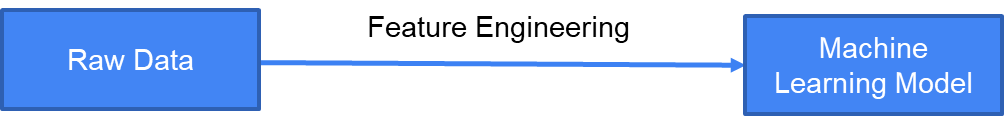

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 1000)

In [3]:
new_credit=pd.read_csv("credit.csv")
prev_credit=pd.read_csv("previous.csv")

### Inspecting new credit data set 

In [4]:
new_credit.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0.0202          0.0190                 

In [5]:
new_credit.shape


(307511, 122)

In [6]:
new_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [7]:
new_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
new_credit.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

### Inspecting Previous Data Set

In [9]:
prev_credit.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE    CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP             NaN         Repeater              Mobile            POS               XNA    Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP   Unaccompanied         Repeater                 XNA           Cash            x-sell  Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0

In [10]:
prev_credit.tail(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
1670212     2785582      400317         Cash loans     18821.52         180000.0    191880.0               NaN         180000.0                  WEDNESDAY                        9                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved          -1185  Cash through the bank                XAP          Family         Repeater                 XNA           Cash            x-sell  AP+ (Cash loan)                -1                  XNA         12.0       low_normal     Cash X-Sell: low            365243.0         -1155.0                     -825.0         -825.0            -817.0                        1.0
1670213     2418762      261212         Cash loans     16431.30         360000.0    360000.0               NaN         360000.0                     SUNDAY                       10                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved          -1193  Cash through the bank                XAP          Family         Repeater                 XNA           Cash            x-sell  AP+ (Cash loan)                -1                  XNA         48.0           middle  Cash X-Sell: middle            365243.0         -1163.0                      247.0         -443.0            -423.0                        0.0

In [190]:
prev_credit.shape

(1670214, 8)

In [11]:
prev_credit.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [12]:
prev_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
prev_credit.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115833    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

### Inspect Missing Values in New Dataset

In [14]:
new_credit.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [15]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [16]:
new_credit=new_credit.loc[:, new_credit.isnull().mean()<=0.45]

In [17]:
new_credit.shape

(307511, 73)

In [18]:
new_credit.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

In [19]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [20]:
new_credit["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [21]:
new_credit["OCCUPATION_TYPE"].value_counts()


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
new_credit["OCCUPATION_TYPE"].isnull().sum()

96391

In [23]:
new_credit["OCCUPATION_TYPE"].replace(np.NaN, "Unknown", inplace=True)

In [24]:
new_credit["OCCUPATION_TYPE"].isnull().sum()

0

In [25]:
new_credit["OCCUPATION_TYPE"].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_8                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [27]:
# Droping the columns not required for Analysis:

NOT_REQ = ['FLAG_DOCUMENT_21' , 'FLAG_DOCUMENT_20' , 'FLAG_DOCUMENT_19' , 'FLAG_DOCUMENT_18' , 'FLAG_DOCUMENT_17' ,
           'FLAG_DOCUMENT_16' , 'FLAG_DOCUMENT_15' , 'FLAG_DOCUMENT_14' , 'FLAG_DOCUMENT_13' , 'FLAG_DOCUMENT_12' ,
           'FLAG_DOCUMENT_11' , 'FLAG_DOCUMENT_10' , 'FLAG_DOCUMENT_9' , 'FLAG_DOCUMENT_8' , 'FLAG_DOCUMENT_7' ,  
           'FLAG_DOCUMENT_6' , 'FLAG_DOCUMENT_5' , 'FLAG_DOCUMENT_4' , 'FLAG_DOCUMENT_3' , 'FLAG_DOCUMENT_2' ,
           'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE' ,
           'AMT_REQ_CREDIT_BUREAU_YEAR' , 'AMT_REQ_CREDIT_BUREAU_MON' , 'AMT_REQ_CREDIT_BUREAU_WEEK' , 
           'AMT_REQ_CREDIT_BUREAU_DAY' , 'AMT_REQ_CREDIT_BUREAU_HOUR' , 'AMT_REQ_CREDIT_BUREAU_QRT' ]

In [28]:
new_credit.drop( labels = NOT_REQ , axis = 1 , inplace = True)

In [29]:
new_credit.shape

(307511, 43)

In [30]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
NAME_TYPE_SUITE                 0.42
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
HOUR_APPR_PROCESS_START         0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
FLAG_WORK_PHONE                 0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
FLAG_CONT_MOBILE                0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
F

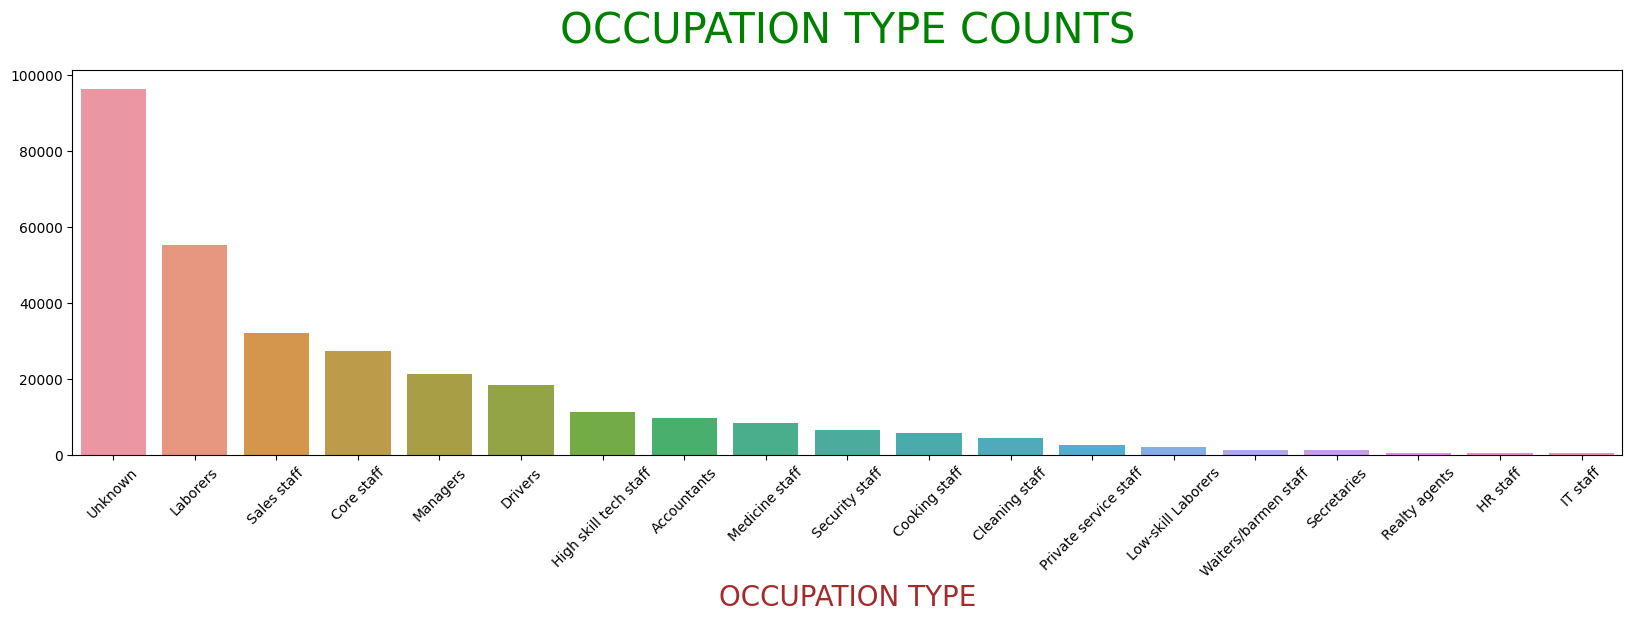

In [31]:
#VALUE COUNTS IN GRAPH 

plt.figure(figsize=[20,5])

sns.barplot(x=new_credit.OCCUPATION_TYPE.value_counts().index, 
            y=new_credit.OCCUPATION_TYPE.value_counts().values).set_title("OCCUPATION TYPE COUNTS", 
                                                                          fontsize=30, color='Green', pad = 20)

plt.xlabel('OCCUPATION TYPE', fontsize= 20, color='Brown')
plt.xticks(rotation=45)

plt.show()

INFERENCE -
Labourers and Sales Staff constitute the majority whereas IT Staff and HR staff are on the lower side

#### CHECKING AND IMPUTING EXT_SOURCE_2 AND EXT_SOURCE_3 COLUMNS

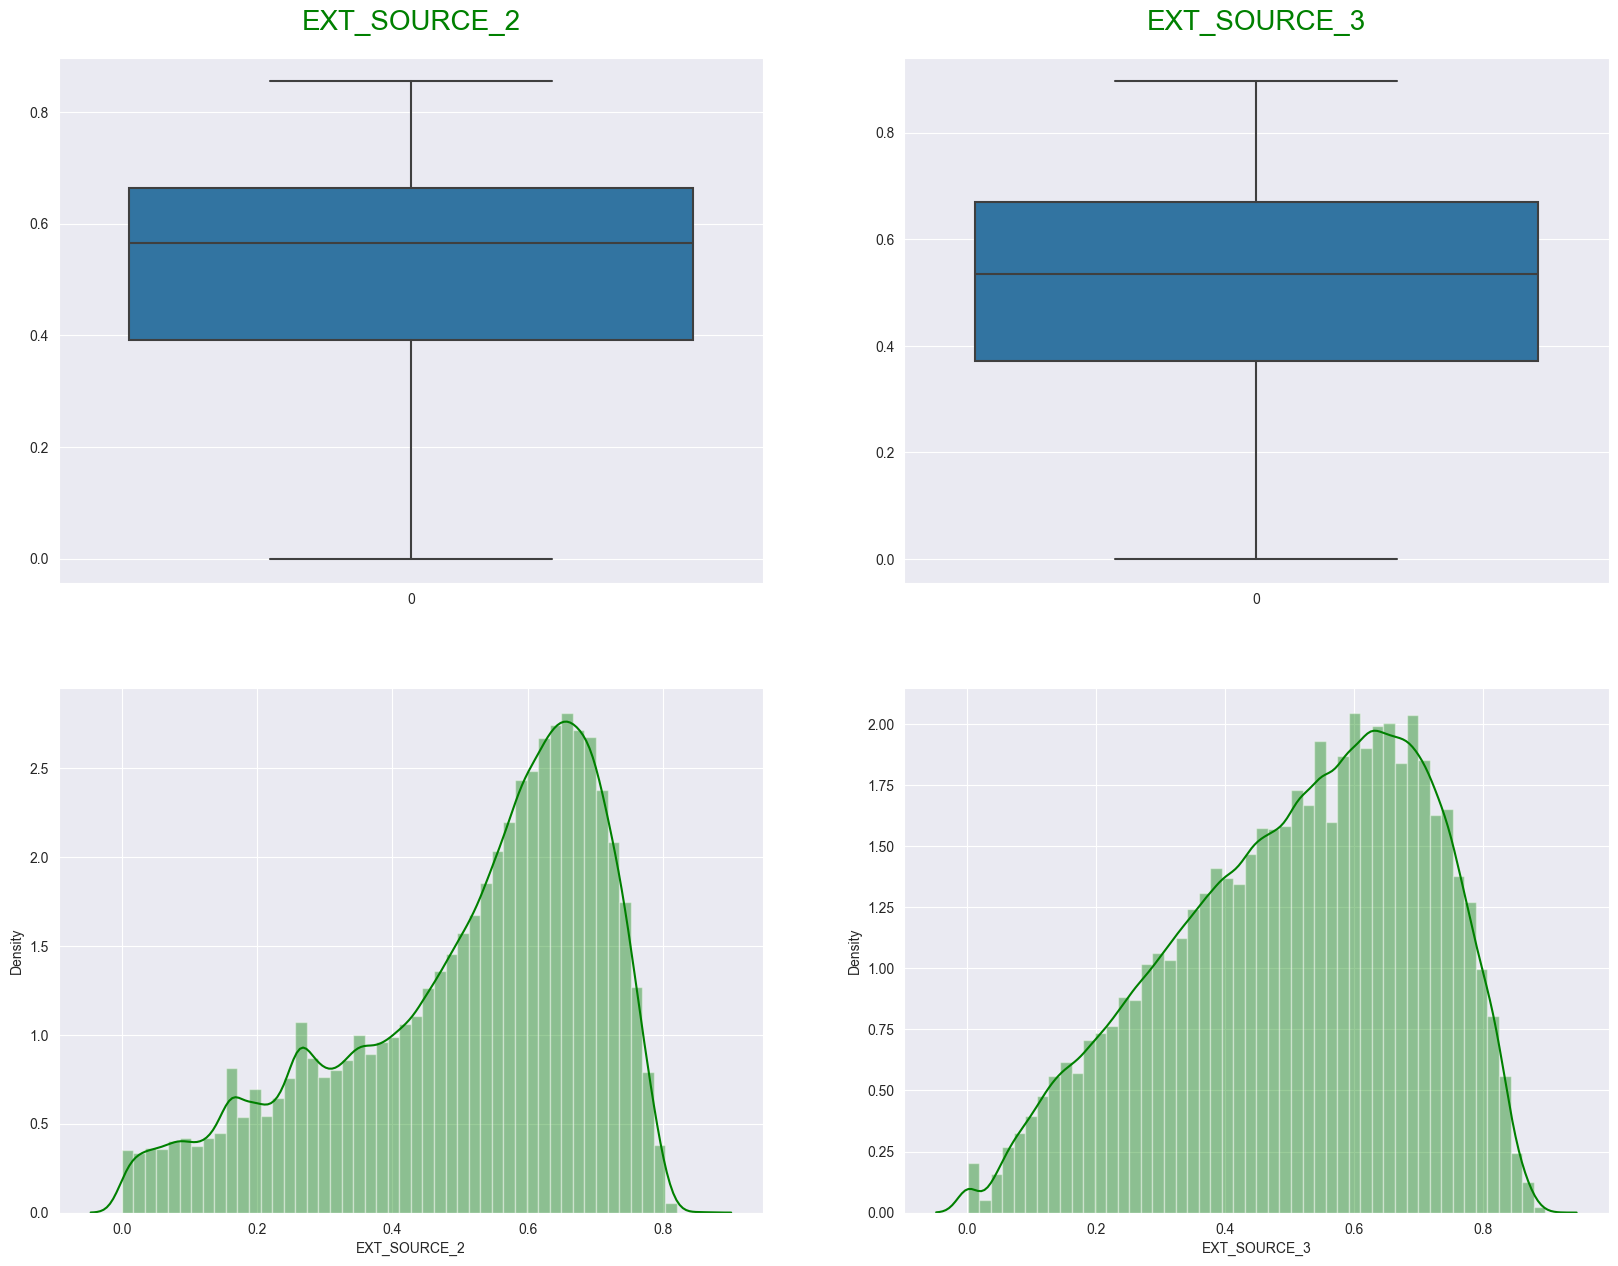

In [32]:
plt.figure(figsize=[20,15])

sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(new_credit['EXT_SOURCE_2']).set_title("EXT_SOURCE_2", fontsize=20, color='Green', pad=20)


plt.subplot(2,2,2)
sns.boxplot(new_credit['EXT_SOURCE_3']).set_title("EXT_SOURCE_3", fontsize=20, color='Green', pad=20)

plt.subplot(2,2,3)
sns.distplot(new_credit['EXT_SOURCE_2'], color='g')

plt.subplot(2,2,4)
sns.distplot(new_credit['EXT_SOURCE_3'], color='g')

plt.show()

From the above graphs, we can conclude that:
There are no outliers
There is a small amount of skewness

#### Median can be used to replace the missing values here because of skewness

In [33]:
# REPLACING MISSING VALUES OF THESE 2 COLUMNS WITH ITS CORRESPONDING MEDIAN

for column in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
    new_credit[column].fillna(new_credit[column].median(), inplace=True)

#### Checking and Imputing AMT_GOODS_PRICE column

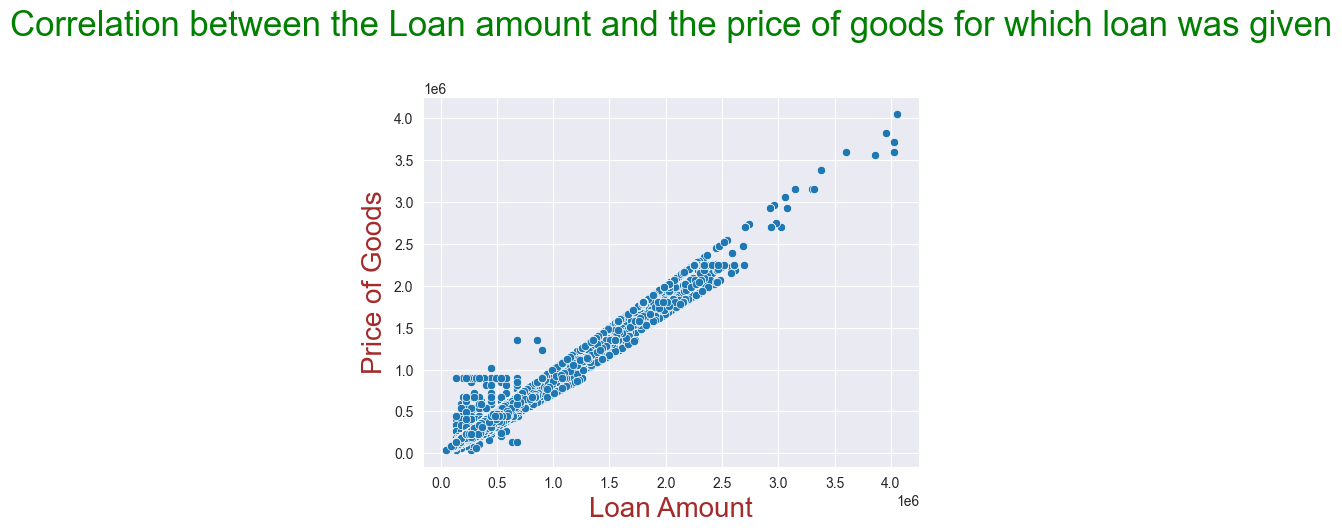

In [34]:
# Checking the correlation between the loan amount demamded vs the good's price. 

sns.scatterplot(x=new_credit['AMT_CREDIT'], y=new_credit['AMT_GOODS_PRICE'], data=new_credit)           

plt.title("Correlation between the Loan amount and the price of goods for which loan was given\n", 
          fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Price of Goods", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

INFERENCE

Since there is a very linear and positive correlation between the Loan Amount and the Good's price, we can assume that, in most cases the loan amount demanded by the customer is slightly more than but mostly equal to the price of the article he/she wishes to purchase.
For the AMT_GOODS_PRICE we can impute the same value of AMT_CREDIT for missing values (keeping in mind loan amount is usually same as good's price)

In [35]:
# Imputing the above mentioned logic

new_credit['AMT_GOODS_PRICE'] = np.where(new_credit['AMT_GOODS_PRICE'].isnull() == True, 
                                         new_credit['AMT_CREDIT'], new_credit['AMT_GOODS_PRICE'])

In [36]:
new_credit['AMT_GOODS_PRICE'].isnull().sum()

0

#### CHECKING AND IMPUTING NAME_TYPE_SUITE COLUMN

In [37]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [38]:
# Percentage of each category


go.Figure(data=[go.Pie(labels=new_credit.NAME_TYPE_SUITE.value_counts().index,
                       values=new_credit.NAME_TYPE_SUITE.value_counts().values, hole=.6, title = 'NAME_TYPE_SUITE VALUE COUNTS',
                       pull=[0,0.1,0.1,0.1,0.1,0.1,0.1])] )

In [39]:
new_credit["NAME_TYPE_SUITE"].isnull().sum()/new_credit.shape[0]*100

0.42014757195677555

In [40]:
new_credit["NAME_TYPE_SUITE"].isnull().sum()

1292

In [41]:
new_credit['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [42]:
#Replacing missing values with MODE

new_credit['NAME_TYPE_SUITE'].fillna(new_credit['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [43]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,4).sort_values(ascending=False)

AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
HOUR_APPR_PROCESS_START        0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE                     0.0000
FLAG_EMAIL                     0.0000
OCCUPATION_TYPE                0.0000
REGION_RATING_CLIENT           0.0000
REGION_RATING_CLIENT_W_CITY    0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
FLAG_EMP_PHONE                 0.0000
REG_REGION_NOT_WORK_REGION     0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
REG_CITY_NOT_WORK_CITY         0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
ORGANIZATION_TYPE              0.0000
EXT_SOURCE_2                   0.0000
EXT_SOURCE_3                   0.0000
FLAG_WORK_PHONE                0.0000
SK_ID_CURR                     0.0000
TARGET                         0.0000
DAYS_ID_PUBLISH                0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER 

In [44]:
# REMAINING COLUMNS with negligible null values (LESS THAN 1%).

NULL_COL = ['CNT_FAM_MEMBERS' , 'AMT_ANNUITY' , 'DAYS_LAST_PHONE_CHANGE']

for column in NULL_COL:
    new_credit[column].fillna(new_credit[column].median(), inplace=True)

In [45]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,4).sort_values(ascending=False)

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
REG_REGION_NOT_LIVE_REGION     0.0
FLAG_EMP_PHONE                 0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_WORK_PHONE                0.0
FLAG_MOBIL                     0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN        

In [46]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### CHANGING DAYS COLUMNS AND COUNT COLUMNS TO INTEGER

In [47]:
dayandcount = ['CNT_FAM_MEMBERS' , 'DAYS_REGISTRATION' , 'DAYS_LAST_PHONE_CHANGE' ]

new_credit.loc[:,dayandcount]=new_credit.loc[:,dayandcount].apply(lambda x: x.astype('int64',errors='ignore'))

In [48]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### CHANGING ALL VALUES OF COLUMNS WITH DTYPE OBJECT TO STRING

In [49]:
#LISTING OBJECT TYPE COLUMNS AND CONFIRMING THE VALUES TO BE IN STRING TYPE

obj_col = list(new_credit.select_dtypes(include='object').columns)

new_credit.loc[:,obj_col] = new_credit.loc[:,obj_col].apply(lambda x: x.astype('str'))

In [50]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

CHECKING VALUES OF OTHER CATEGORICAL COLUMNS

CHECKING GENDER CODE COLUMN

In [51]:
# VALUE COUNTS OF GENDER CODE

new_credit.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

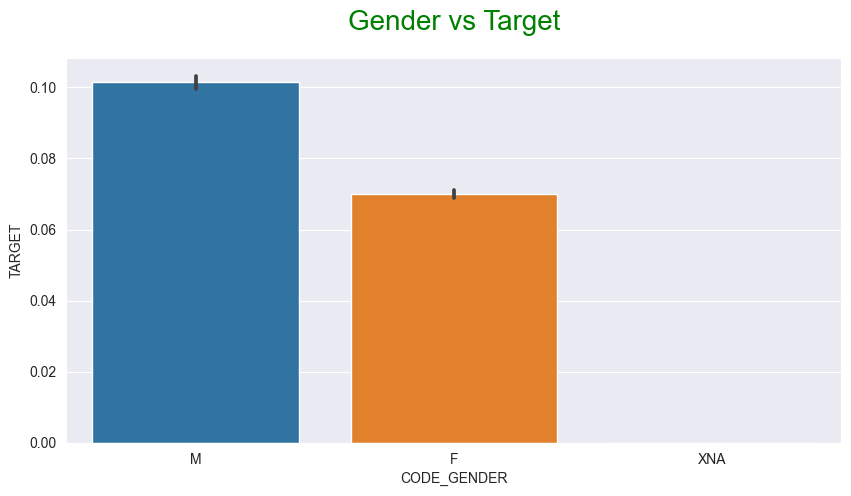

In [52]:
# Checking the gender column

plt.figure(figsize=[10,5])

sns.barplot(x=new_credit.CODE_GENDER, y=new_credit.TARGET).set_title("Gender vs Target", fontsize=20, color='Green', pad=20)

plt.show()

#### Checking ORGANIZATION TYPE column

In [53]:
round(new_credit.ORGANIZATION_TYPE.value_counts()/new_credit.shape[0]*100,2)

Business Entity Type 3    22.11
XNA                       18.01
Self-employed             12.49
Other                      5.43
Medicine                   3.64
Business Entity Type 2     3.43
Government                 3.38
School                     2.89
Trade: type 7              2.55
Kindergarten               2.24
Construction               2.19
Business Entity Type 1     1.95
Transport: type 4          1.76
Trade: type 3              1.14
Industry: type 9           1.10
Industry: type 3           1.07
Security                   1.06
Housing                    0.96
Industry: type 11          0.88
Military                   0.86
Bank                       0.82
Agriculture                0.80
Police                     0.76
Transport: type 2          0.72
Postal                     0.70
Security Ministries        0.64
Trade: type 2              0.62
Restaurant                 0.59
Services                   0.51
University                 0.43
Industry: type 7           0.43
Transpor

 We notice that there are several sub-categories within Industry, Trade, Business and Transport

In [54]:
# Therefore, we elimiate the sub-category with the overall category

new_credit.ORGANIZATION_TYPE = new_credit.ORGANIZATION_TYPE.apply(lambda x: 'Industry' if 'Industry' in x else x)
new_credit.ORGANIZATION_TYPE = new_credit.ORGANIZATION_TYPE.apply(lambda x: 'Trade' if 'Trade' in x else x)
new_credit.ORGANIZATION_TYPE = new_credit.ORGANIZATION_TYPE.apply(lambda x: 'Transport' if 'Transport' in x else x)
new_credit.ORGANIZATION_TYPE = new_credit.ORGANIZATION_TYPE.apply(lambda x: 'Business' if 'Business' in x else x)

In [55]:
round(new_credit.ORGANIZATION_TYPE.value_counts()/new_credit.shape[0]*100,2)

Business               27.49
XNA                    18.01
Self-employed          12.49
Other                   5.43
Trade                   4.66
Industry                4.65
Medicine                3.64
Government              3.38
Transport               2.92
School                  2.89
Kindergarten            2.24
Construction            2.19
Security                1.06
Housing                 0.96
Military                0.86
Bank                    0.82
Agriculture             0.80
Police                  0.76
Postal                  0.70
Security Ministries     0.64
Restaurant              0.59
Services                0.51
University              0.43
Hotel                   0.31
Electricity             0.31
Insurance               0.19
Telecom                 0.19
Emergency               0.18
Advertising             0.14
Realtor                 0.13
Culture                 0.12
Mobile                  0.10
Legal Services          0.10
Cleaning                0.08
Religion      

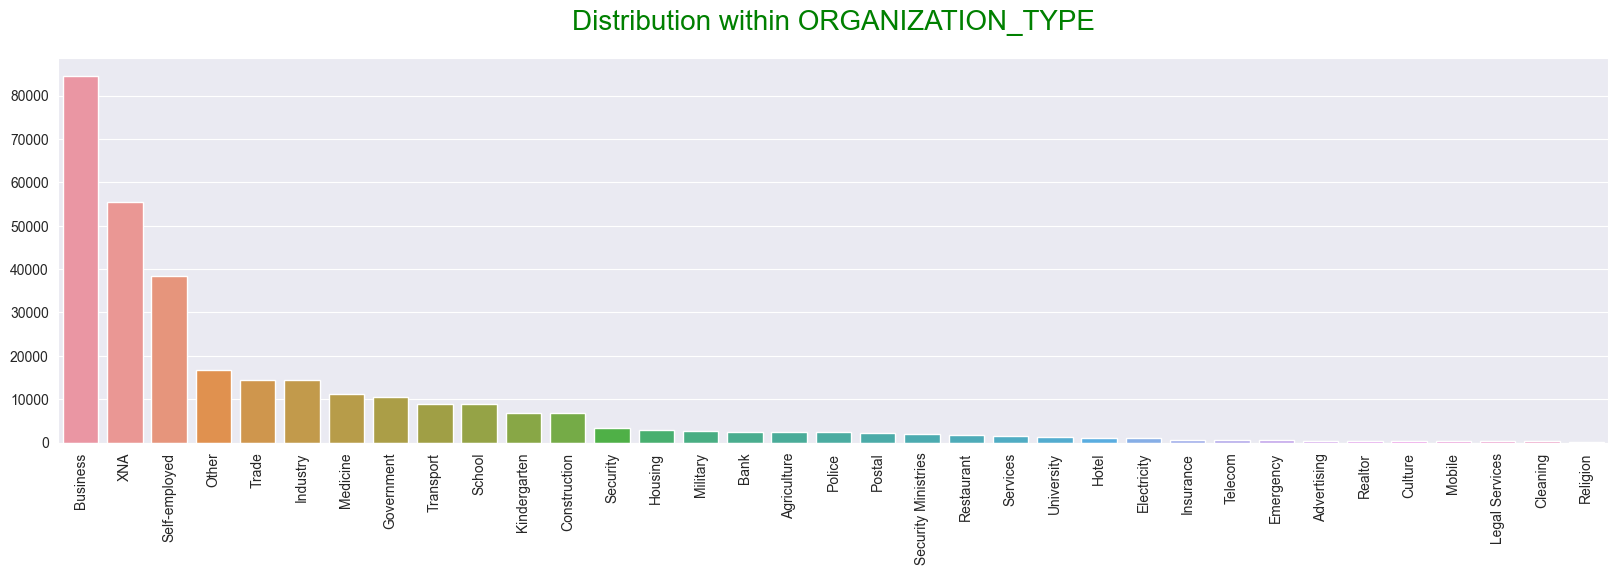

In [56]:
plt.figure(figsize=[20,5])

sns.barplot(x=new_credit.ORGANIZATION_TYPE.value_counts().index, 
            y=new_credit.ORGANIZATION_TYPE.value_counts().values).set_title("Distribution within ORGANIZATION_TYPE", 
                                                                            fontsize=20, color='Green', pad=20)

# plt.xlabel('ORGANIZATION_TYPE', fontsize = 20, color = 'Brown')
plt.xticks(rotation = 90)

plt.show()

INFERENCE:
    
People who is in business field applied more in number for the loan compared to other fields.

#### Checking NAME_CONTRACT_TYPE column

In [57]:
new_credit.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

#### CHECKING FLAG OWN CAR COLUMN

In [58]:
new_credit.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

#### CHECKING FLAG OWN REALTY COLUMN

In [59]:
new_credit.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

#### CHECKING NAME TYPE SUITE COLUMN

In [60]:
new_credit.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### CHECKING NAME EDUCATION TYPE COLUMN 

In [61]:
new_credit.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

#### CHECKING NAME INCOME TYPE COLUMN

In [62]:
new_credit.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

#### CHECKING NAME FAMILY STATUS COLUMN

In [63]:
new_credit.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

#### CHECKING NAME HOUSING TYPE COLUMN

In [64]:
new_credit.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

#### CHECKING WEEKDAY_APPR_PROCESS_START COLUMN

In [65]:
new_credit.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

#### CHECKING VALUES OF OTHER NUMERICAL COLUMNS (Days)

In [66]:
new_credit.DAYS_BIRTH.unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [67]:
new_credit.DAYS_EMPLOYED.unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [68]:
#CHECKING 'DAYS_REGISTRATION' COLUMN

new_credit.DAYS_REGISTRATION.unique()

array([ -3648,  -1186,  -4260, ..., -16396, -14558, -14798], dtype=int64)

In [69]:
#CHECKING 'DAYS_ID_PUBLISH' COLUMN

new_credit.DAYS_ID_PUBLISH.unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [70]:
#CHECKING 'DAYS_LAST_PHONE_CHANGE' COLUMN

new_credit.DAYS_LAST_PHONE_CHANGE.unique()

array([-1134,  -828,  -815, ..., -3988, -3899, -3538], dtype=int64)

In [71]:
# In the DAYS_EMPLOYED column, we can see that there is a value '365243' which corresponds to retired people or people who are not working.

(new_credit["DAYS_EMPLOYED"]//365).value_counts().tail()

-49    4
-47    4
 0     2
-48    1
-50    1
Name: DAYS_EMPLOYED, dtype: int64

In [72]:
#changing values to positive integer

num_days = ['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' , 'DAYS_LAST_PHONE_CHANGE']

for i in num_days:
    new_credit[i] = abs(new_credit[i])

In [73]:
new_credit.DAYS_LAST_PHONE_CHANGE.unique()

array([1134,  828,  815, ..., 3988, 3899, 3538], dtype=int64)

In [74]:
new_credit.AMT_INCOME_TOTAL.quantile([0,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.99,0.999,1])

0.000        25650.0
0.100        81000.0
0.150        90000.0
0.200        99000.0
0.250       112500.0
0.300       112500.0
0.400       135000.0
0.500       147150.0
0.600       162000.0
0.700       180000.0
0.750       202500.0
0.800       225000.0
0.900       270000.0
0.950       337500.0
0.990       472500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

#### Binning (continuous) numerical column values for analysis
BINNING OF AMT_INCOME_TOTAL COLUMN - Derived Metrics

In [75]:
new_credit['INCOME_SLAB']=pd.qcut(new_credit['AMT_INCOME_TOTAL'] , q=[0,0.2,0.5,0.75,0.95,1],
                                  labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [76]:
new_credit['INCOME_SLAB'].value_counts()

Low         90089
Medium      82213
VeryLow     63671
High        57503
VeryHigh    14035
Name: INCOME_SLAB, dtype: int64

In [77]:
# BINNING OF AMT_CREDIT COLUMN
new_credit['AMT_CREDIT_slab'] = pd.qcut(new_credit['AMT_CREDIT'] , q = [0,0.2,0.5,0.75,0.95,1],
                                   labels = ['VeryLow','Low','Medium','High','VeryHigh'])

In [78]:
new_credit['AMT_CREDIT_slab'].value_counts()

Low         88924
Medium      77786
VeryLow     64925
High        61842
VeryHigh    14034
Name: AMT_CREDIT_slab, dtype: int64

In [79]:
#BINNING OF DAYS_BIRTH / AGE COLUMN
#CONVERTING DAYS TO YEARS

new_credit['AGE']=(new_credit['DAYS_BIRTH']//365).astype('int64',errors='ignore')

In [80]:
#MAX & MIN VALUES

print(new_credit['AGE'].max())
print(new_credit['AGE'].min())

69
20


In [81]:
#CREATING 10 BINS 

new_credit['AGE_BINS'] = pd.cut(new_credit['AGE'],bins=np.arange(20,71,5))

In [82]:
new_credit['AGE_BINS'].value_counts()

(35, 40]    43680
(40, 45]    39997
(30, 35]    39437
(25, 30]    36488
(50, 55]    35097
(45, 50]    34404
(55, 60]    32722
(60, 65]    24359
(20, 25]    16317
(65, 70]     5009
Name: AGE_BINS, dtype: int64

#### OUTLIER ANALYSIS

In [83]:
# CHECKING AMT_INCOME_TOTAL COLUMN
new_credit.AMT_INCOME_TOTAL.quantile([0.9991,0.9992,0.9993])

0.9991    9.025105e+05
0.9992    1.034820e+06
0.9993    1.125000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [84]:
# Handling outliers for the AMT_INCOME_TOTAL by capping the income to 10lakh: - Caping with Threshold value

new_credit['AMT_INCOME_TOTAL'] = np.where(new_credit['AMT_INCOME_TOTAL'] > 1000000 , 1000000 , new_credit['AMT_INCOME_TOTAL'])

In [85]:
new_credit['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2499, dtype: int64

In [86]:
new_credit['AMT_INCOME_TOTAL'].max()

1000000.0

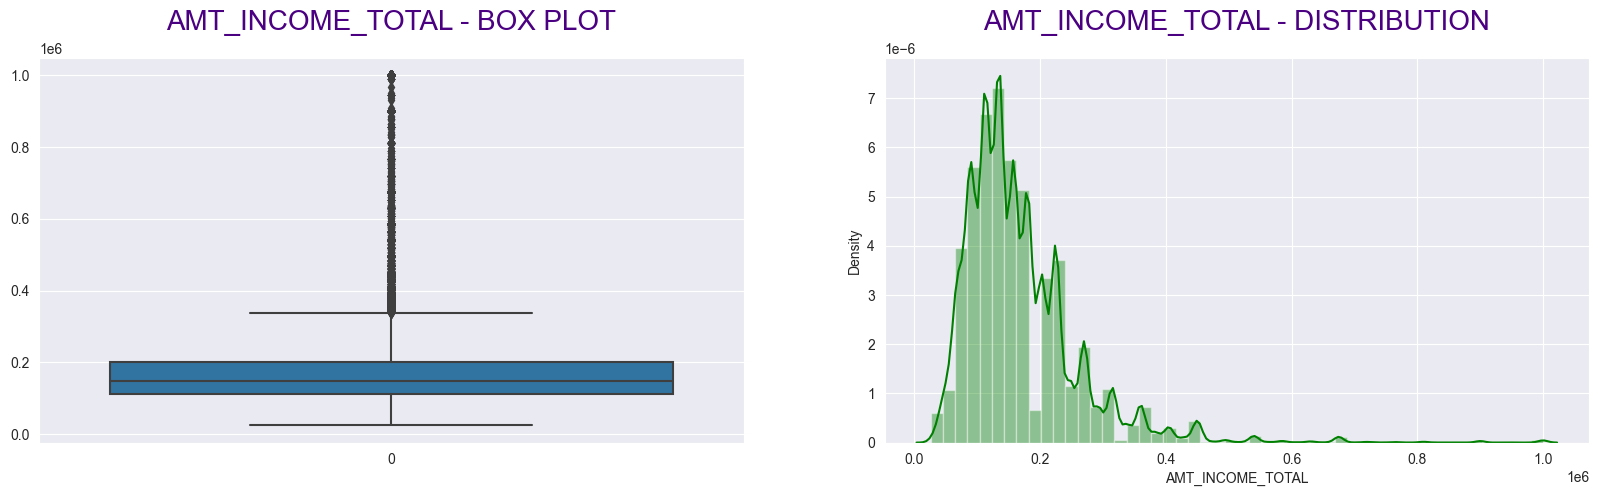

In [87]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['AMT_INCOME_TOTAL']).set_title("AMT_INCOME_TOTAL - BOX PLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['AMT_INCOME_TOTAL'], color='green').set_title("AMT_INCOME_TOTAL - DISTRIBUTION",
                                                                      fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

It can be inferred that, most of the people earn around 1-2 lakh annually.
There are ofcourse people who earn a lot more, but they are present in mere numbers upto 10lakhs.
Largly the the bigger part of the population, applying for loan is concentrated near the 20 thousand to 4 lakh bucket.

In [88]:
new_credit.shape

(307511, 47)

In [89]:
Q3 = np.quantile(new_credit['AMT_INCOME_TOTAL'], 0.75)
Q1 = np.quantile(new_credit['AMT_INCOME_TOTAL'], 0.25)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# outliers=round(new_credit.loc[(new_credit['AMT_INCOME_TOTAL'] > upper_range)].count()/new_credit.shape[0]*100)
#outliers
new_credit.loc[(new_credit['AMT_INCOME_TOTAL'] > upper_range)].shape

(14035, 47)

In [90]:
def removeOutliers(data, col):
    lower_range=0
    upper_range=0
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return upper_range, lower_range


In [91]:
#impute outliers with median
new_credit['AMT_INCOME_TOTAL'] = np.where(new_credit['AMT_INCOME_TOTAL'] > upper_range , new_credit['AMT_INCOME_TOTAL'].median() , new_credit['AMT_INCOME_TOTAL'])

In [92]:
new_credit.shape

(307511, 47)

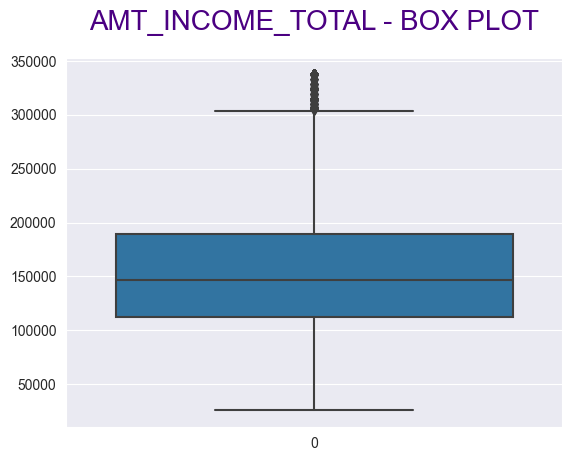

In [93]:
sns.boxplot(new_credit['AMT_INCOME_TOTAL']).set_title("AMT_INCOME_TOTAL - BOX PLOT", fontsize=20, color='indigo', pad=20)
plt.show()

In [94]:
#remove Ouliers
# upper_range,lower_range=removeOutliers(new_credit,'AMT_INCOME_TOTAL')
# new_credit=new_credit.loc[(new_credit['AMT_INCOME_TOTAL'] <= upper_range) & (new_credit['AMT_INCOME_TOTAL'] >= lower_range)]

In [95]:
new_credit.shape

(307511, 47)

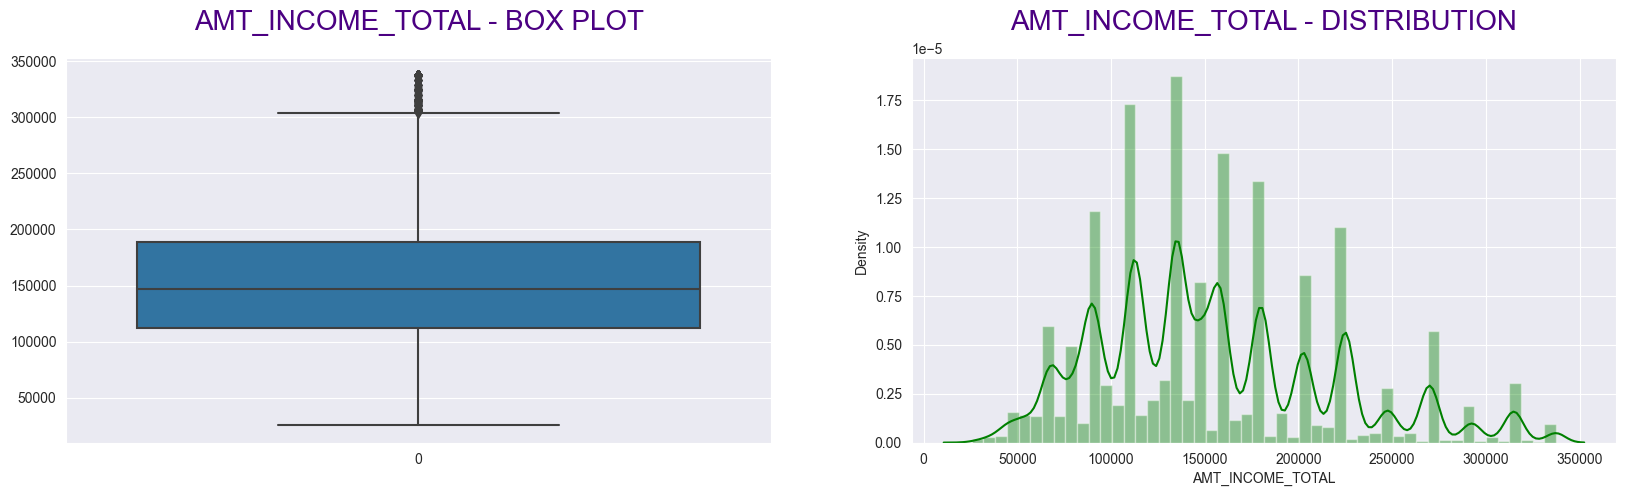

In [96]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['AMT_INCOME_TOTAL']).set_title("AMT_INCOME_TOTAL - BOX PLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['AMT_INCOME_TOTAL'], color='green').set_title("AMT_INCOME_TOTAL - DISTRIBUTION",
                                                                      fontsize=20, color='indigo', pad=20)

plt.show()

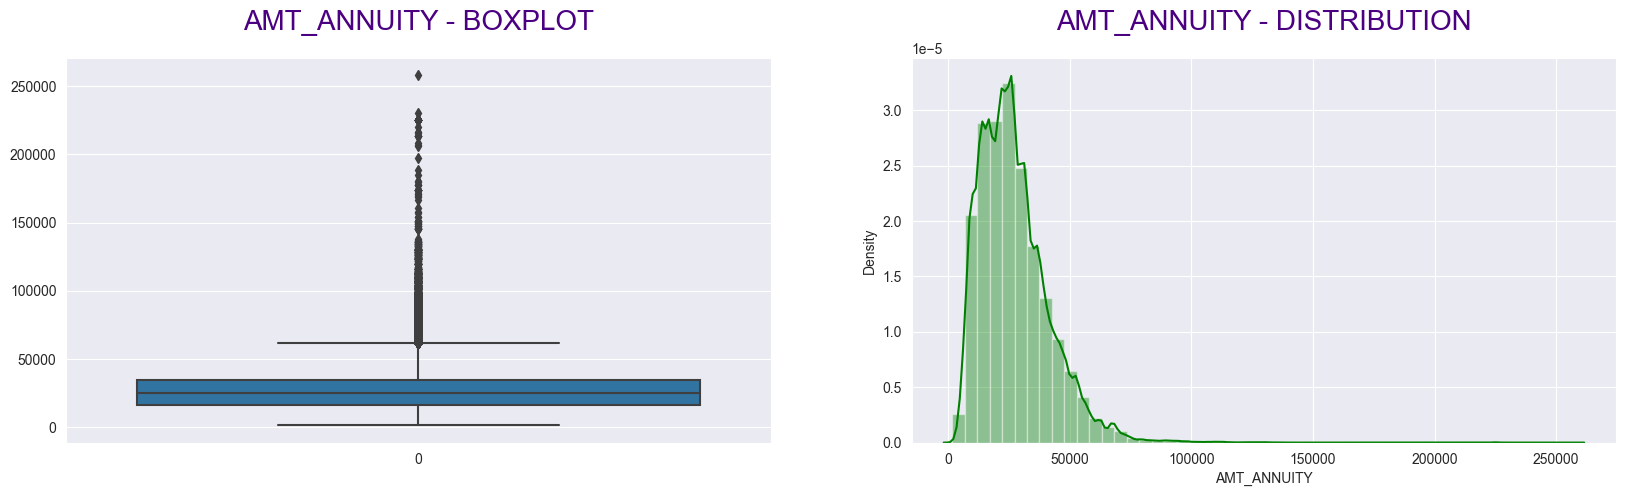

In [97]:
#Checking AMT_ANNUITY column
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['AMT_ANNUITY']).set_title("AMT_ANNUITY - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['AMT_ANNUITY'], color='g').set_title("AMT_ANNUITY - DISTRIBUTION", fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

The loan annuity amount is mostly concentrated around the 25,000 mark.

In [98]:
# upper_range,lower_range=removeOutliers(new_credit,'AMT_ANNUITY')
# new_credit=new_credit.loc[(new_credit['AMT_ANNUITY'] <= upper_range) & (new_credit['AMT_ANNUITY'] >= lower_range)]

In [99]:
new_credit.shape

(307511, 47)

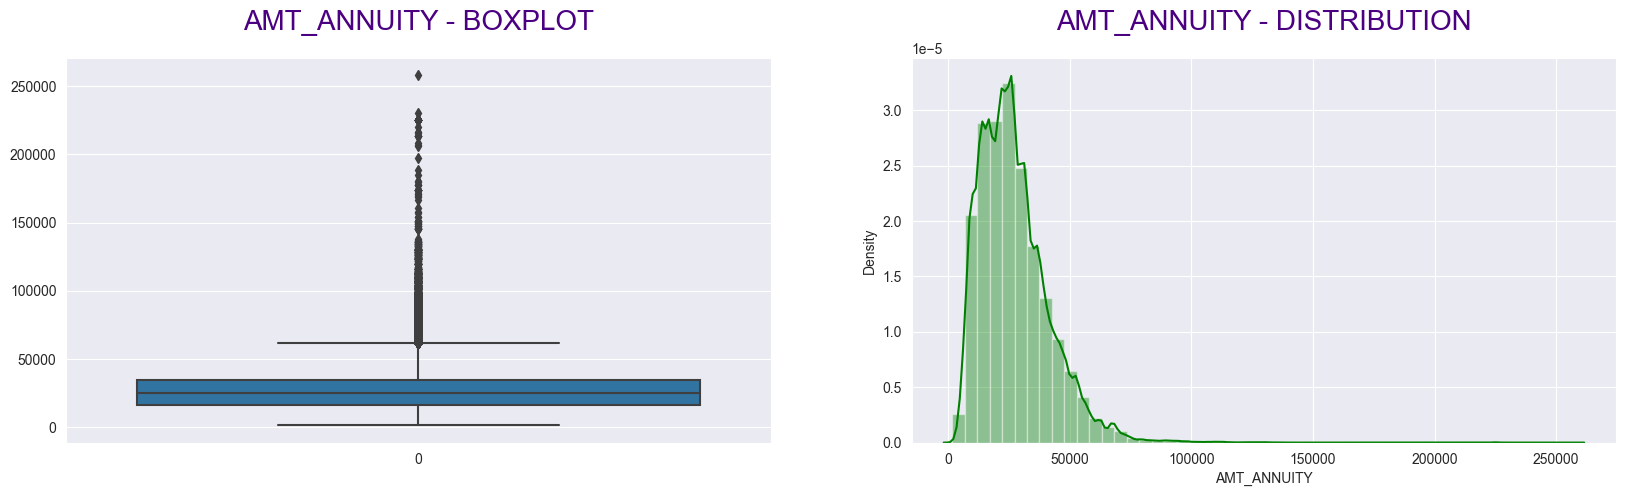

In [100]:
#Checking AMT_ANNUITY column
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['AMT_ANNUITY']).set_title("AMT_ANNUITY - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['AMT_ANNUITY'], color='g').set_title("AMT_ANNUITY - DISTRIBUTION", fontsize=20, color='indigo', pad=20)

plt.show()

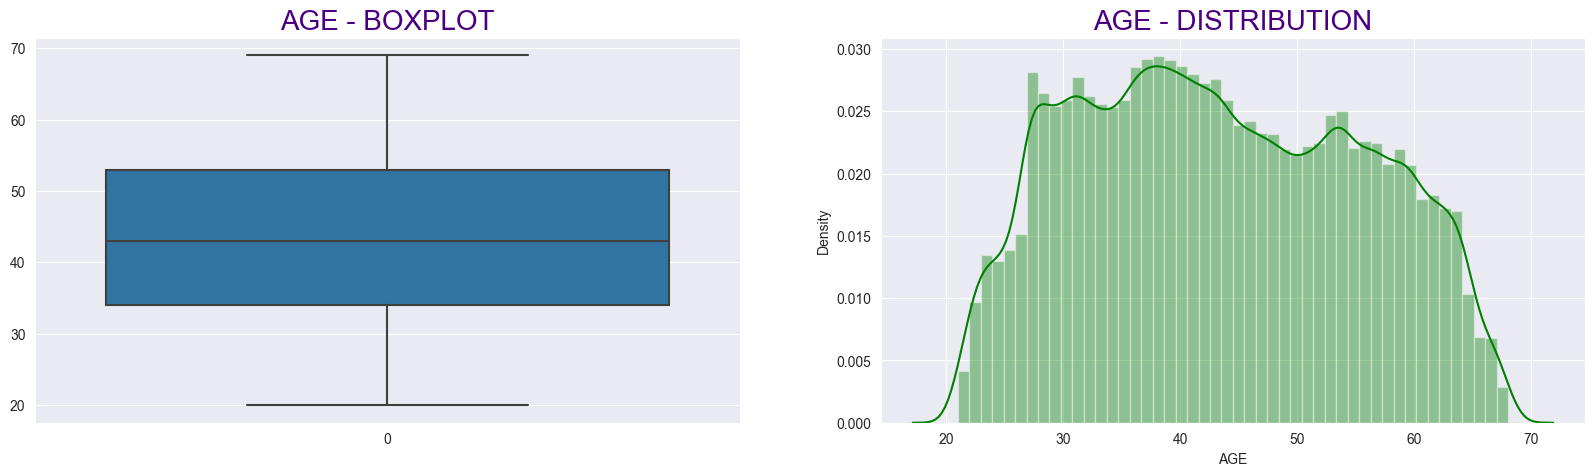

In [101]:
# Checking AGE Column
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['AGE']).set_title("AGE - BOXPLOT", fontsize=20, color='indigo')

plt.subplot(1,2,2)
sns.distplot(new_credit['AGE'], color='g').set_title("AGE - DISTRIBUTION", fontsize=20, color='indigo')

plt.show()

INFERENCE -

Usually people who are coming for loan are 20 years and above, till the age of 69.
Most of the people are in the range of 28 years to 45 years of age.
there are no outliers

#### CHECKING DAYS_EMPLOYED COLUMN

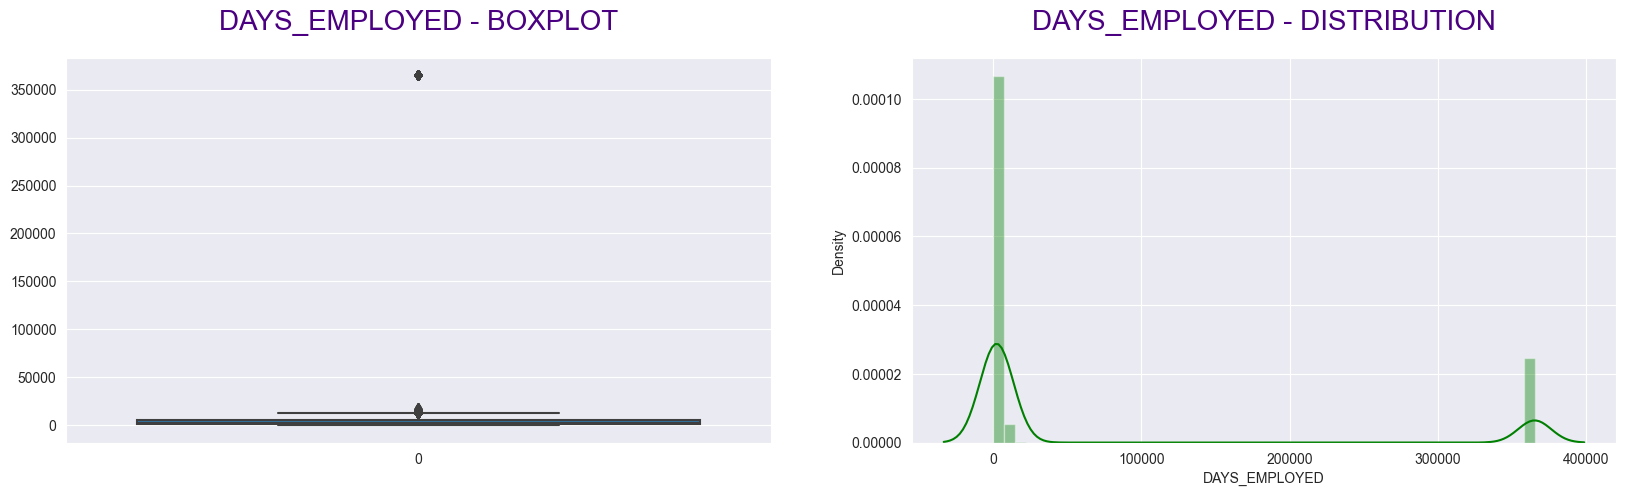

In [102]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['DAYS_EMPLOYED']).set_title("DAYS_EMPLOYED - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['DAYS_EMPLOYED'], color='g').set_title("DAYS_EMPLOYED - DISTRIBUTION", fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Most of the applicants are near value zero
the value above 350000 is surely an outlier or NA value as the value comes around 1000 years

In [103]:
new_credit['DAYS_EMPLOYED'] = np.where(new_credit['DAYS_EMPLOYED'] >= 100000 , new_credit['DAYS_EMPLOYED'].median() , new_credit['DAYS_EMPLOYED'])
# upper_range,lower_range=removeOutliers(new_credit,'DAYS_EMPLOYED')
# new_credit=new_credit.loc[(new_credit['DAYS_EMPLOYED'] <= upper_range) & (new_credit['DAYS_EMPLOYED'] >= lower_range)]


In [104]:
new_credit['DAYS_EMPLOYED'] = np.where(new_credit['DAYS_EMPLOYED']//365 >= 80 , new_credit['DAYS_EMPLOYED'].median() , new_credit['DAYS_EMPLOYED'])

In [105]:
new_credit.shape

(307511, 47)

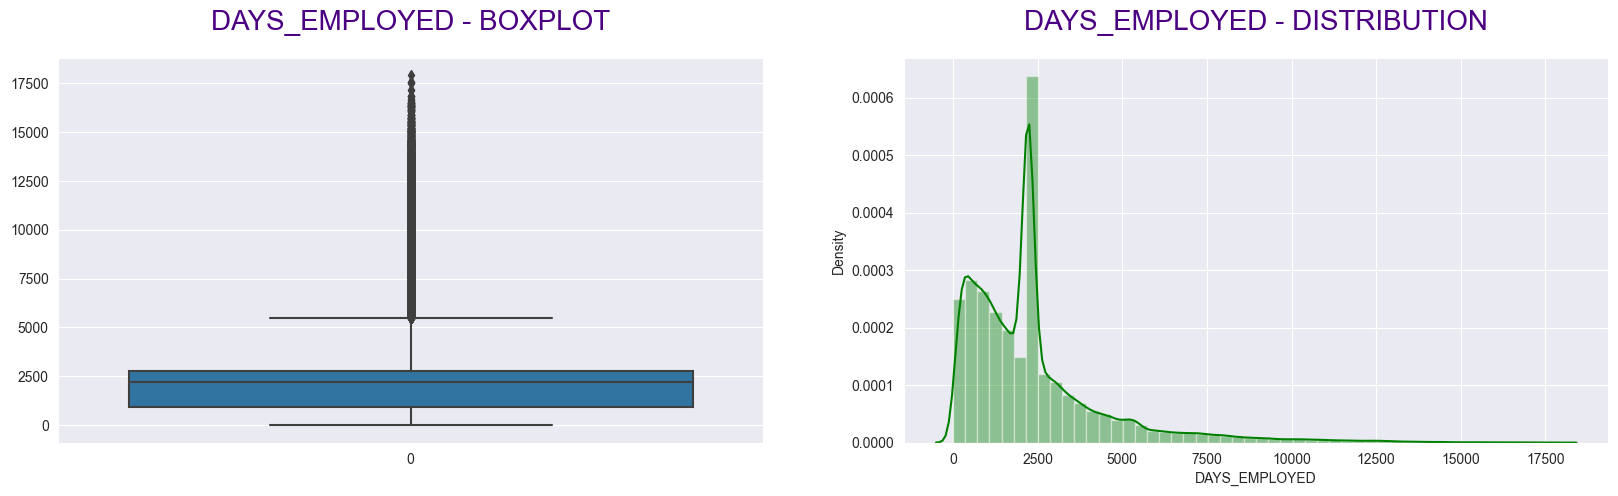

In [106]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['DAYS_EMPLOYED']).set_title("DAYS_EMPLOYED - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['DAYS_EMPLOYED'], color='g').set_title("DAYS_EMPLOYED - DISTRIBUTION", fontsize=20, color='indigo', pad=20)

plt.show()

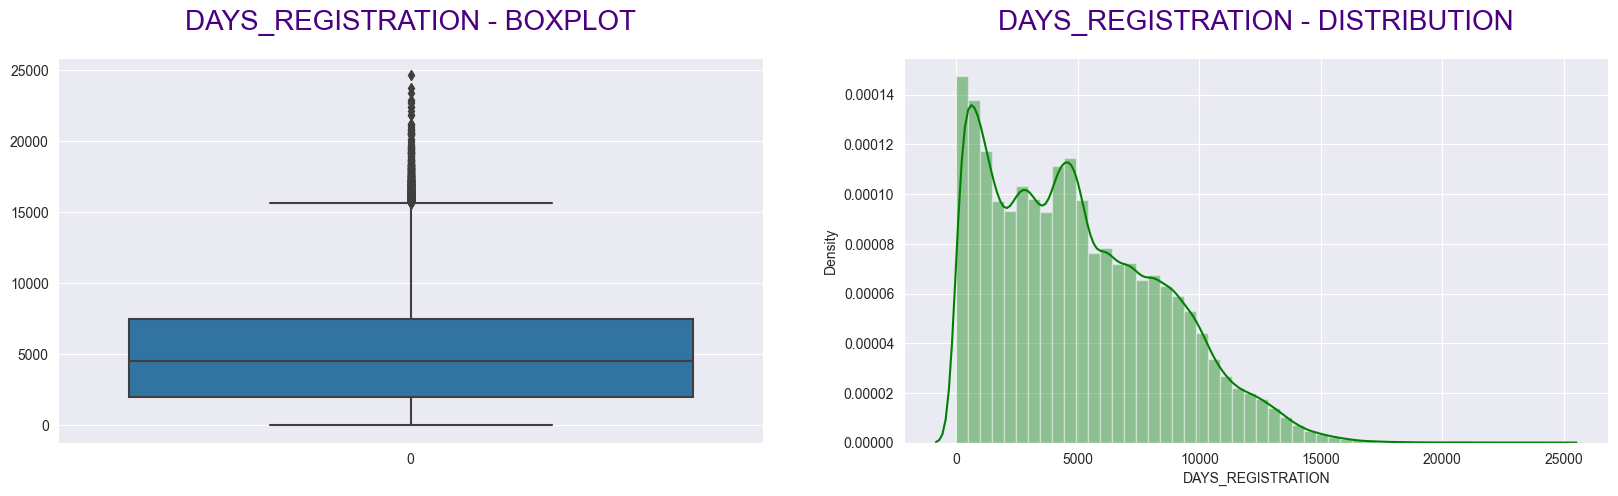

In [107]:
#CHECKING DAYS_REGISTRATION COLUMN
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(new_credit['DAYS_REGISTRATION']).set_title("DAYS_REGISTRATION - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(new_credit['DAYS_REGISTRATION'], color='g').set_title("DAYS_REGISTRATION - DISTRIBUTION", 
                                                                   fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

It can be observed that most of the customers have changed their registration at most 15000 days before application
Most of the people are in the range of 2500 to 7500 days.
But the maximum number of poeple changed their registration just days before the application.

In [108]:
#CREATING ADDITIONAL COLUMNS FOR ANALYSIS
# CREATING A COLUMN WITH VALUES CREDIT TO INCOME RATIO - Derived Metrics
    
new_credit['CREDIT_RATIO'] = (new_credit.AMT_CREDIT // new_credit.AMT_INCOME_TOTAL).astype('int64')

In [109]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [110]:
##Checking target imbalance
go.Figure(data=[go.Pie(labels=new_credit.TARGET.value_counts(normalize=True).index,
                       values=new_credit.TARGET.value_counts(normalize=True).values, hole=.6,
                       title = 'Defaulter VS Non-Defaulters')])


INFERENCE -

There is a huge data imbalance with almost 92% of the data corresponding to the Defaulter whereas only 8% belonging to the Non-defaulters.

In [111]:
#Checking Gender imbalance
go.Figure(data=[go.Pie(labels=new_credit.CODE_GENDER.value_counts(normalize=True).index,
                       values=new_credit.CODE_GENDER.value_counts(normalize=True).values, hole=.5,
                       title = 'Male Vs Female')])

In [112]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

#### Correlation between variables - Multivariate Analysis


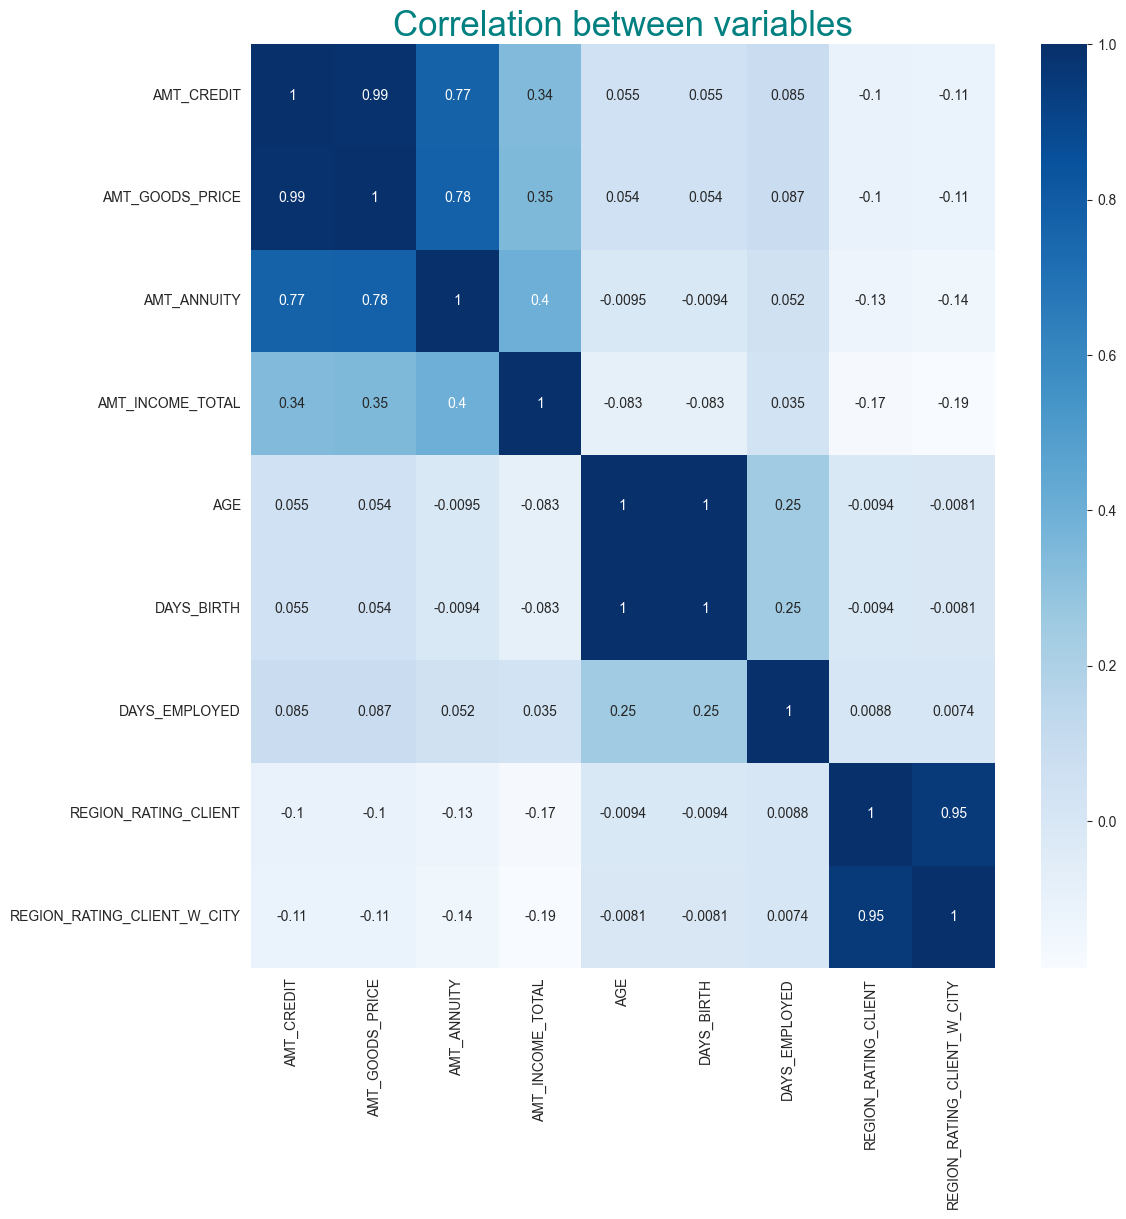

In [185]:

plt.figure(figsize=[12,12])

f=sns.heatmap(new_credit[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL' , 'AGE' , 'DAYS_BIRTH' , 
                          'DAYS_EMPLOYED' , 'REGION_RATING_CLIENT' , 'REGION_RATING_CLIENT_W_CITY']].corr(),
              
              cmap = "Blues" , annot=True).set_title('Correlation between variables', fontsize = 25, color='Teal')

plt.show()

INFERENCE -

Here, we can see a very strong correlation between the amount of goods price and the loan amount. From this, we can conclude like previously that the loan amount disbursed is mostly equal or slightly higher than the cost of article the client wishes to purchase.
There is also a good correlation between the annuity amount and the loan amount as well as the good's price.
Here there is a negative correlation between the client's region and the money he earns. This means that if a client is from a place with a higher rating, he or she will more likely earn less money.

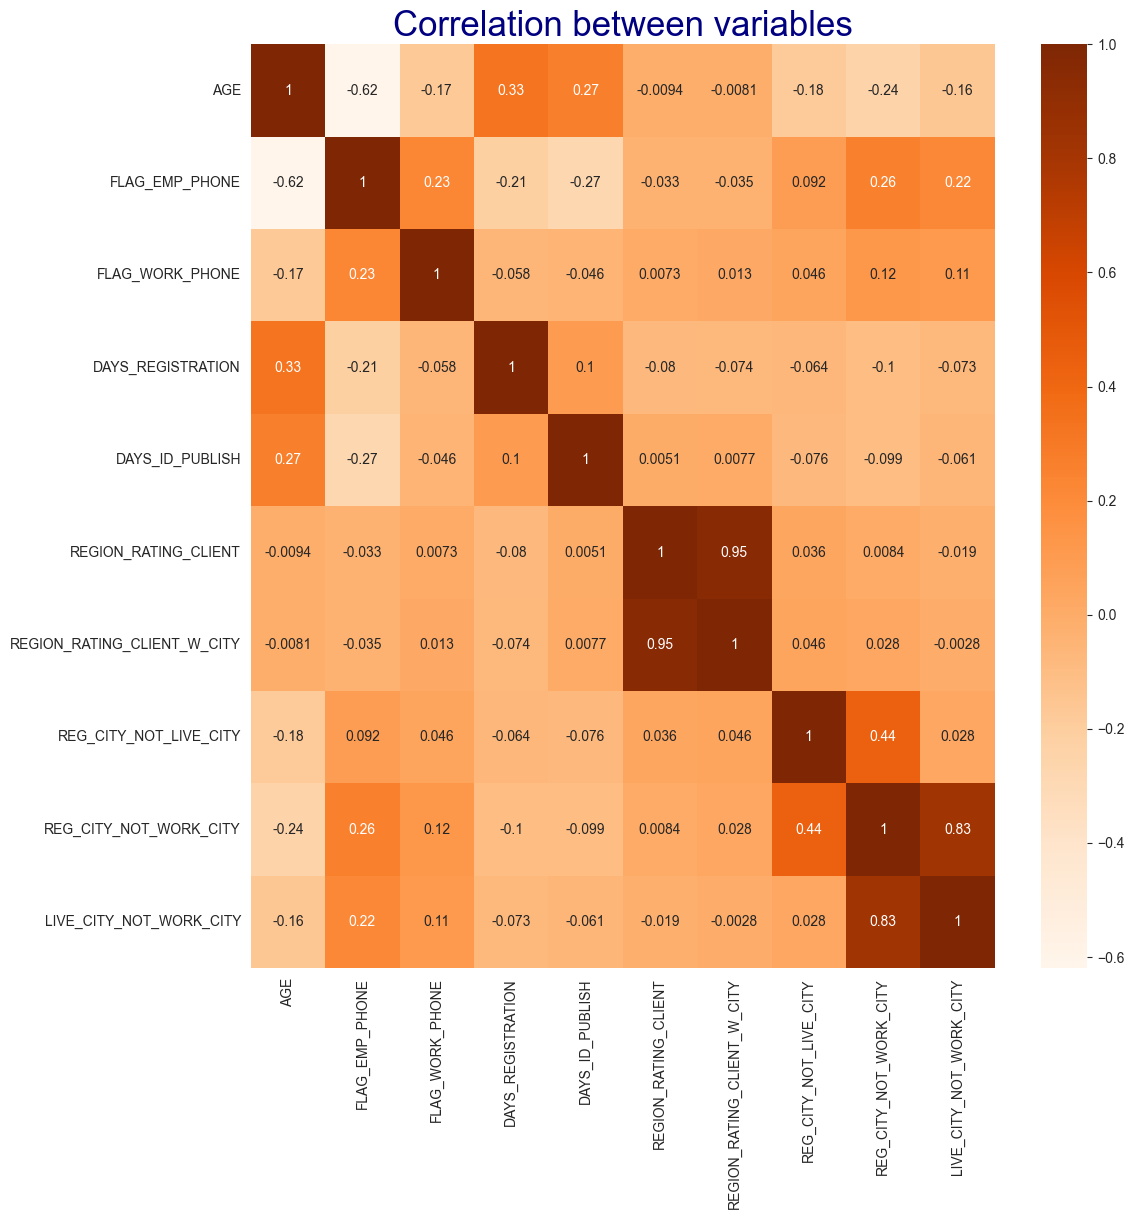

In [186]:
plt.figure(figsize=[12,12])

f=sns.heatmap(new_credit[['AGE' , 'FLAG_EMP_PHONE' , 'FLAG_WORK_PHONE' , 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' ,
                          'REGION_RATING_CLIENT' , 'REGION_RATING_CLIENT_W_CITY' , 'REG_CITY_NOT_LIVE_CITY' ,
                          'REG_CITY_NOT_WORK_CITY' , 'LIVE_CITY_NOT_WORK_CITY' ]].corr(),
              cmap = "Oranges" , annot=True).set_title('Correlation between variables', fontsize = 25, color='NAvy')

plt.show()

INFERENCE -

Here we see a strong negative correlation between employee phone number and age.
There is a positive correlation between the number of days before which client changed his registration with respect to age. This goes to show that elderly people are less likely to make changes to their registration prior to applying for loan.
Clients that do not provide their phone numbers are also less likely to provide incorrect permanent and work address.

In [115]:
new_credit["REG_CITY_NOT_LIVE_CITY"].value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [116]:
new_credit["AGE_BINS"].value_counts()

(35, 40]    43680
(40, 45]    39997
(30, 35]    39437
(25, 30]    36488
(50, 55]    35097
(45, 50]    34404
(55, 60]    32722
(60, 65]    24359
(20, 25]    16317
(65, 70]     5009
Name: AGE_BINS, dtype: int64

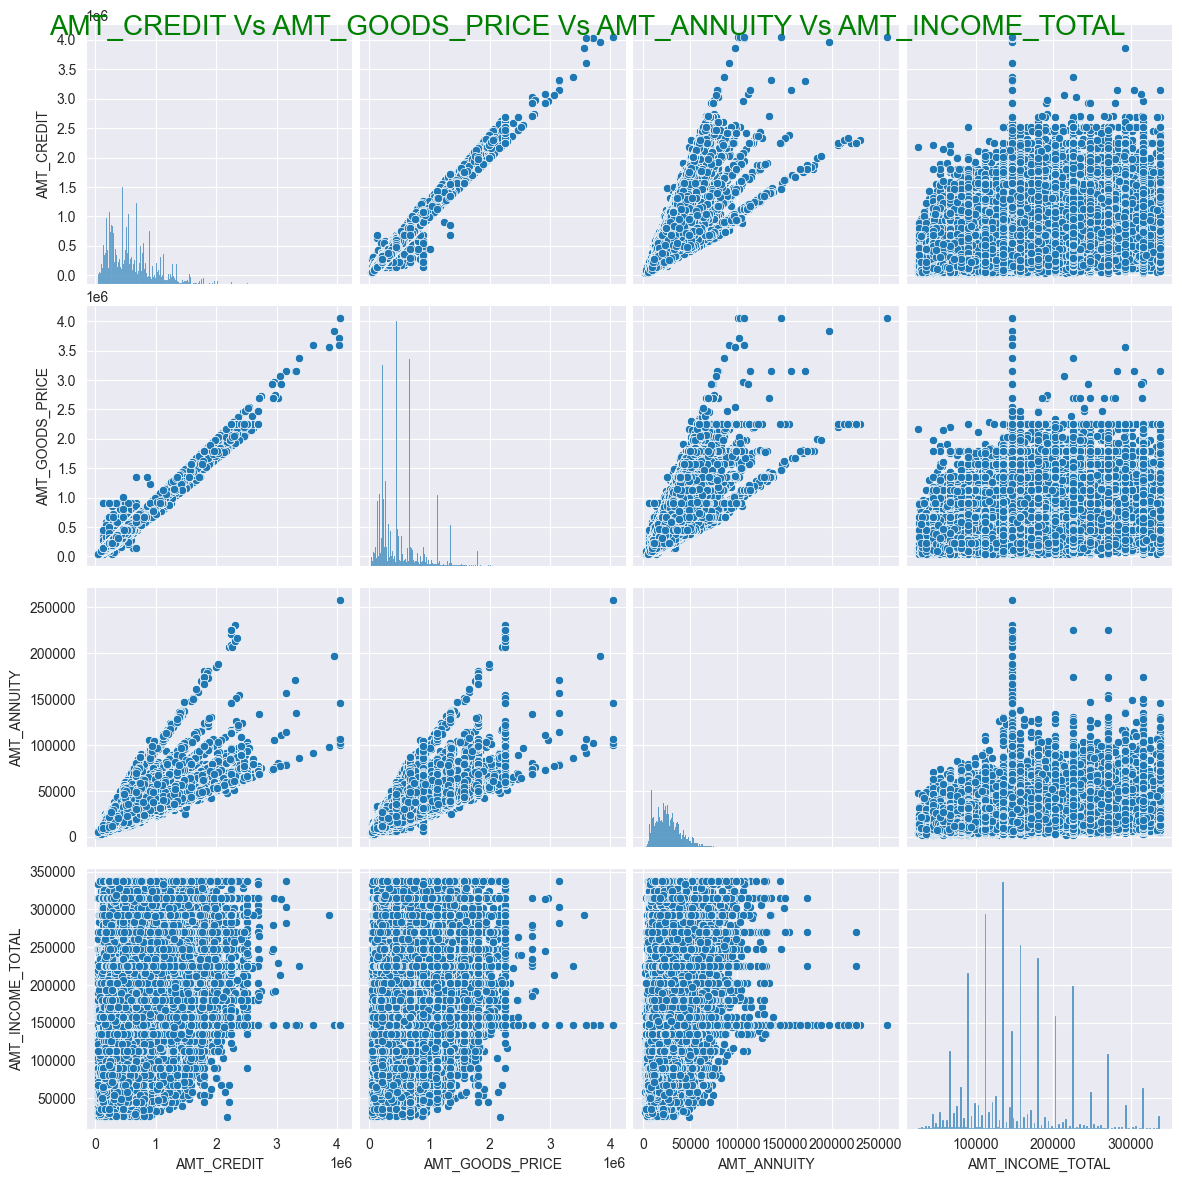

In [188]:
# AMT_CREDIT Vs AMT_GOODS_PRICE Vs AMT_ANNUITY Vs AGE

f = sns.pairplot(new_credit[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL']] , height = 3)
f.fig.suptitle('AMT_CREDIT Vs AMT_GOODS_PRICE Vs AMT_ANNUITY Vs AMT_INCOME_TOTAL \n\n\n\n\n\n', fontsize = 20, color='Green')

plt.show()

INFERENCE -

From the above pairplots we can find that there are good positive correlations between the Credit Amount, Good's price and Amount annuity.

### Splitting the datasets into two, based on whether the person is defaulter or not(based on Target variable).

In [118]:
# Creating two datasets for target=1 and target=0 (1=bad,0=good)

target1 = new_credit[new_credit['TARGET'] == 1]
target0 = new_credit[new_credit['TARGET'] == 0]

print(target1.shape, target0.shape, new_credit.shape)

(24825, 48) (282686, 48) (307511, 48)


Here we notice that the data is imbalanced.

In [119]:
print("The dataset with Target value 1 has :" + "{:.2%}".format(target1.shape[0]/new_credit.shape[0]) + " data.")
print("The dataset with Target value 0 has :" + "{:.2%}".format(target0.shape[0]/new_credit.shape[0]) + " data.") 

The dataset with Target value 1 has :8.07% data.
The dataset with Target value 0 has :91.93% data.


### Segmented Univariate analysis (Categorical columns)

#### Performing some Univariate analysis on some categorical data and comparing the characteristics of Defaulters vs non-Defaulters

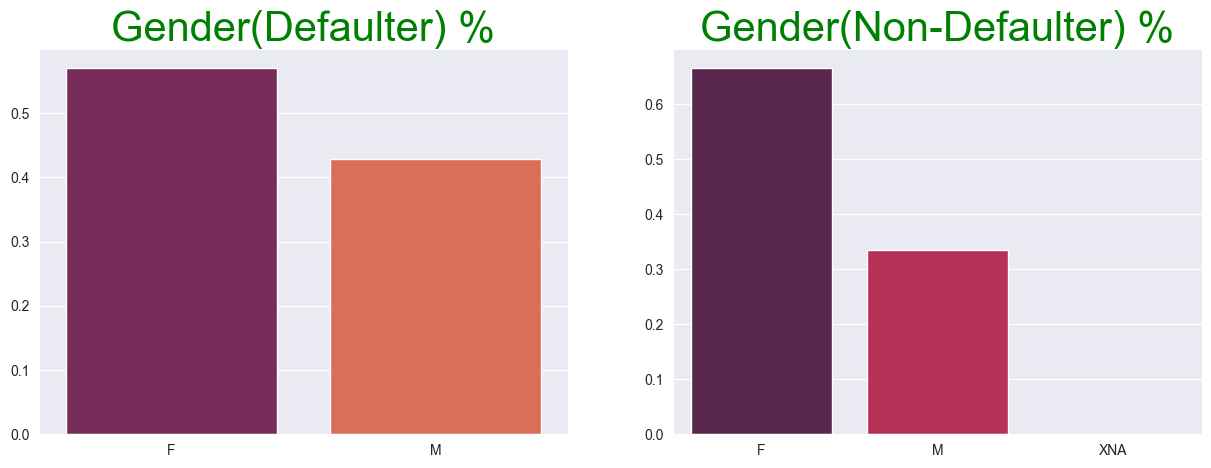

In [120]:
# Checking the gender column:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.barplot(x = target1.CODE_GENDER.value_counts(normalize=True).index, 
            y = target1.CODE_GENDER.value_counts(normalize=True).values ,
            palette="rocket").set_title("Gender(Defaulter) %" , fontsize=30, color='Green')

plt.subplot(1,2,2)
sns.barplot(x = target0.CODE_GENDER.value_counts(normalize=True).index, 
            y = target0.CODE_GENDER.value_counts(normalize=True).values,
            palette="rocket").set_title("Gender(Non-Defaulter) %" , fontsize=30, color='Green')

plt.show()

INFERENCE -

Here we see that the male % has increased almost by 10% from non-defaulter to defaulter.
In-case of female, we can see that there is also a similar 10% decrease from defaulter to non-defaulter.
We can imply that, men are more likely to default a loan than women.

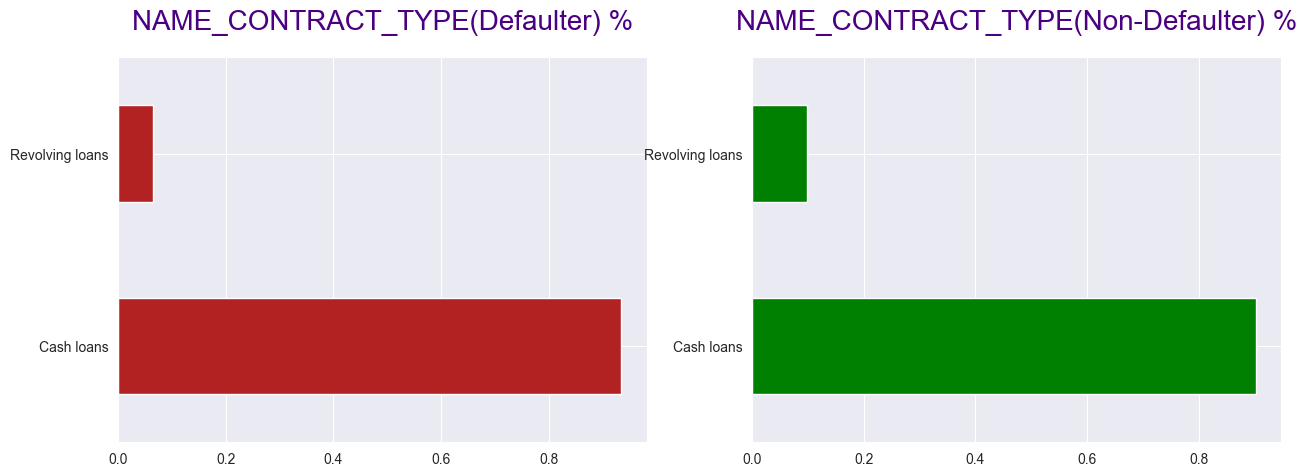

In [121]:
# Checking NAME_CONTRACT_TYPE:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
target1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_CONTRACT_TYPE(Defaulter) %",
                                                                                               fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_CONTRACT_TYPE(Non-Defaulter) %",
                                                                                           fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Here we do not see much of a difference between the two graphs, so it is safe to assume that the type of loan does is not enough to understand whether a person will default or not

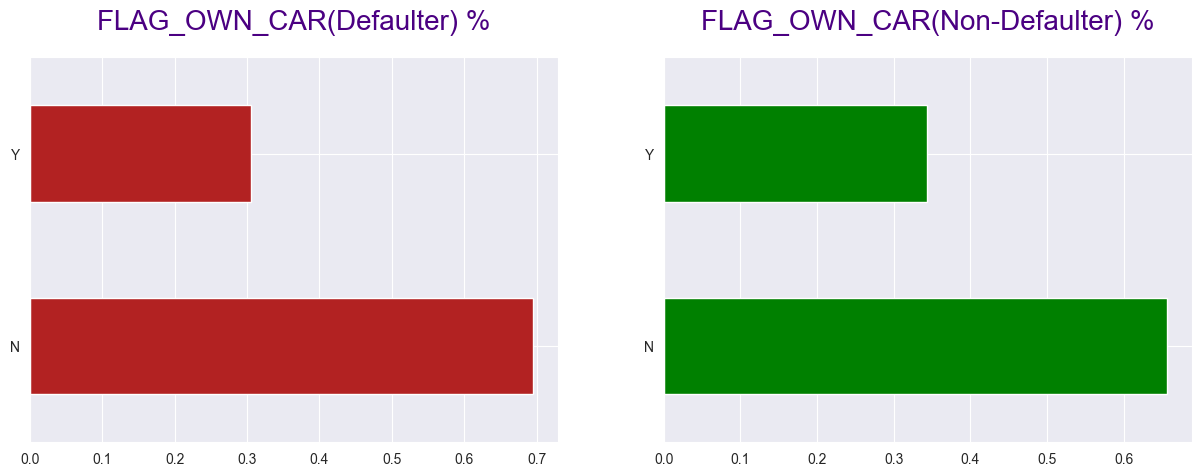

In [122]:
# Owning car vs Defaulting:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
target1.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh(color='firebrick').set_title("FLAG_OWN_CAR(Defaulter) %", 
                                                                                         fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh(color='green').set_title("FLAG_OWN_CAR(Non-Defaulter) %", 
                                                                                     fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Here we can see that who own car are less likely to default a loan.
From this we can also understand that if a person is rich enough to afford a car, he/she will have the money to pay back.

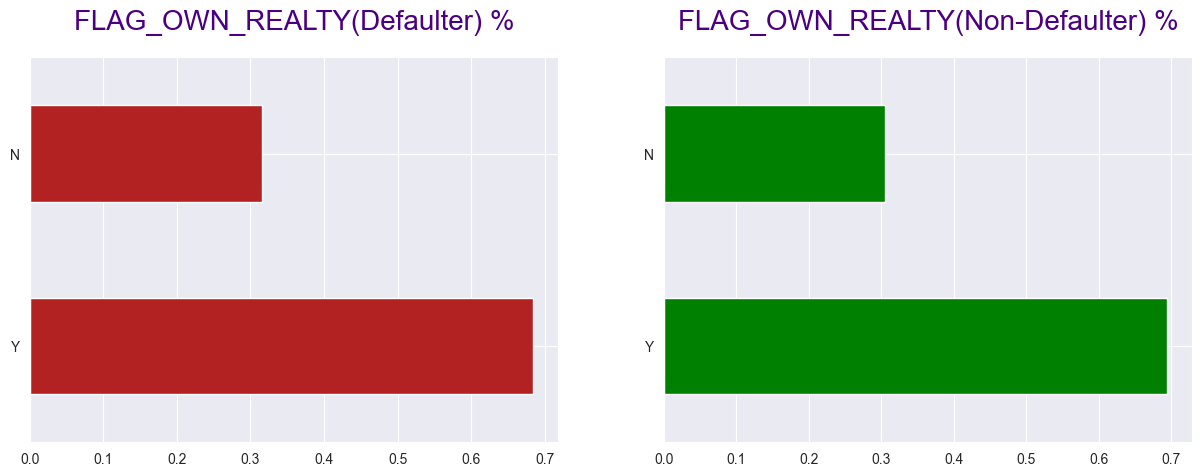

In [123]:
# Owning a House/Estate etc vs Defaulting

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
target1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh(color='firebrick').set_title("FLAG_OWN_REALTY(Defaulter) %", 
                                                                                            fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh(color='green').set_title("FLAG_OWN_REALTY(Non-Defaulter) %", 
                                                                                        fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Owning a realty estate doesn't show much of an impact on whether a person is going to be a defaulter or not.
There is a very minor observation that, people who don't have house, might end up defaulting

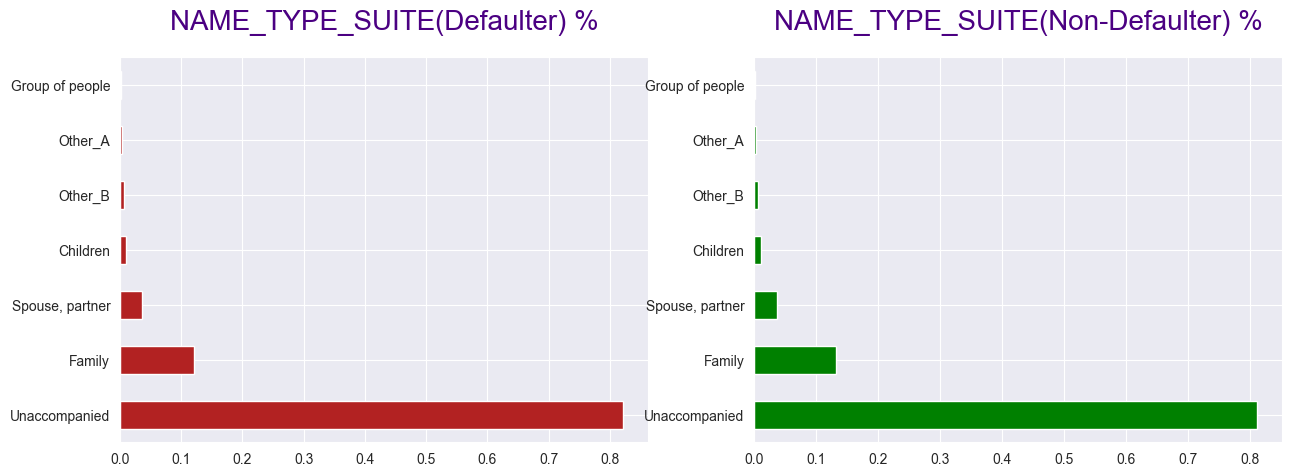

In [124]:
# NAME_TYPE_SUITE vs Defaulting

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
target1.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_TYPE_SUITE(Defaulter) %", 
                                                                                            fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_TYPE_SUITE(Non-Defaulter) %", 
                                                                                        fontsize=20, color='indigo', pad=20)

plt.show()


INFERENCE -

Over here, from this graph, we do not see much difference.
It can be understood that, person accompanying the client doesn't have an impact on deciding if he/she will default the loan.

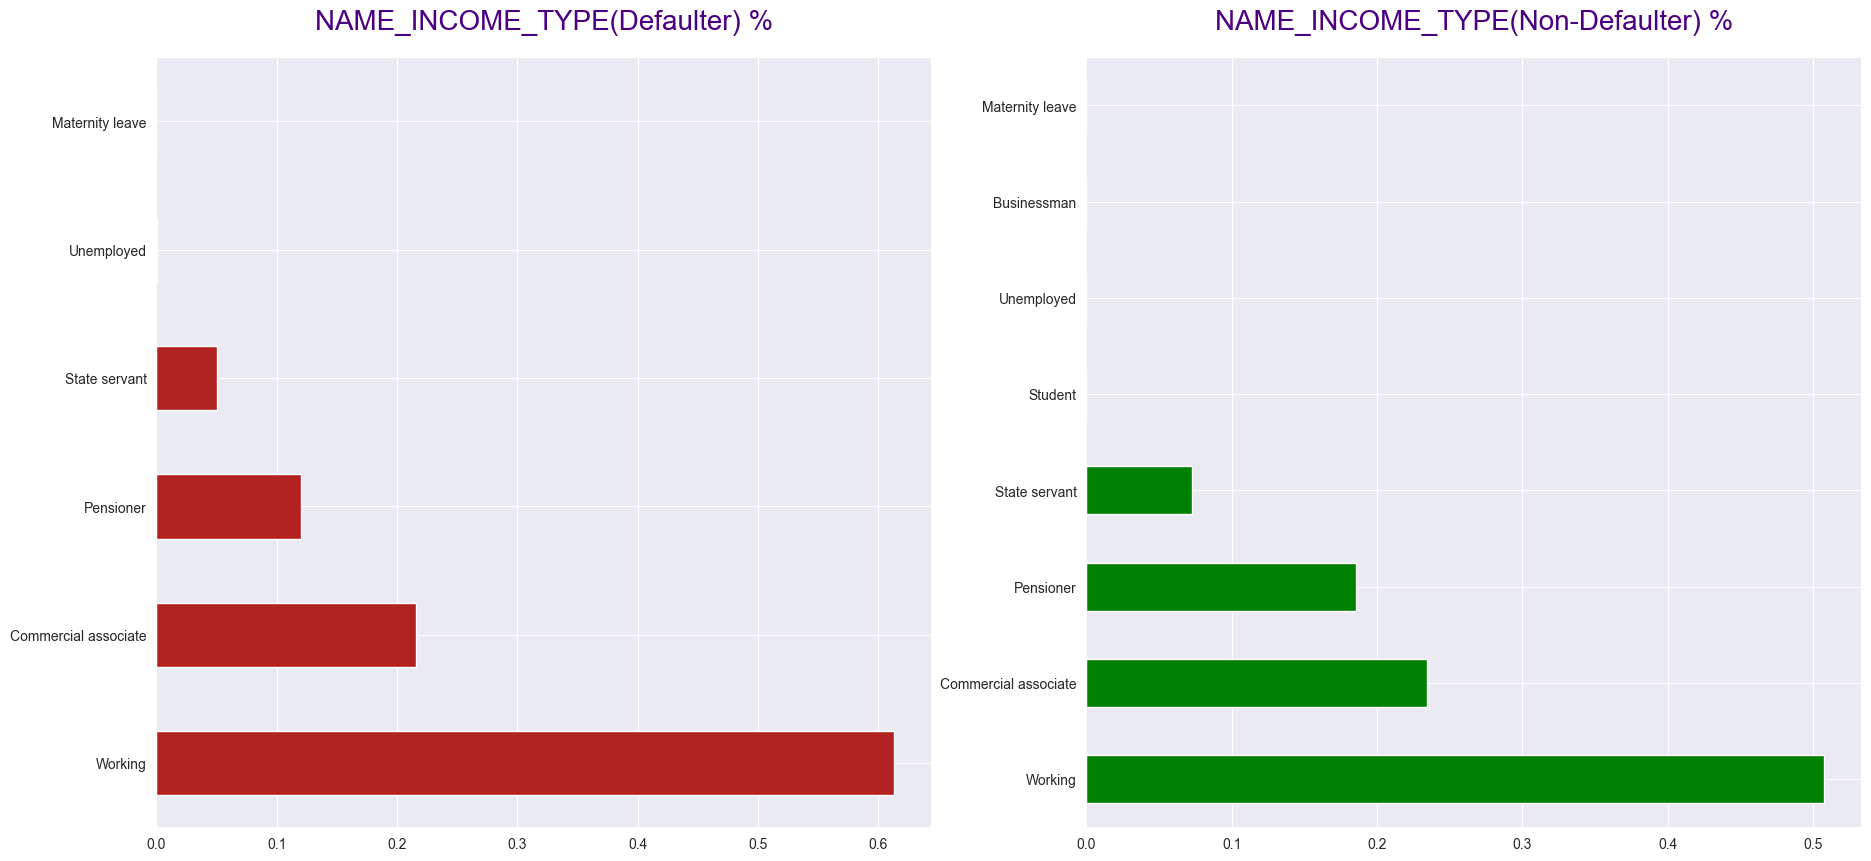

In [125]:
# Income type vs Defaulting

plt.figure(figsize=[22,10])

plt.subplot(1,2,1)
target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_INCOME_TYPE(Defaulter) %", 
                                                                                             fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_INCOME_TYPE(Non-Defaulter) %", 
                                                                                         fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

We can notice that "Students" do not appear on the defaulters as they dont have to pay when they study. So they are a very good client to target.
Also businessmen dont default much like students category
Also, we see more than 10% increase in the number of "Working" category people who default loans.

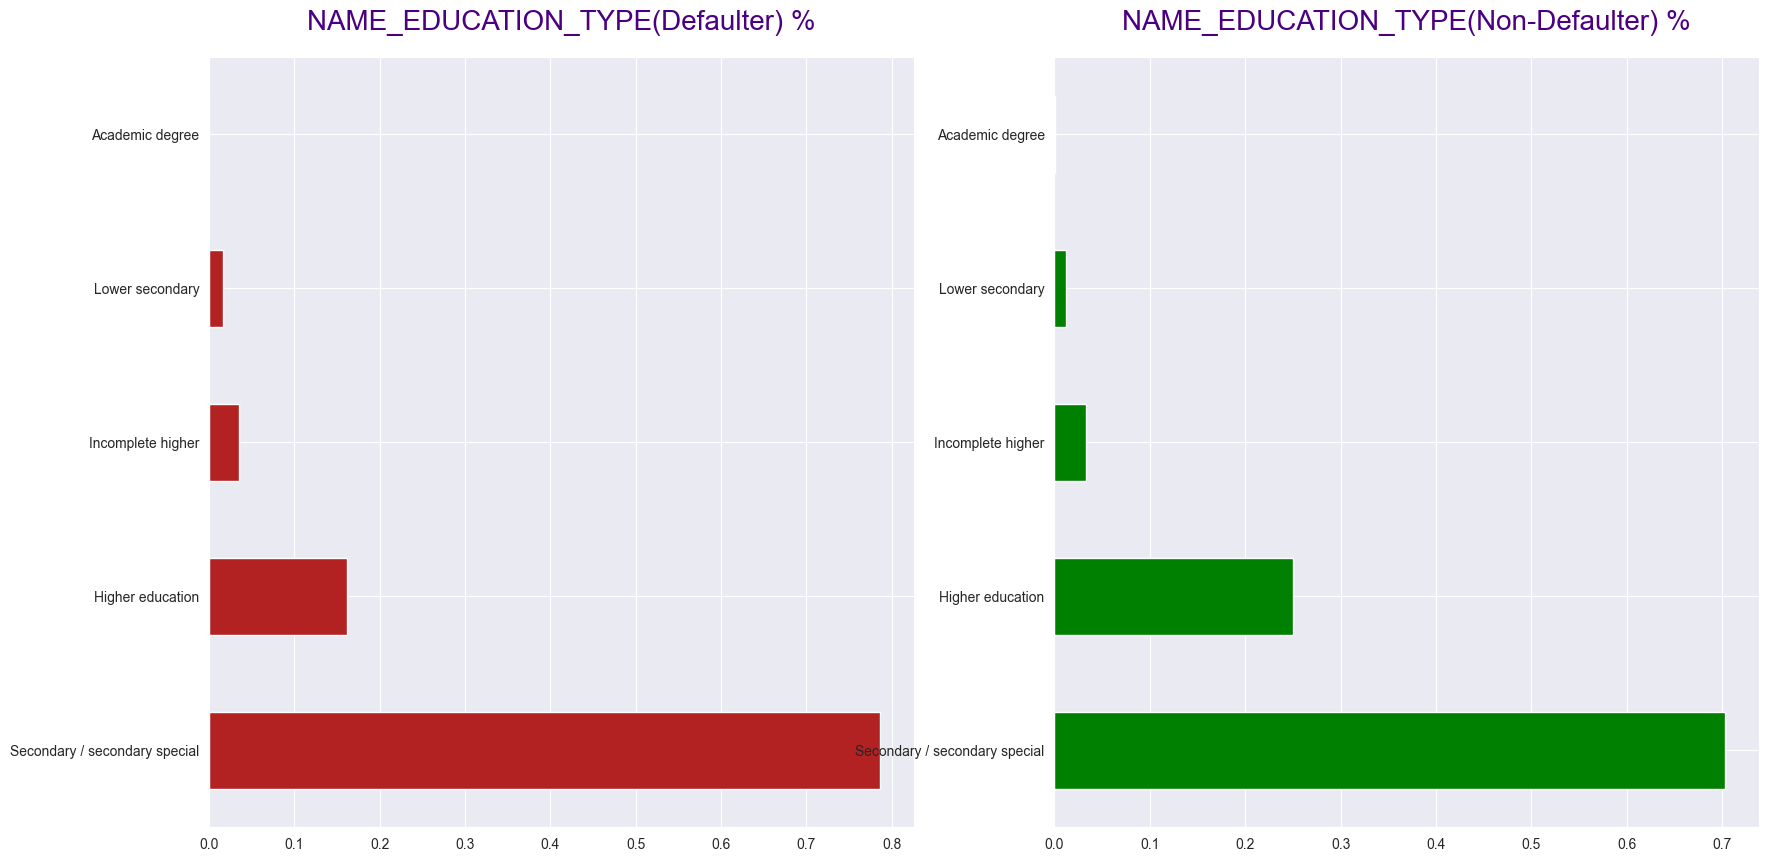

In [126]:
# Education vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_EDUCATION_TYPE(Defaulter) %", 
                                                                                                fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_EDUCATION_TYPE(Non-Defaulter) %", 
                                                                                            fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

From the above graphs we can make out that people who persue "Higher Education" are less likely to default loans.
Client who have attained only "Secondary education" are more likely to default

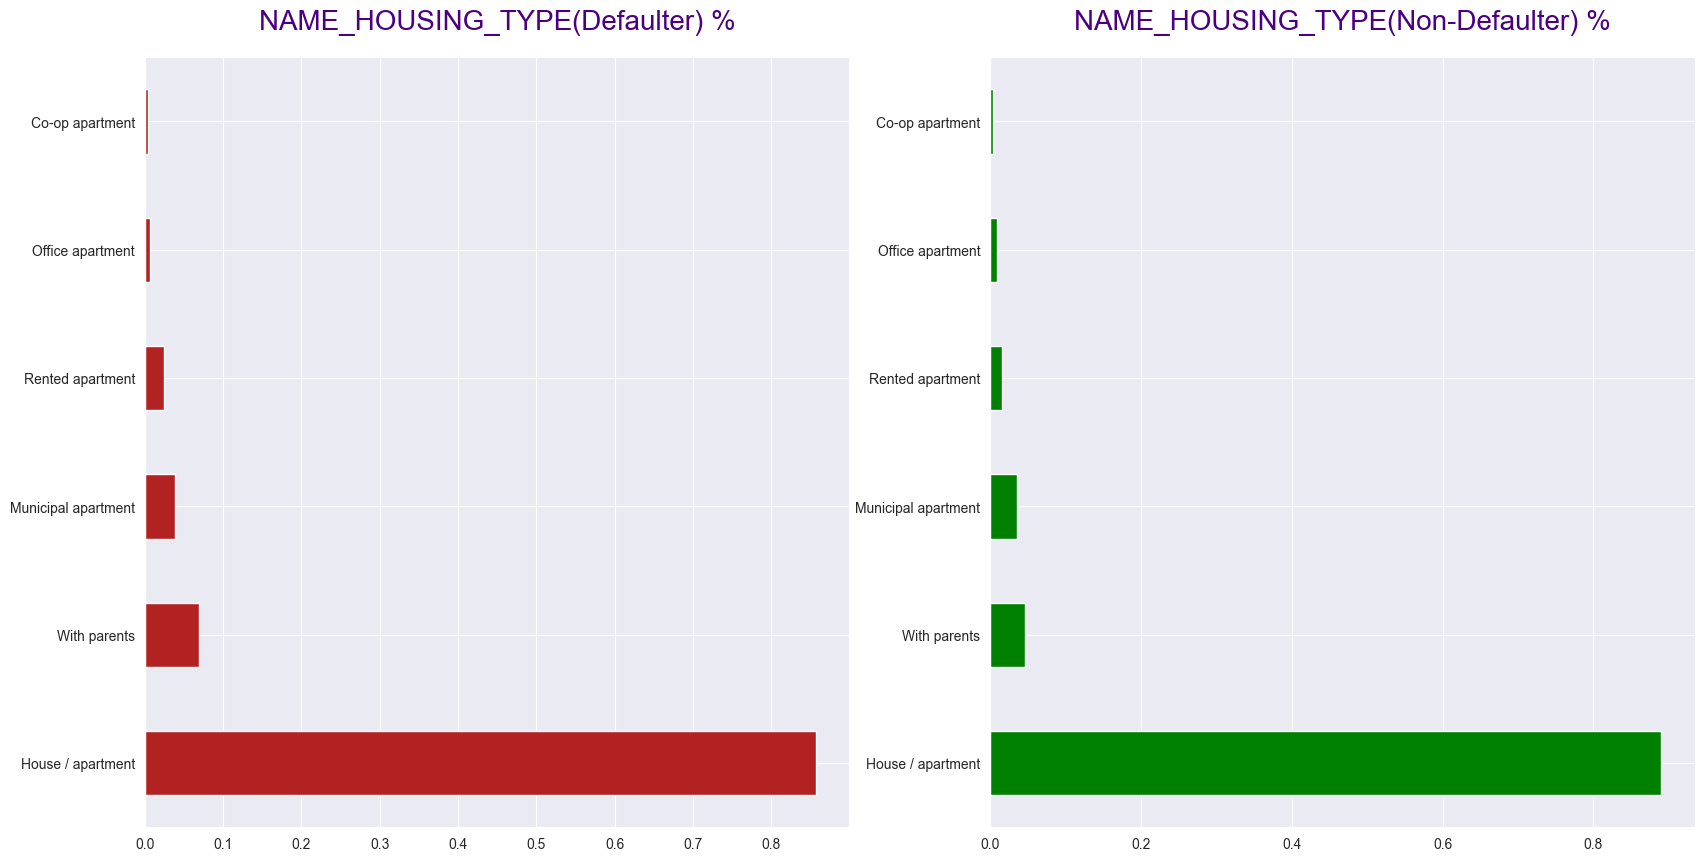

In [127]:
# Housing vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_HOUSING_TYPE(Defaulter) %",
                                                                                              fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_HOUSING_TYPE(Non-Defaulter) %",
                                                                                          fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Here we see only a minor change in the "With Parents" category by only a few percentage.
We can imply that clients who live with their parents might not be well established and might end up having difficulty in paying a loan back.
people who have House/Appartment tend to apply for more loans.

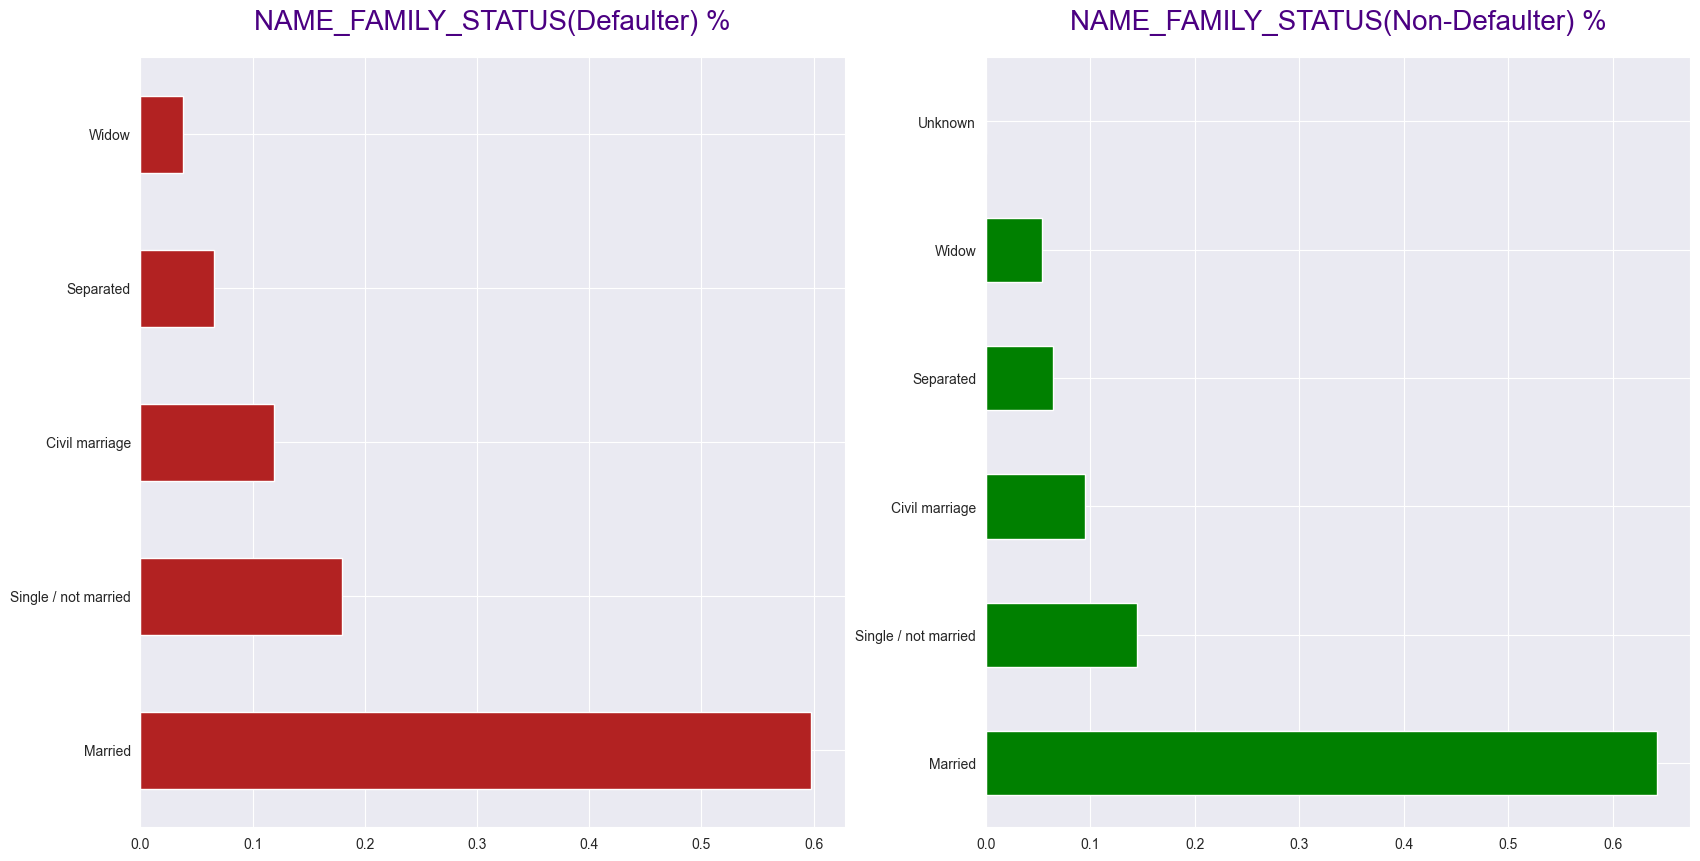

In [128]:
# Marital Status vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_FAMILY_STATUS(Defaulter) %",
                                                                                               fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh(color='green').set_title("NAME_FAMILY_STATUS(Non-Defaulter) %",
                                                                                           fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

We can observe that single and civil marraige people are more likely to default.
Married people are less likely to default.

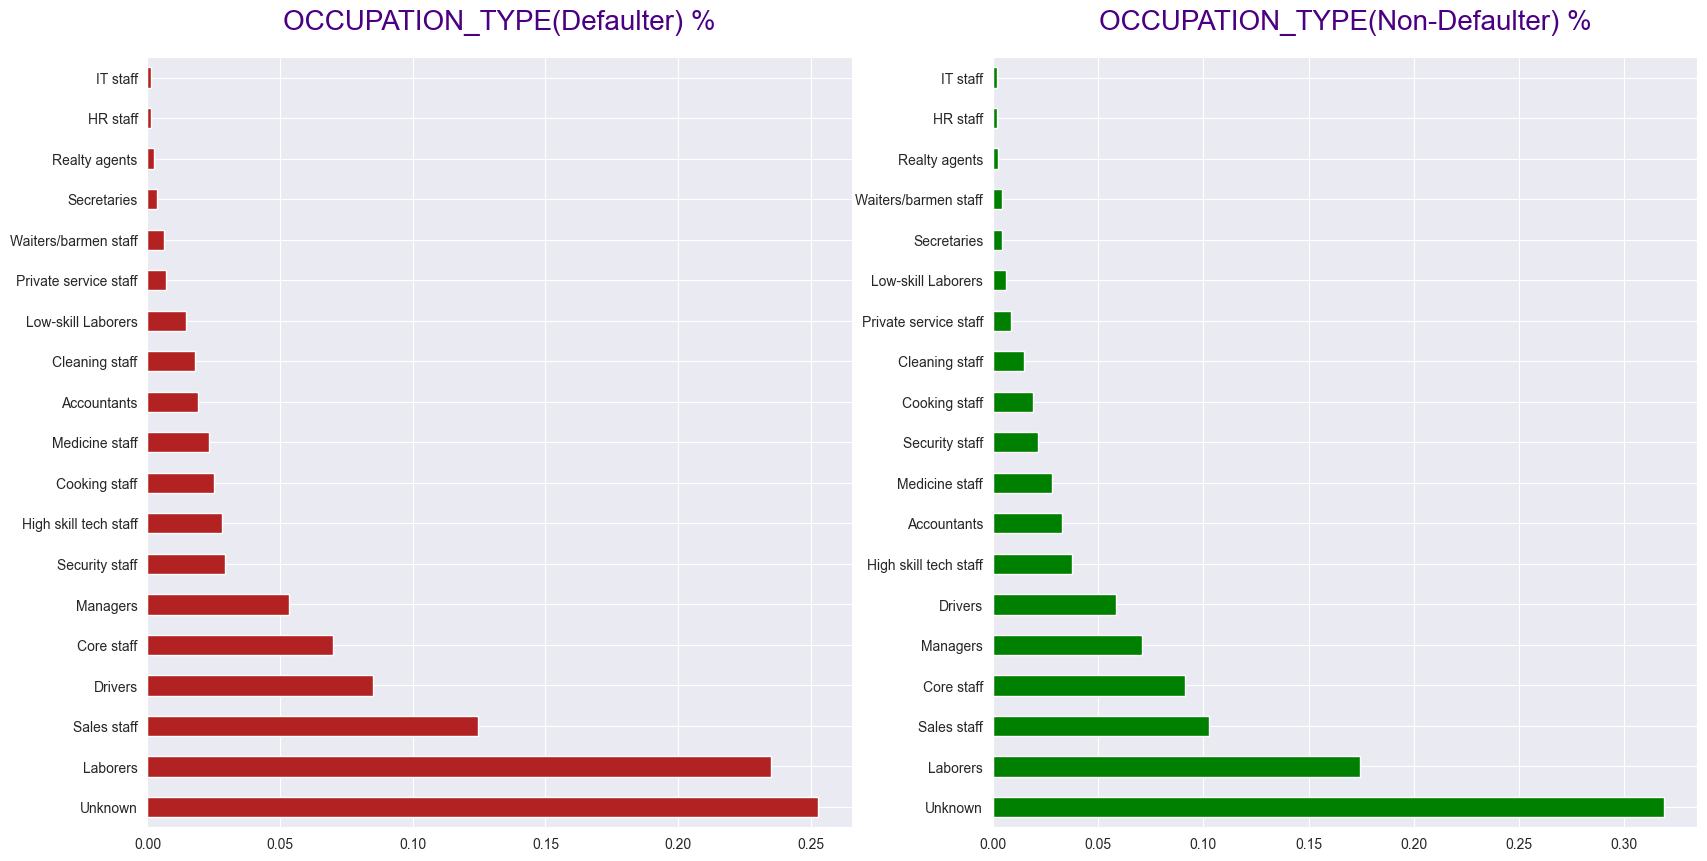

In [129]:
# Occupations vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("OCCUPATION_TYPE(Defaulter) %", 
                                                                                            fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("OCCUPATION_TYPE(Non-Defaulter) %", 
                                                                                        fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

From the above graph, we can understand that, Labourers, Sales staff, drivers, cleaning staff, low-skill labours are more likely to default a payment of the loan.
The best clients to target in this case would be Managers, core staff, high skill tech staff.

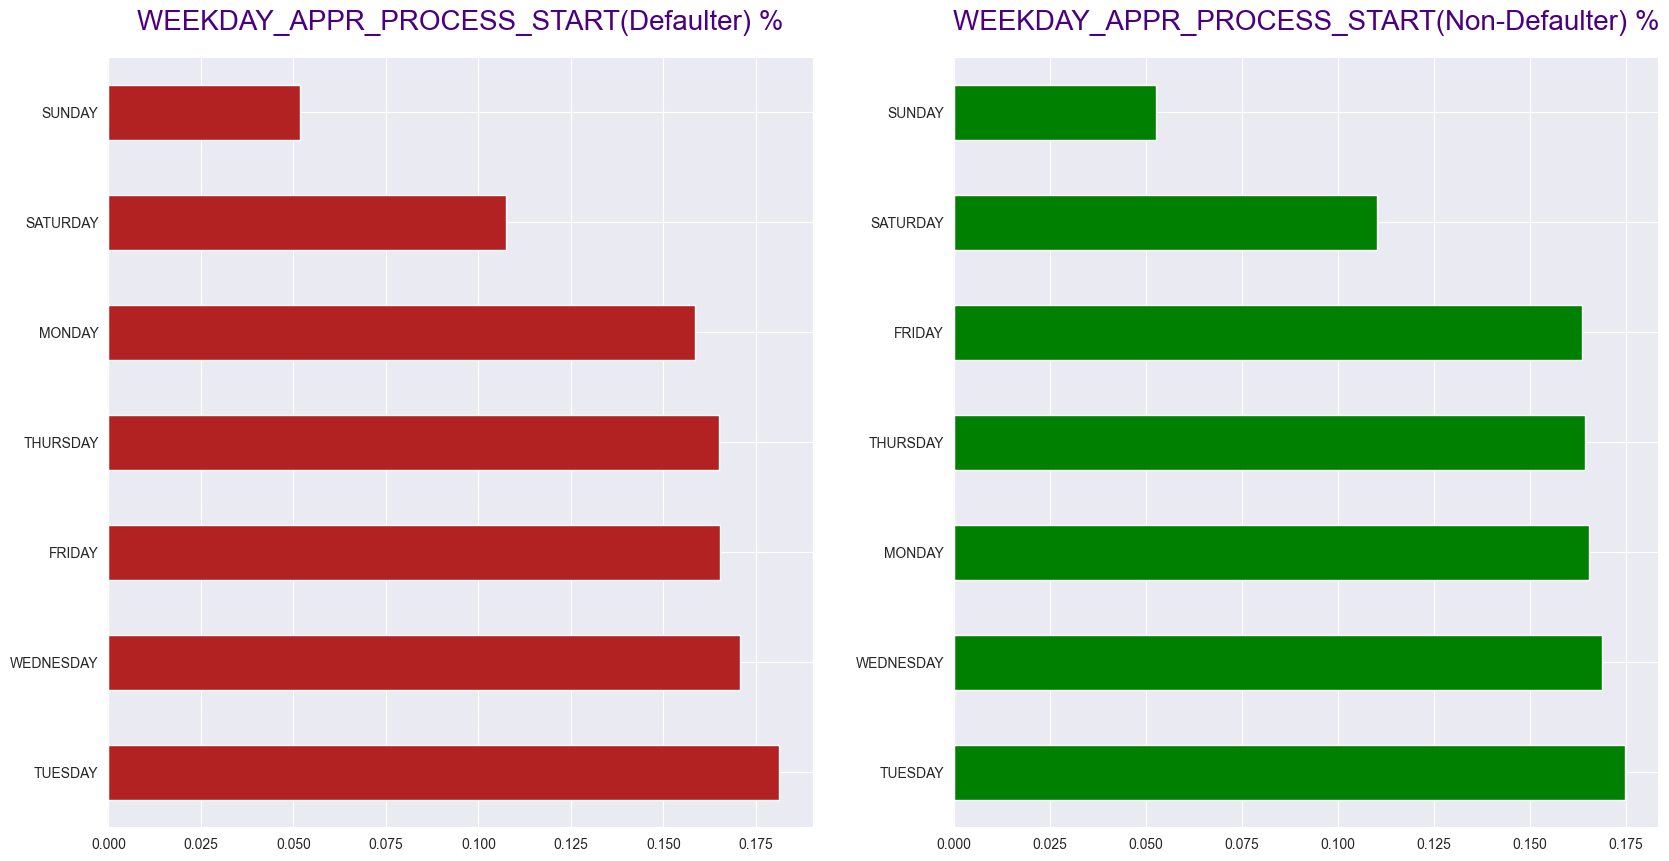

In [130]:
# Day of the Week vs Defaulting:

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh(color='firebrick').set_title("WEEKDAY_APPR_PROCESS_START(Defaulter) %", 
                                                                                                       fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh(color='green').set_title("WEEKDAY_APPR_PROCESS_START(Non-Defaulter) %", 
                                                                                                   fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Over here, we do not see any indicator of the day of the week on which the application was started having an impact on the loan default analysis.

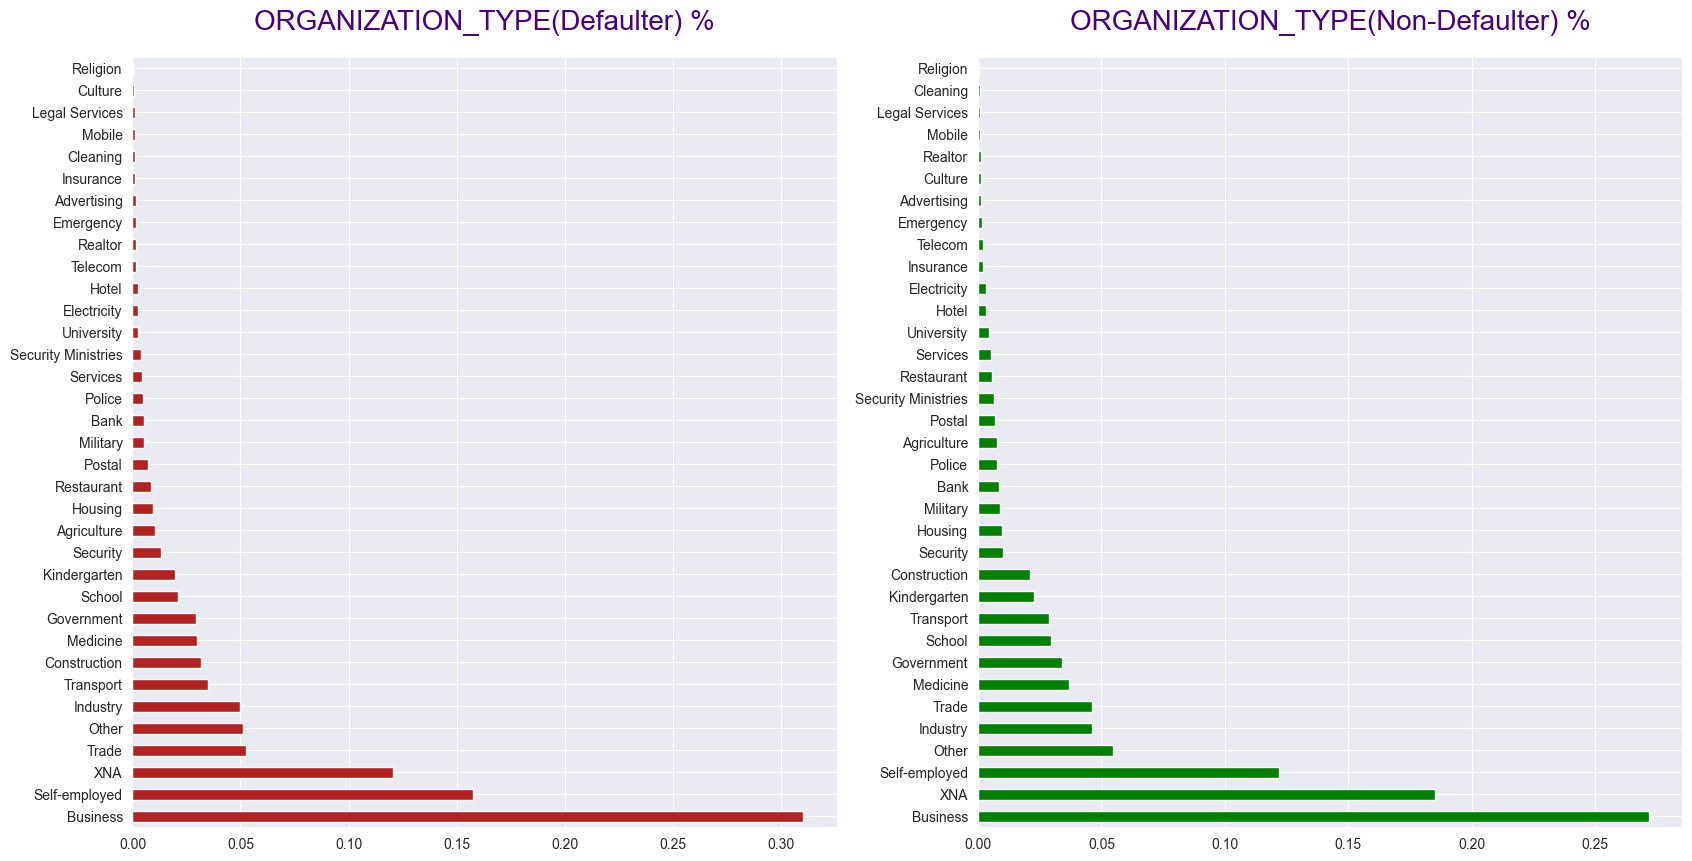

In [131]:
# Organization type vs Defaulting:

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("ORGANIZATION_TYPE(Defaulter) %", 
                                                                                              fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color='green').set_title("ORGANIZATION_TYPE(Non-Defaulter) %", 
                                                                                          fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

We can see that self employed, trade, construction, security, transport people and business people are more likely to have difficulty in paying the loan.

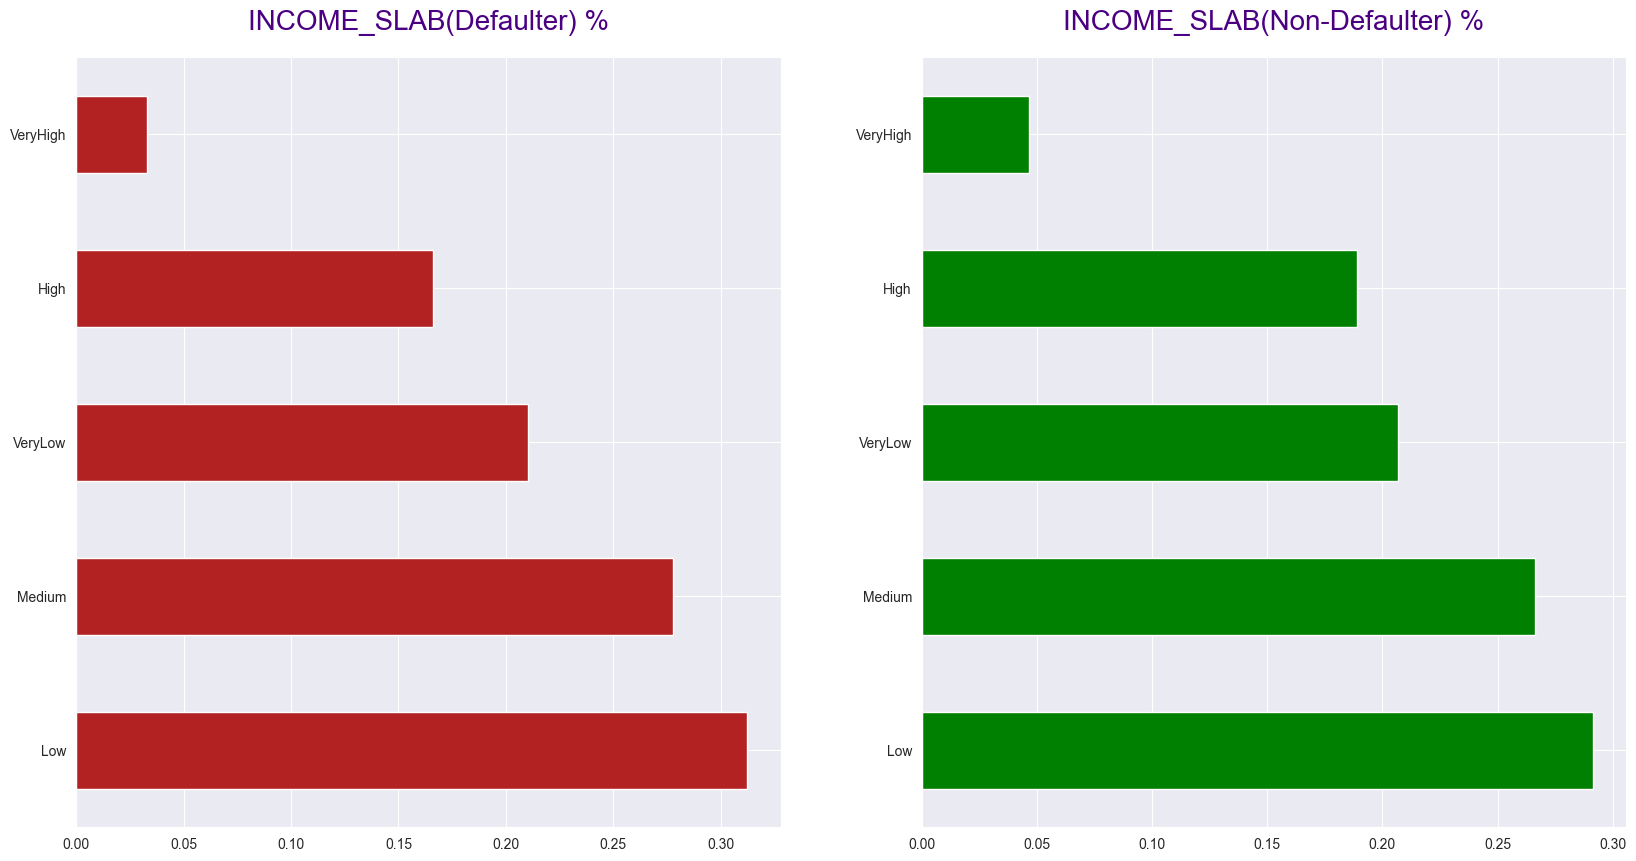

In [132]:
# Income vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.INCOME_SLAB.value_counts(normalize=True).plot.barh(color='firebrick').set_title("INCOME_SLAB(Defaulter) %", 
                                                                                        fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.INCOME_SLAB.value_counts(normalize=True).plot.barh(color='green').set_title("INCOME_SLAB(Non-Defaulter) %", 
                                                                                    fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Here people belonging to very high, high income slab do not face much difficulty with loan repayment.
However, people with low income struggle to make payment and are likely to default.

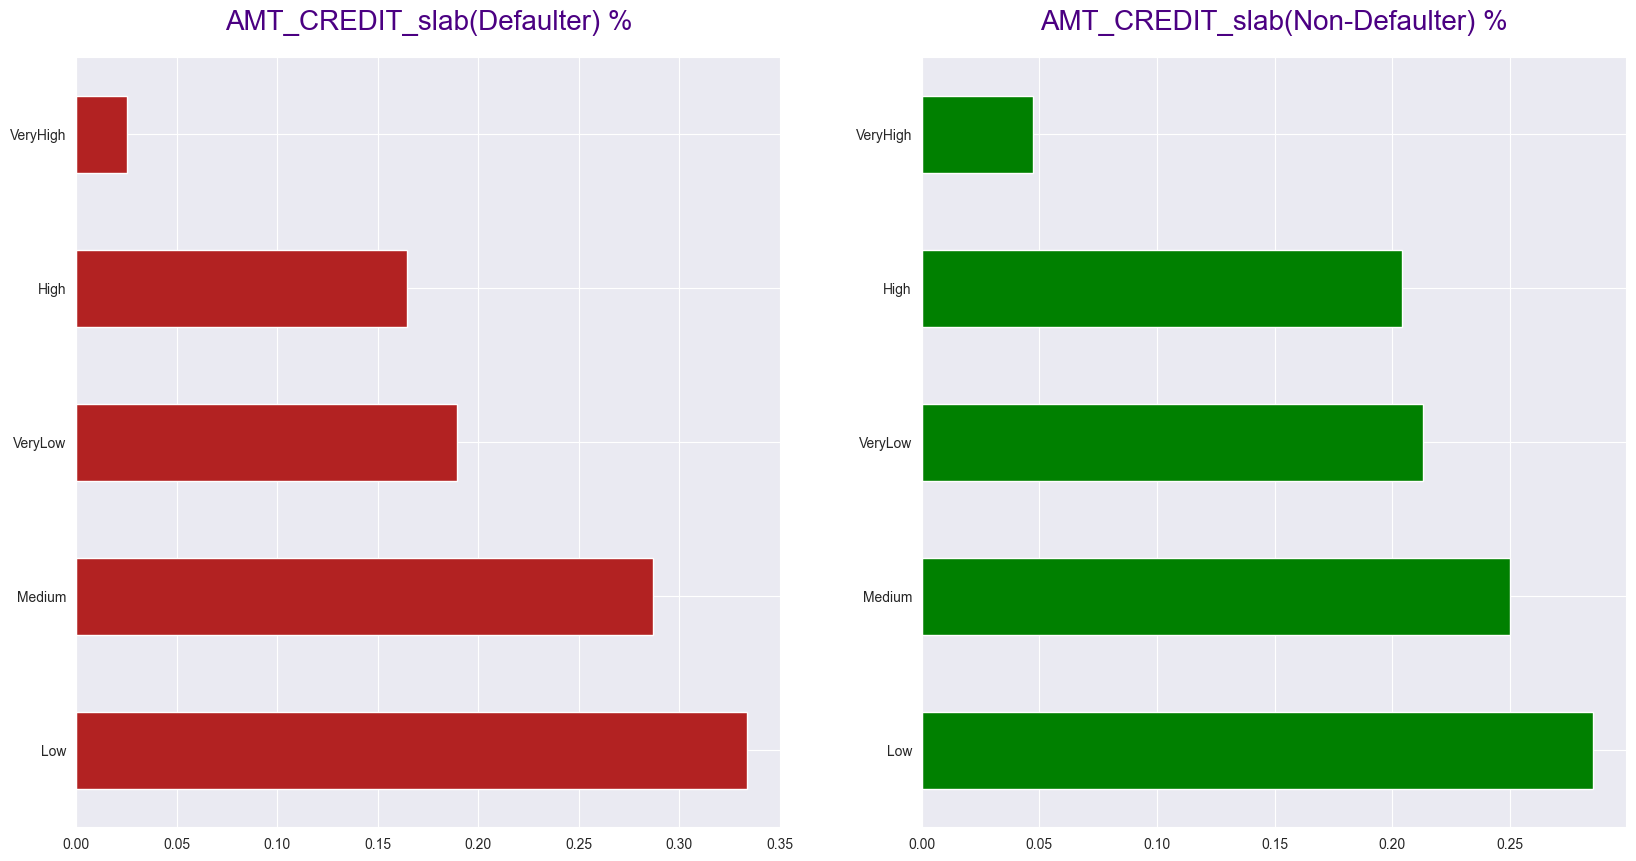

In [133]:
# Loan amount vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.AMT_CREDIT_slab.value_counts(normalize=True).plot.barh(color='firebrick').set_title("AMT_CREDIT_slab(Defaulter) %", 
                                                                                            fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.AMT_CREDIT_slab.value_counts(normalize=True).plot.barh(color='green').set_title("AMT_CREDIT_slab(Non-Defaulter) %", 
                                                                                        fontsize=20, color='indigo', pad=20)

plt.show()

INFERENCE -

Here we can see that if the amount of credit taken as a loan is high, people are less likely to default. This is due to the fact that only a rich or established client will take a loan of very high amount.
On the other hand if the loan amount is low, we can see that people struggle to pay it back.

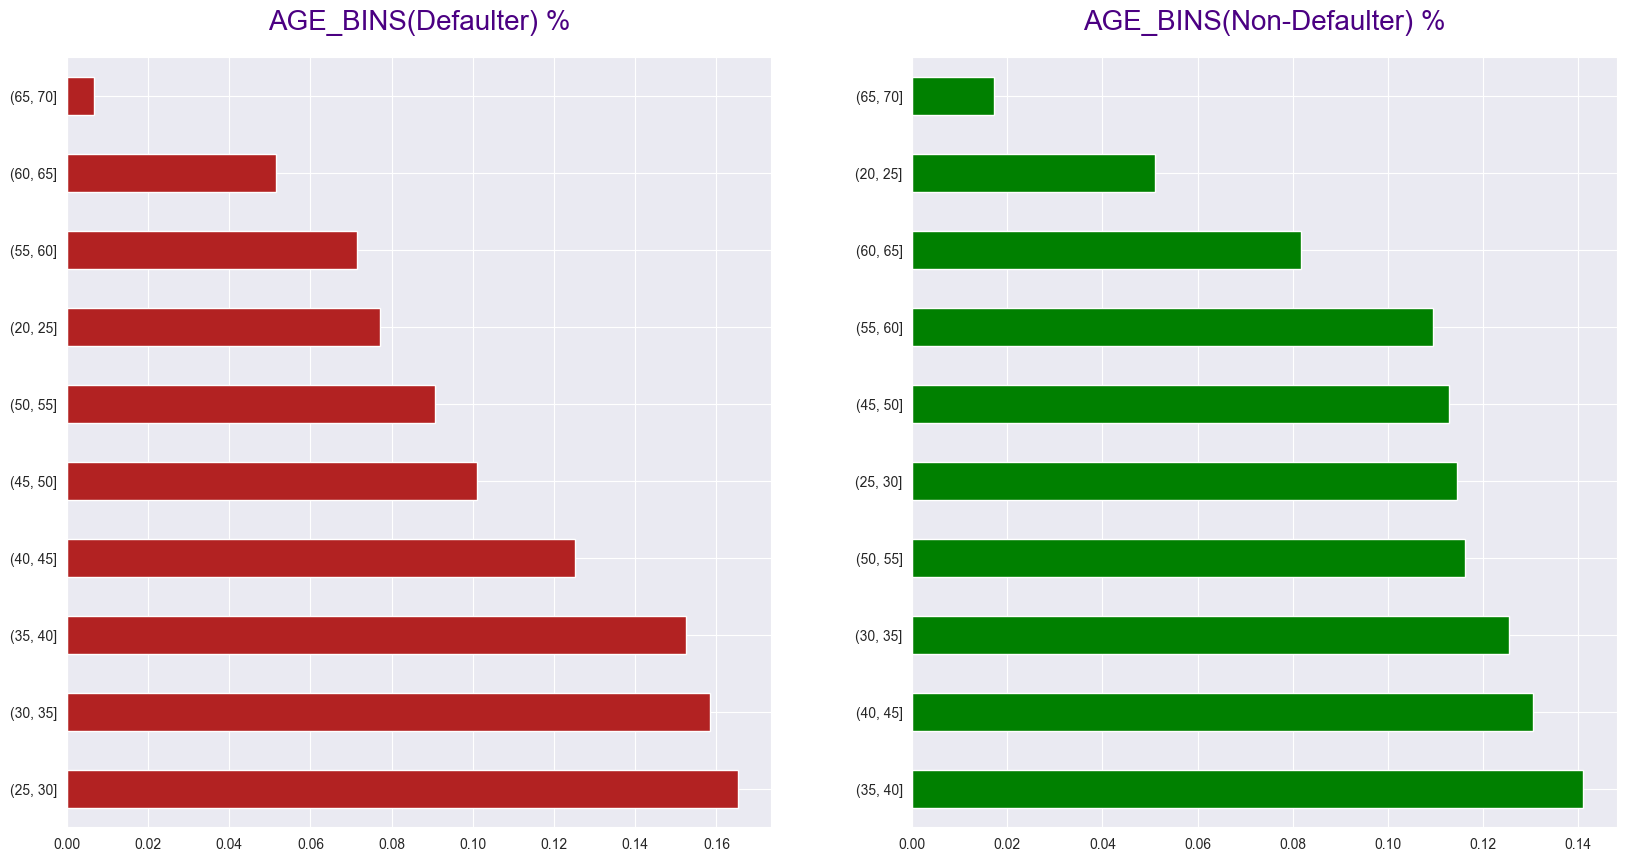

In [134]:
# Age groups vs Defaulting

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
target1.AGE_BINS.value_counts(normalize=True).plot.barh(color='firebrick').set_title("AGE_BINS(Defaulter) %", 
                                                                                     fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
target0.AGE_BINS.value_counts(normalize=True).plot.barh(color='green').set_title("AGE_BINS(Non-Defaulter) %", 
                                                                                 fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

From the above graph we can infer that the age bin from 25 to 40 are more likely to default a loan payment.
People above 45 are less likely to default.
With increasing age group, people tend to default less

### Segmented Univariate analysis (Continious Numeric columns)

In [135]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  int64   
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_CAR                 282686 non-null  object  
 5   FLAG_OWN_REALTY              282686 non-null  object  
 6   CNT_CHILDREN                 282686 non-null  int64   
 7   AMT_INCOME_TOTAL             282686 non-null  float64 
 8   AMT_CREDIT                   282686 non-null  float64 
 9   AMT_ANNUITY                  282686 non-null  float64 
 10  AMT_GOODS_PRICE              282686 non-null  float64 
 11  NAME_TYPE_SUITE              282686 non-null  object  
 12  NAME_INCOME_TYPE             282686 non-null

In [136]:
target0.shape


(282686, 48)

### Working on the Previous_application dataset:

In [137]:
prev_credit.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [138]:
#Checking Shapes

prev_credit.shape

(1670214, 37)

In [139]:
prev_credit.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Keeping only the necessary columns for merge and analysis:

In [140]:
# columns required:

cols_n = ['SK_ID_CURR', 'AMT_APPLICATION', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
         'CODE_REJECT_REASON','NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE',
         'NAME_YIELD_GROUP']

prev_credit = prev_credit.loc[:,cols_n]

In [141]:
prev_credit.shape

(1670214, 13)

In [142]:
# checking for any missing values

prev_credit.isnull().sum()

SK_ID_CURR                0
AMT_APPLICATION           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
NAME_YIELD_GROUP          0
dtype: int64

In [143]:
prev_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1670214 non-null  int64  
 1   AMT_APPLICATION         1670214 non-null  float64
 2   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 3   NAME_CONTRACT_STATUS    1670214 non-null  object 
 4   DAYS_DECISION           1670214 non-null  int64  
 5   NAME_PAYMENT_TYPE       1670214 non-null  object 
 6   CODE_REJECT_REASON      1670214 non-null  object 
 7   NAME_CLIENT_TYPE        1670214 non-null  object 
 8   NAME_GOODS_CATEGORY     1670214 non-null  object 
 9   NAME_PORTFOLIO          1670214 non-null  object 
 10  NAME_PRODUCT_TYPE       1670214 non-null  object 
 11  CHANNEL_TYPE            1670214 non-null  object 
 12  NAME_YIELD_GROUP        1670214 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 165.7+ 

In [144]:
prev_credit.DAYS_DECISION.unique()

array([  -73,  -164,  -301, ..., -1967, -2389,    -1], dtype=int64)

In [145]:
#Changing values to positive integer

prev_credit['DAYS_DECISION'] = abs(prev_credit['DAYS_DECISION'])

In [146]:
prev_credit.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [147]:
prev_credit.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [148]:
prev_credit.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [149]:
# Changing XNA to Unknown

XNA_col = ['NAME_PAYMENT_TYPE' , 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO' ]

for i in XNA_col:
    prev_credit[i] = prev_credit[i].str.replace('XNA','Unknown')

### Univariate analysis on the previous_application columns

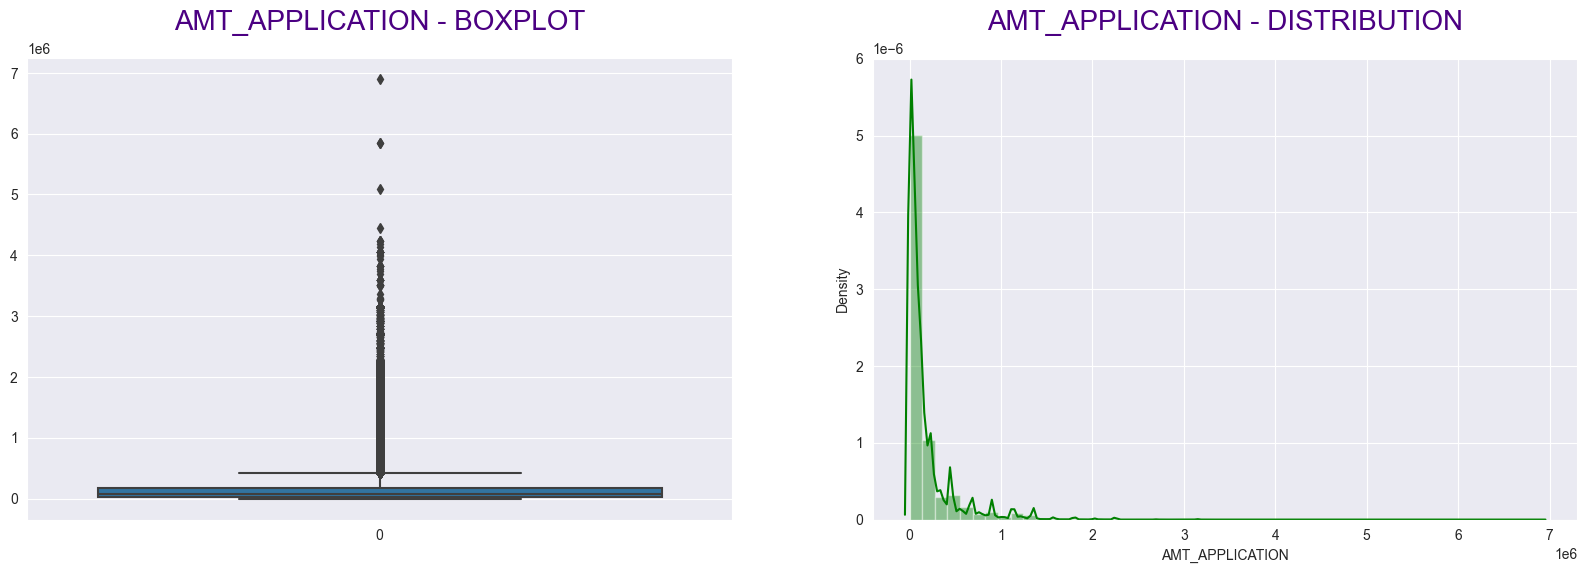

In [150]:
#plotting graph for AMT_APPLICATION

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.boxplot(prev_credit['AMT_APPLICATION']).set_title("AMT_APPLICATION - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(prev_credit['AMT_APPLICATION'], color='g').set_title("AMT_APPLICATION - DISTRIBUTION", fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

From the box plot and the histogram we can see that most of the clients have asked for credit worth 10 lakh and less.
Most of the credit being near about 1-3 lakh marker.


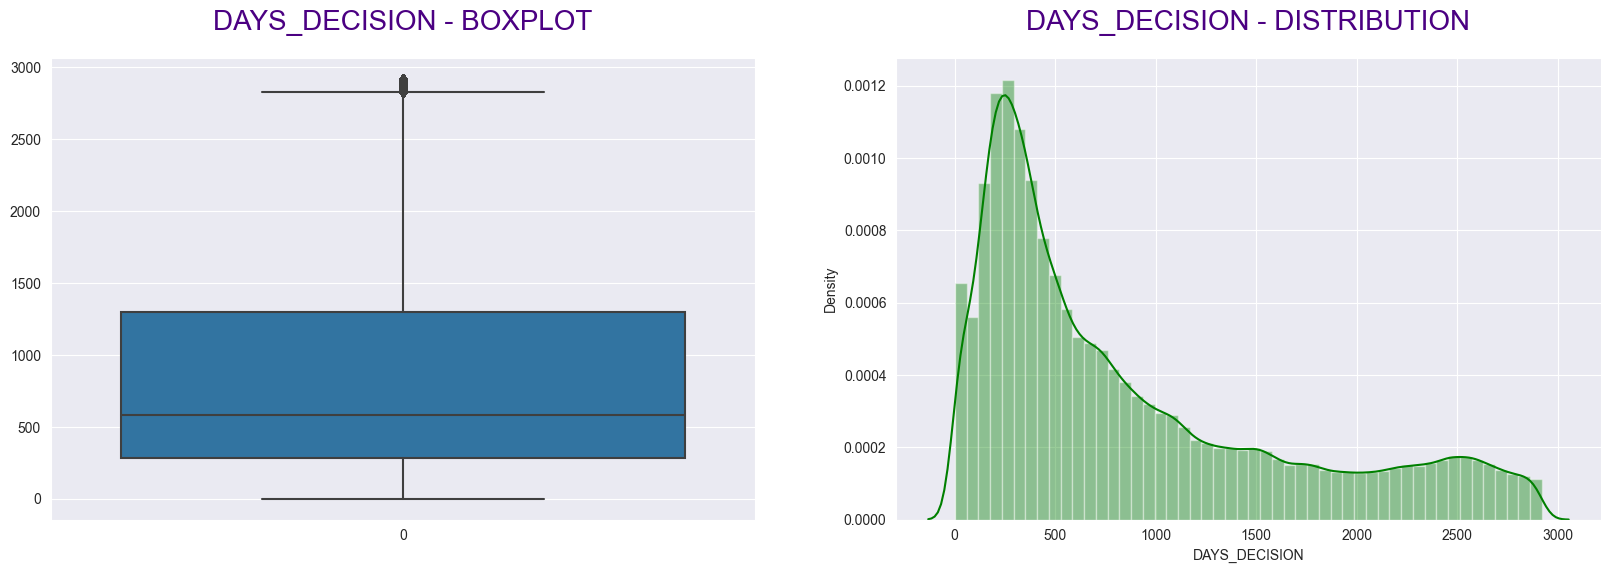

In [151]:
#plotting graph for DAYS_DECISION

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.boxplot(prev_credit['DAYS_DECISION']).set_title("DAYS_DECISION - BOXPLOT", fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
sns.distplot(prev_credit['DAYS_DECISION'], color='g').set_title("DAYS_DECISION - DISTRIBUTION", 
                                                                fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

Here we can see that most customers who took loan previously came for loan application again in 2 years time.

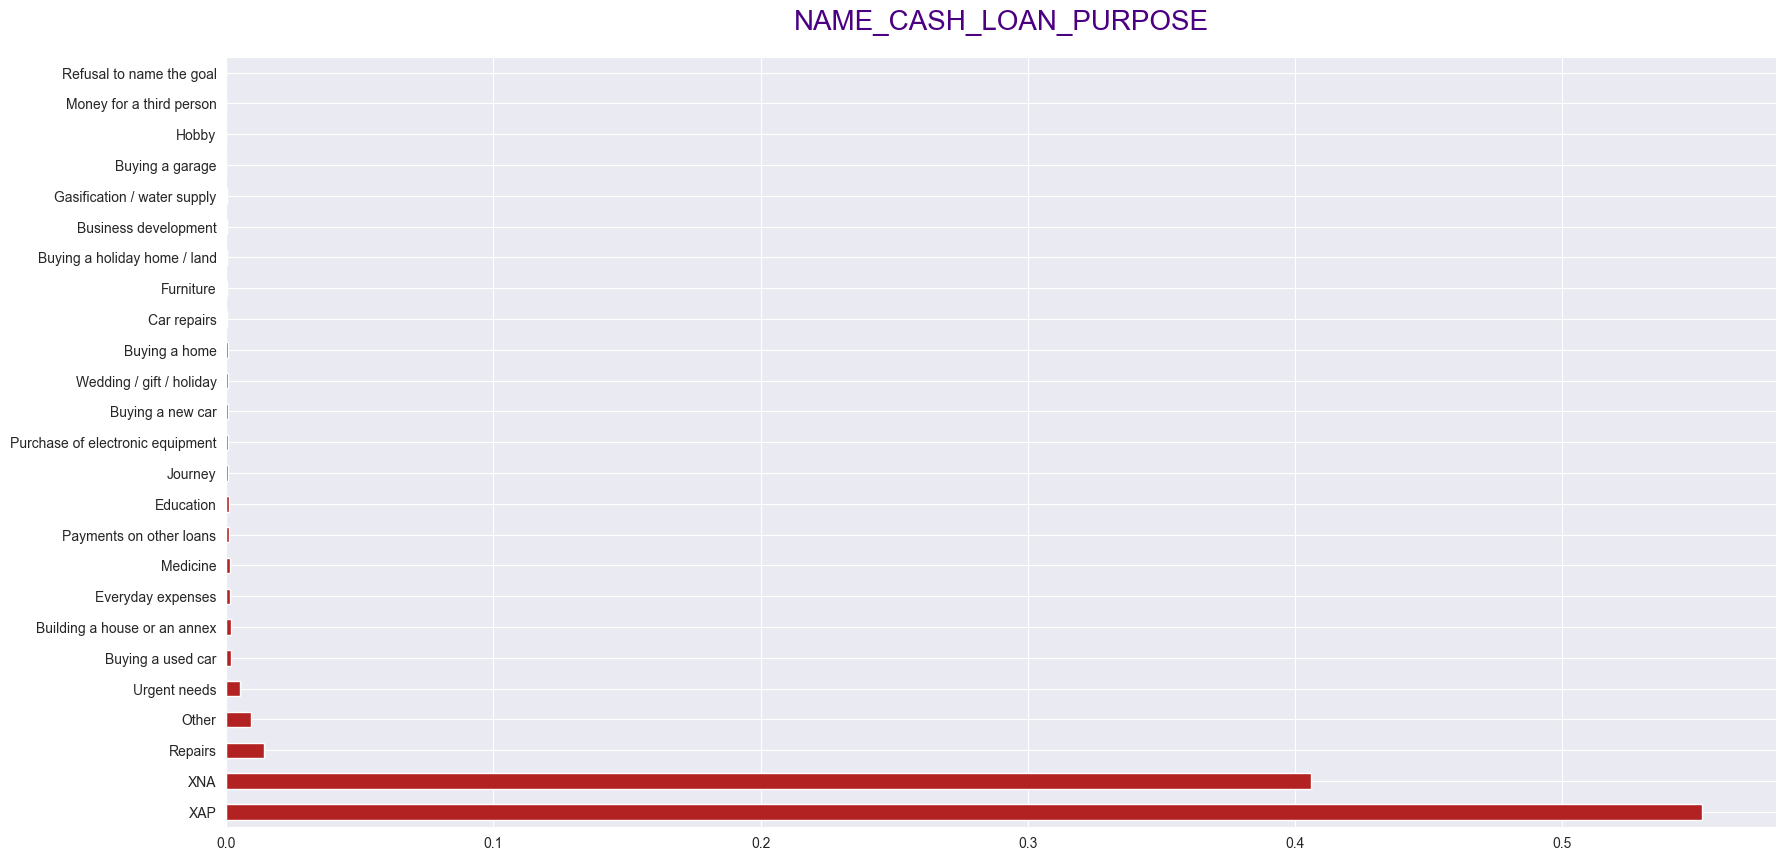

In [152]:
# Reason for loan

plt.figure(figsize=[20,10])

prev_credit.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("NAME_CASH_LOAN_PURPOSE", fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

Here most of the reason mostly unknown

In [153]:
# since most of the values are missing, this column is not useful for our analysis.

prev_credit.drop(columns=['NAME_CASH_LOAN_PURPOSE'], inplace=True)

In [154]:
prev_credit.shape

(1670214, 12)

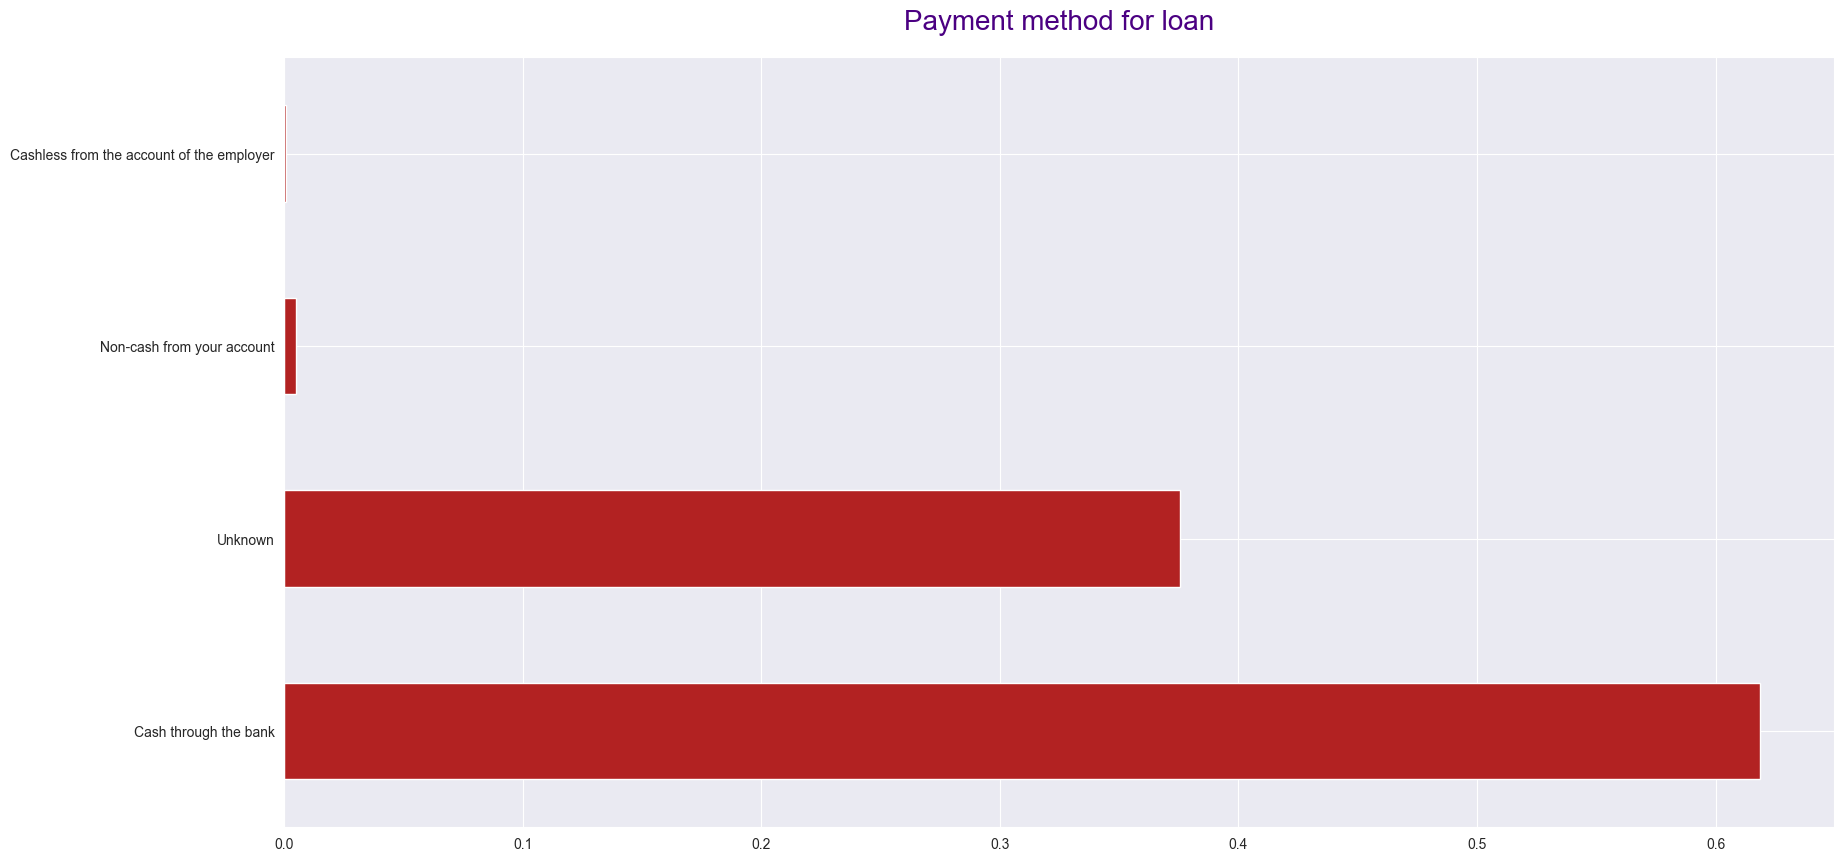

In [155]:
# Payment method for loan

plt.figure(figsize=[20,10])

prev_credit.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Payment method for loan", fontsize=20, color='indigo', pad=20)
                                                                                                  

plt.show()

Inference -
Most of the customers prefer to pay the loan back using cash through the bank.

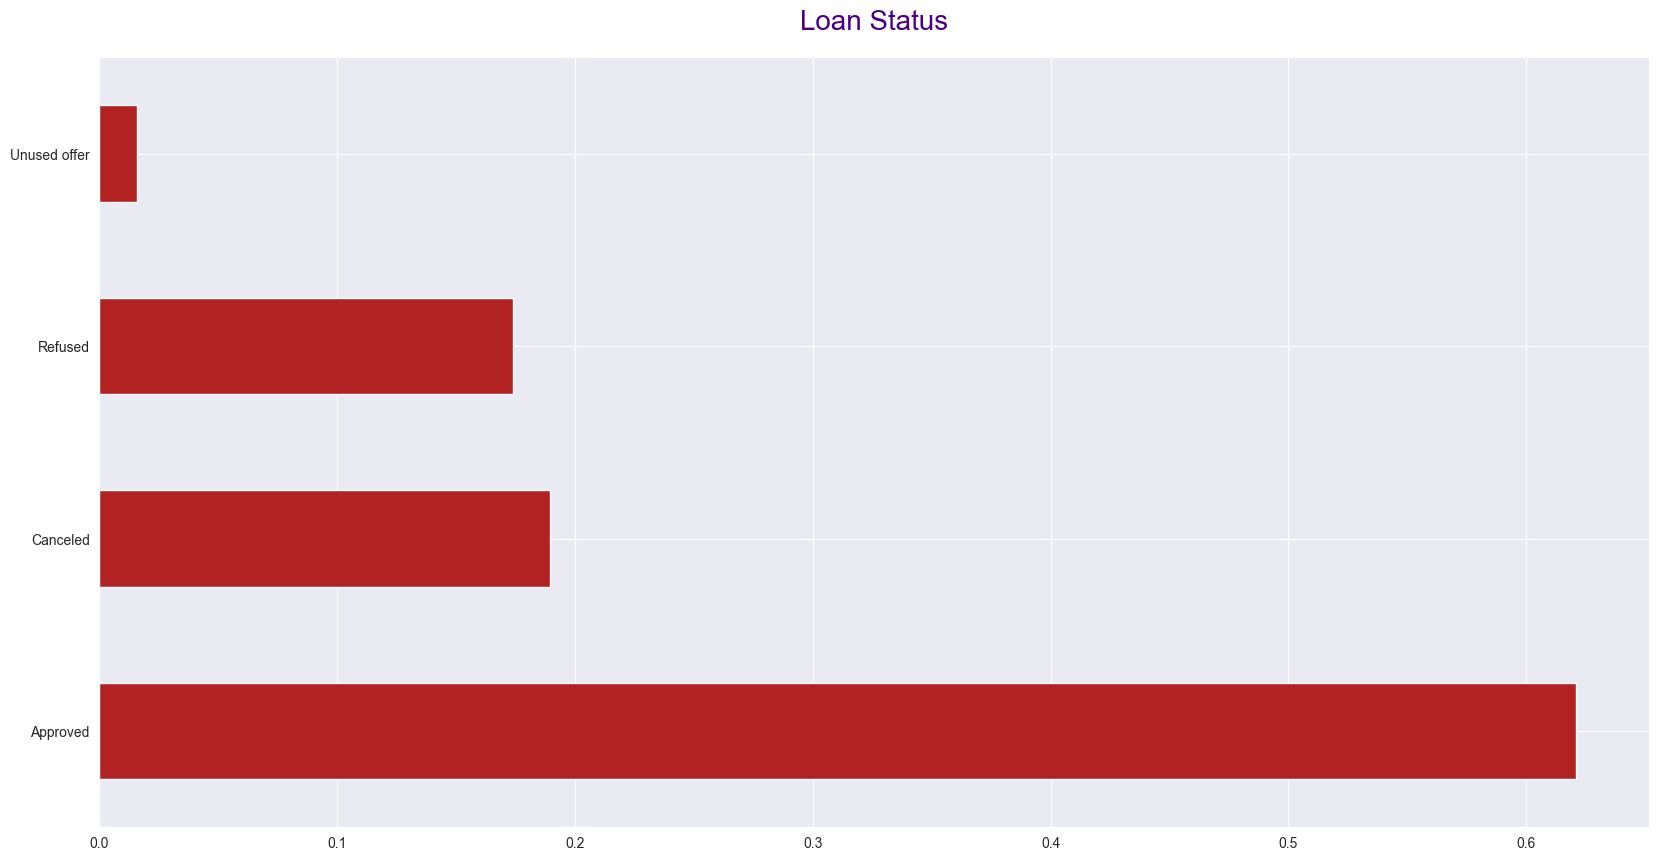

In [156]:
# Previous Status of loan

plt.figure(figsize=[20,10])

prev_credit.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Loan Status", fontsize=20, color='indigo', pad=20)
                                                                                                     

plt.show()

Inference -

About 62% of the loans were approved by the bank.
19% were cancelled and 17% were refused.

Inference -

Reason why loan was rejected, column doesn't give us much info, so it can be dropped too.

In [157]:
# since most of the values are missing, this column is not useful for our analysis.

prev_credit.drop(columns=['CODE_REJECT_REASON'], inplace=True)
prev_credit.shape

(1670214, 11)

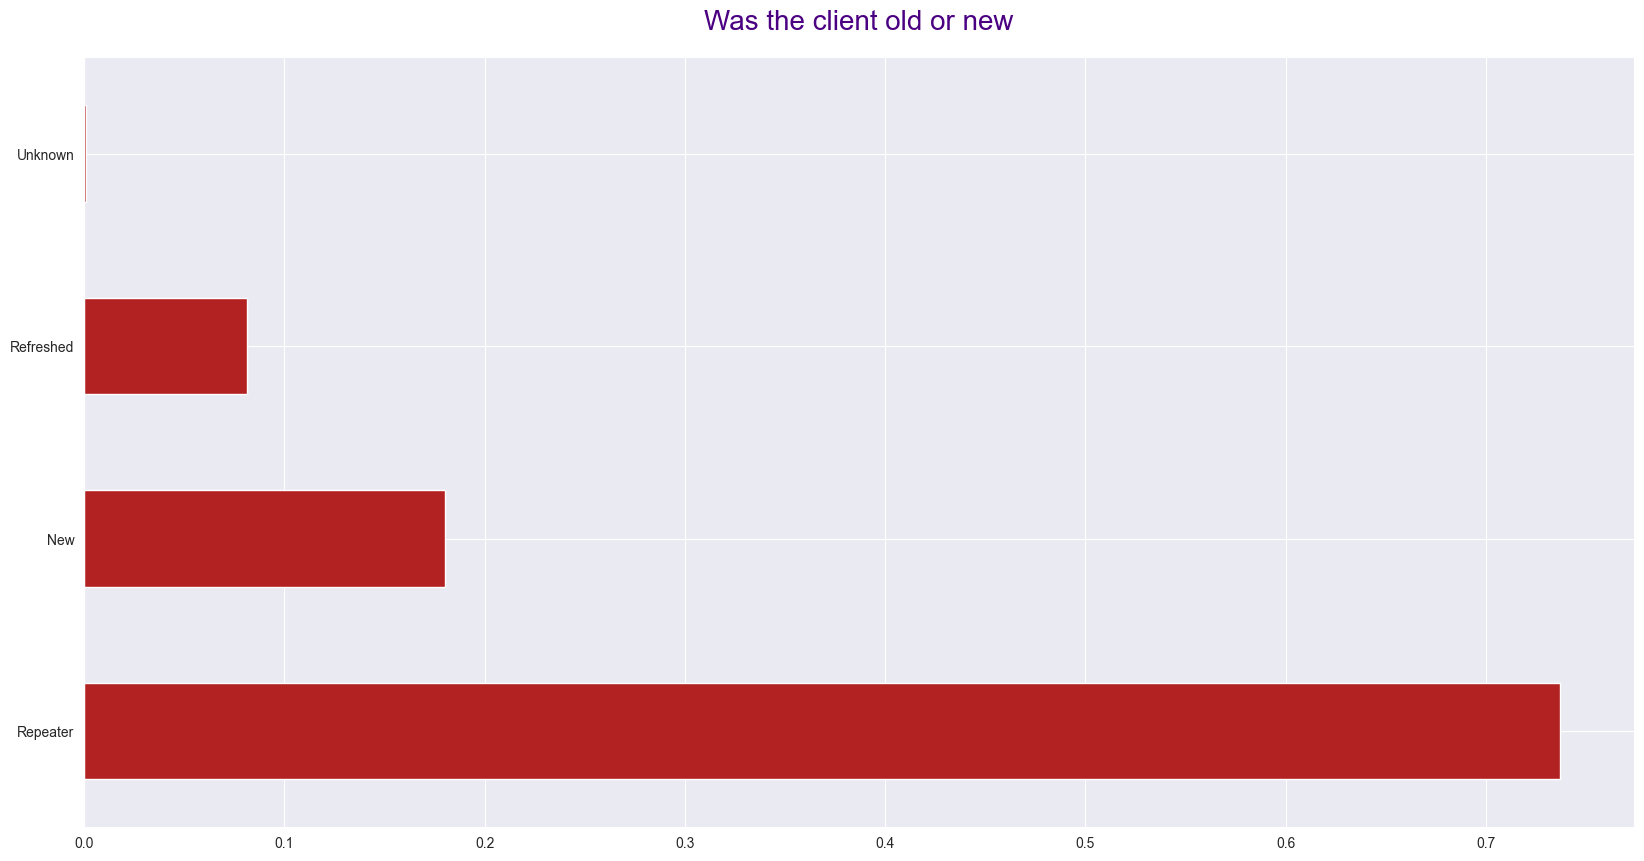

In [158]:
# Was the client old or new client when applying for the previous application

plt.figure(figsize=[20,10])

prev_credit.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Was the client old or new", 
                                                                                                 fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

From the plot above we can clearly see that most of the customers are repeaters.
Only about 19% of the customers are new.

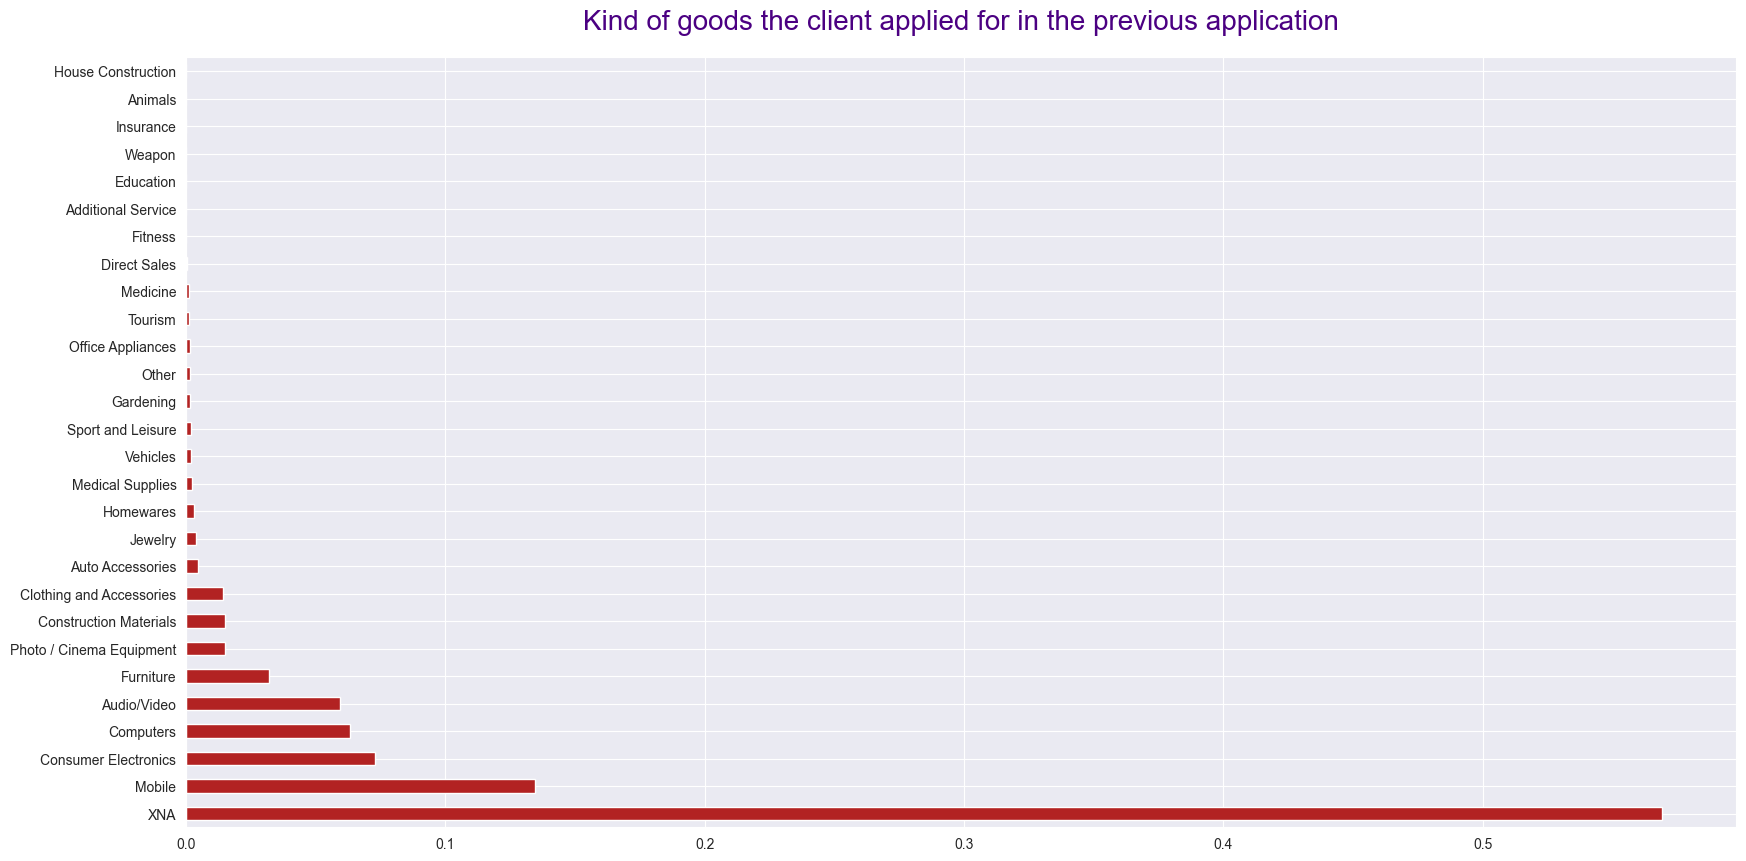

In [159]:
# Kind of goods the client applied for in the previous application

plt.figure(figsize=[20,10])

prev_credit.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Kind of goods the client applied for in the previous application", 
                                                                                                    fontsize=20, color='indigo', pad=20)

plt.show()

Inference -

Since most of the data about the customer are not disclosed, as evident by the XNA value, this column won't help in analysis.
So we need to drop this column

In [160]:
# since most of the values are missing, this column is not useful for our analysis.

prev_credit.drop(columns=['NAME_GOODS_CATEGORY'], inplace=True)
prev_credit.shape

(1670214, 10)

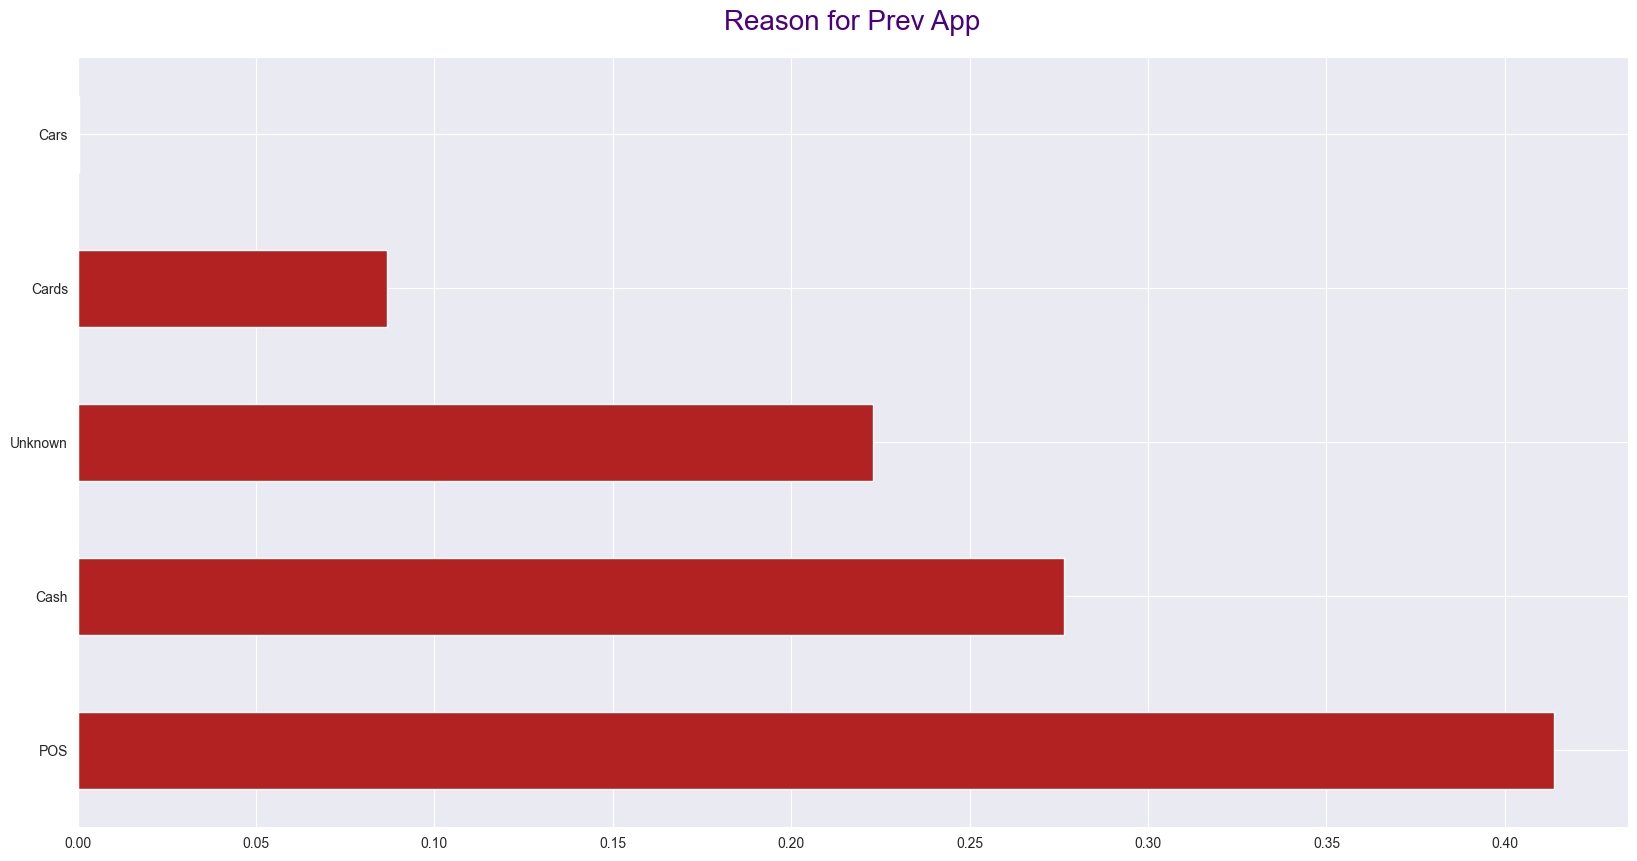

In [189]:
# Was the previous application for CASH, POS, CAR, …

plt.figure(figsize=[20,10])

prev_credit.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Reason for Prev App", 
                                                                                               fontsize=20, color='indigo', pad=20)

plt.show()

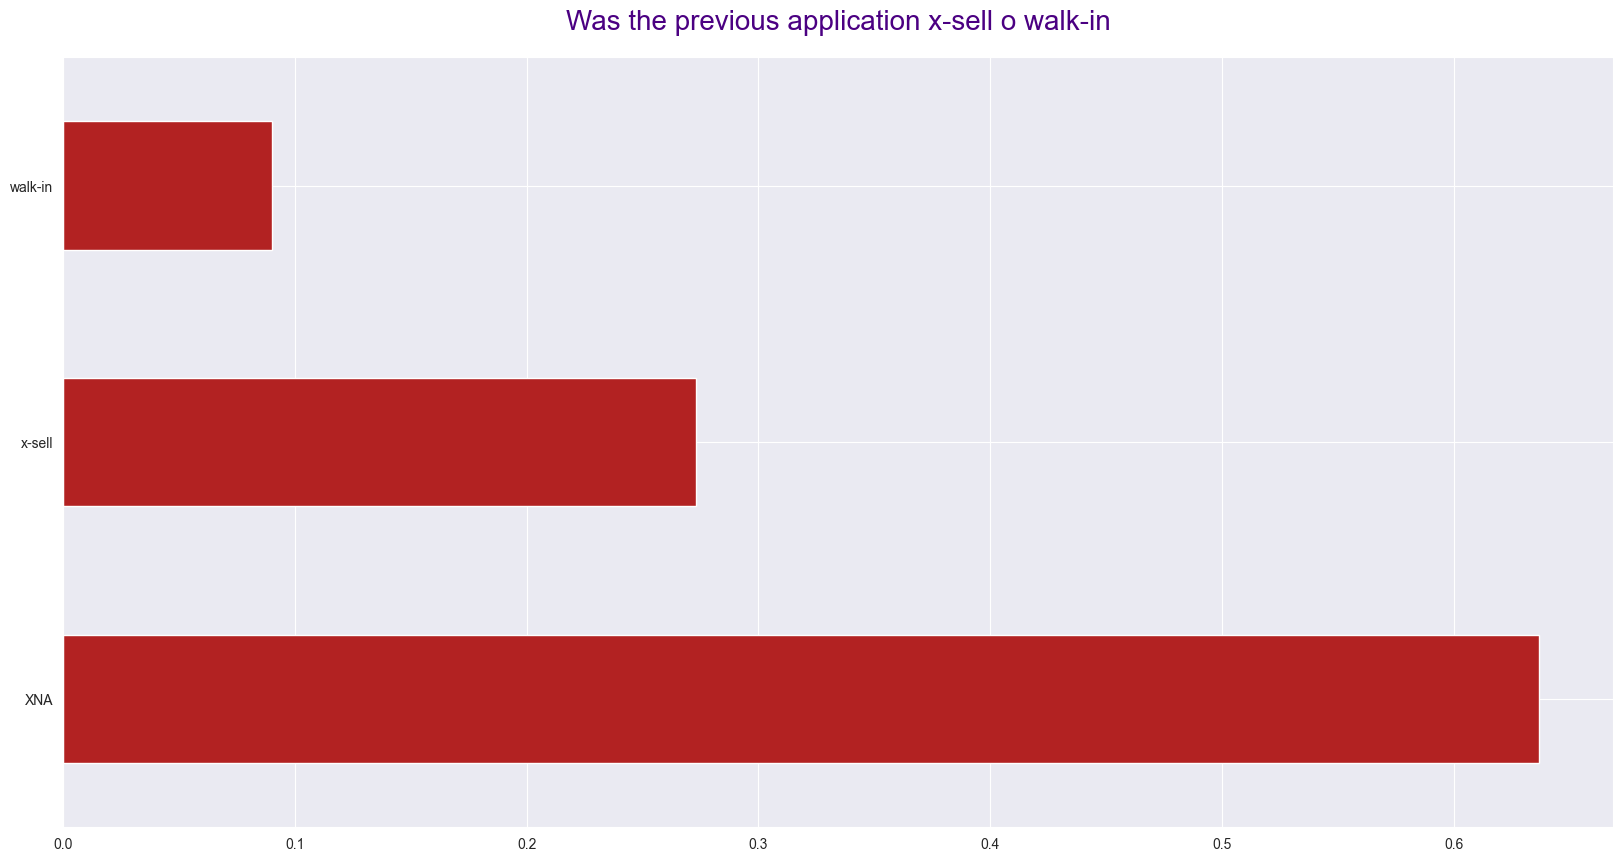

In [162]:
# Was the previous application x-sell o walk-in

plt.figure(figsize=[20,10])

prev_credit.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Was the previous application x-sell o walk-in", 
                                                                                                  fontsize=20, color='indigo', pad=20)

plt.show()

In [163]:
# Since it doesn't make sense to have this column in the dataset, we will remove this...

prev_credit.drop(columns=['NAME_PRODUCT_TYPE'], inplace=True)
prev_credit.shape

(1670214, 9)

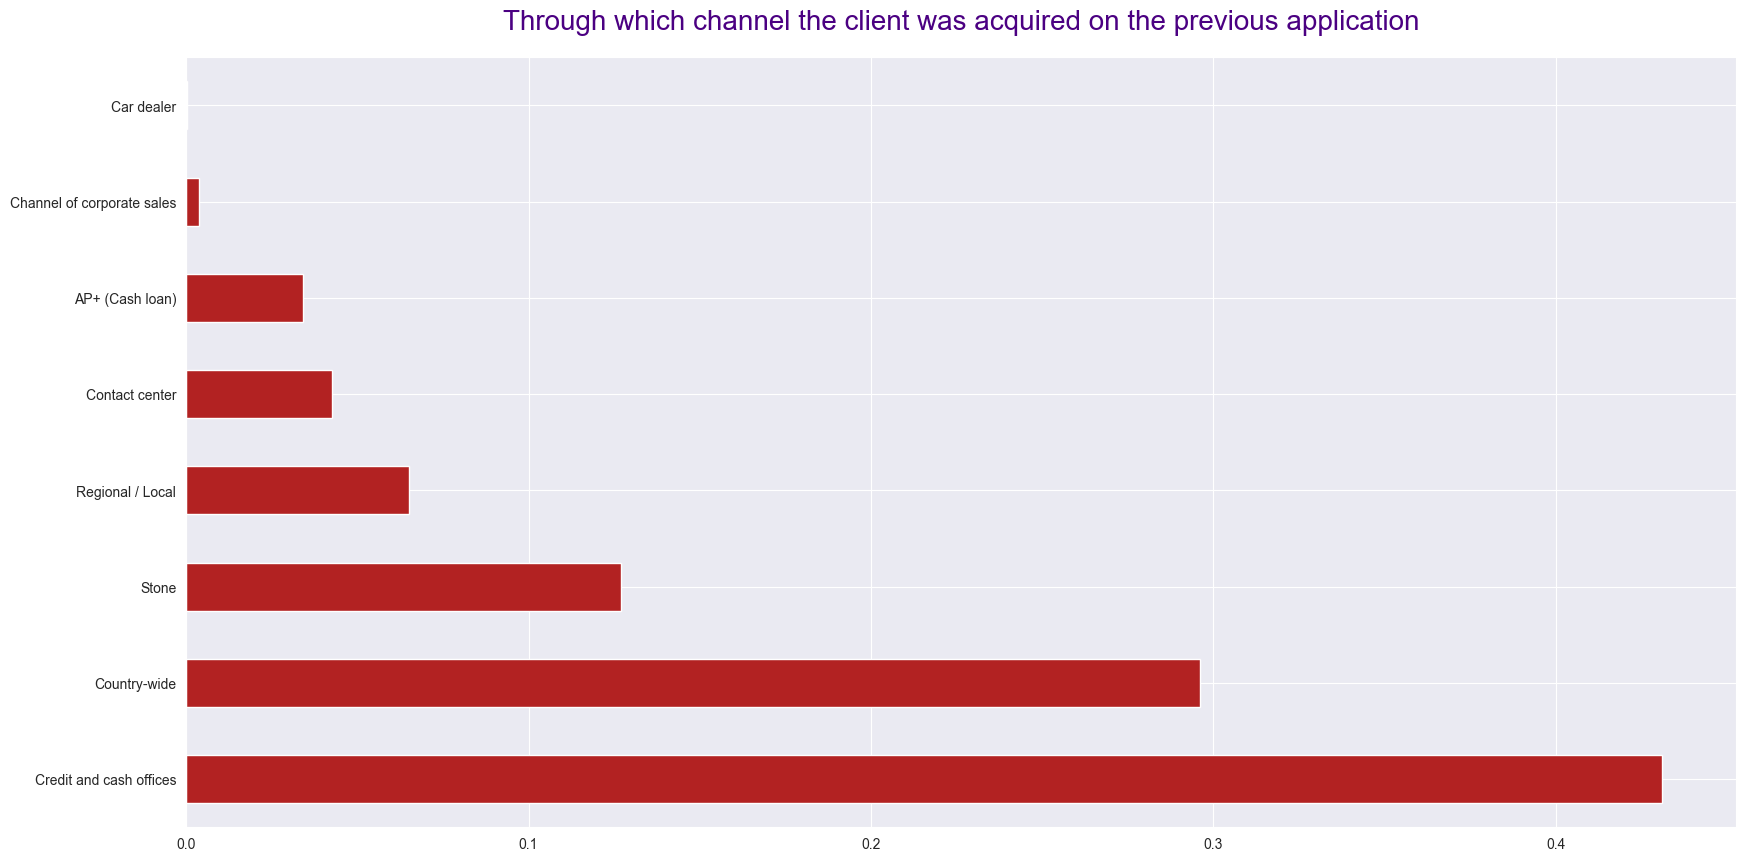

In [164]:
# Through which channel we acquired the client on the previous application

plt.figure(figsize=[20,10])

prev_credit.CHANNEL_TYPE.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Through which channel the client was acquired on the previous application", 
                                                                                             fontsize=20, color='indigo', pad=20)

plt.show()

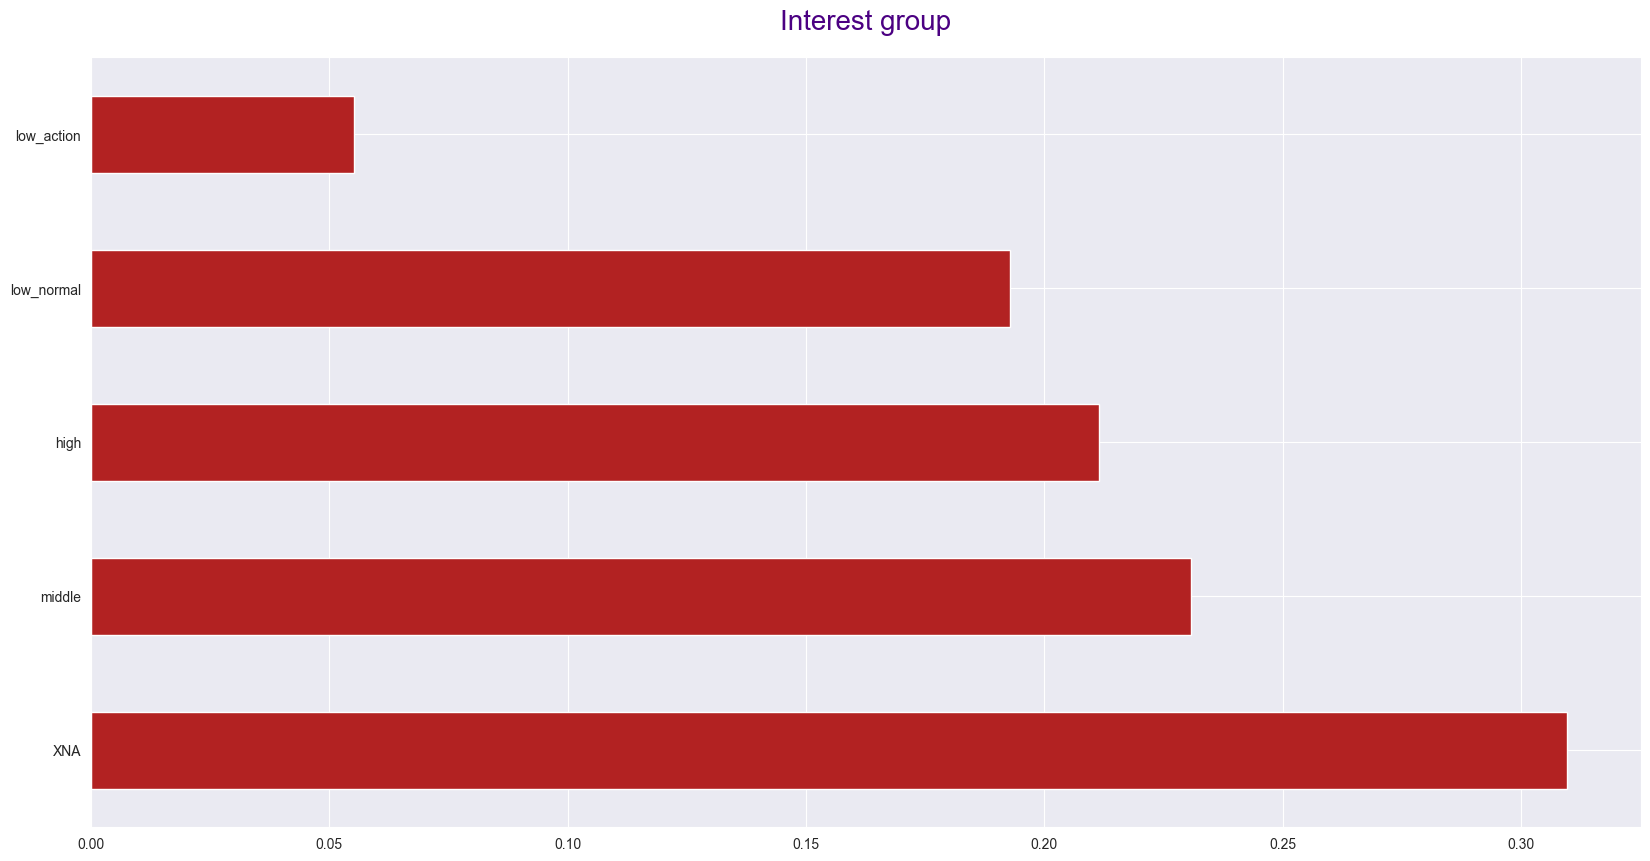

In [165]:
# Grouped interest rate into small medium and high of the previous application

plt.figure(figsize=[20,10])

prev_credit.NAME_YIELD_GROUP.value_counts(normalize=True).plot.barh(color='firebrick').set_title("Interest group", 
                                                                                                 fontsize=20, color='indigo', pad=20)

plt.show()

In [166]:
# Since this column will not add value to our analysis, we are dropping it...

prev_credit.drop(columns=['NAME_YIELD_GROUP'], inplace=True)
prev_credit.shape

(1670214, 8)

### Merging both new and old dataframes

In [167]:
new_df=pd.merge(left=new_credit , right=prev_credit , how='inner' , on='SK_ID_CURR' , suffixes='_x')

In [168]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE           1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT                   1413701 non-null  float64 
 9   AMT_ANNUITY                  1413701 non-null  float64 
 10  AMT_GOODS_PRICE              1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  object  
 12  NAME_INCOME_TYPE            

### BIVARIATE / MULTIVARIATE ANALYSIS
% of Loan Payment Difficulties

In [169]:
#% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE

table = pd.pivot_table(new_df, values='TARGET', index=['NAME_CLIENT_TYPE'],
                       columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm)

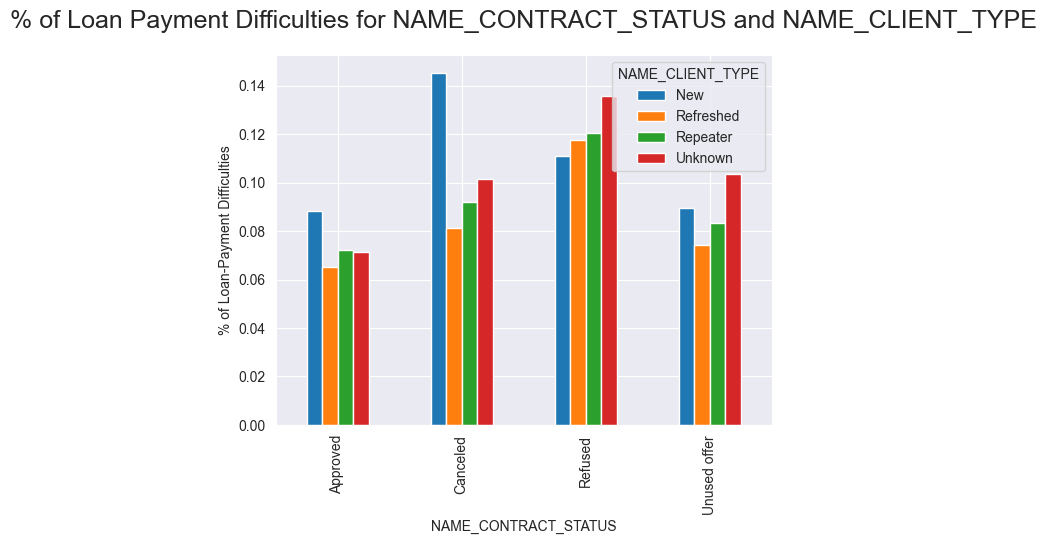

In [170]:
table.T.plot(kind='bar').set_ylabel('% of Loan-Payment Difficulties')

plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE', fontdict={'fontsize':18}, pad=20)

plt.show()

Inference -

From the above data we can infer that new clients are more likely to cancel loans.
Also, new clients are more likely to get their loan amount refused.
Repeater clients are more likely to get a loan refused.

In [171]:
#% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE

table = pd.pivot_table(new_df, values='TARGET', index=['NAME_CONTRACT_TYPE'],
                       columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm)

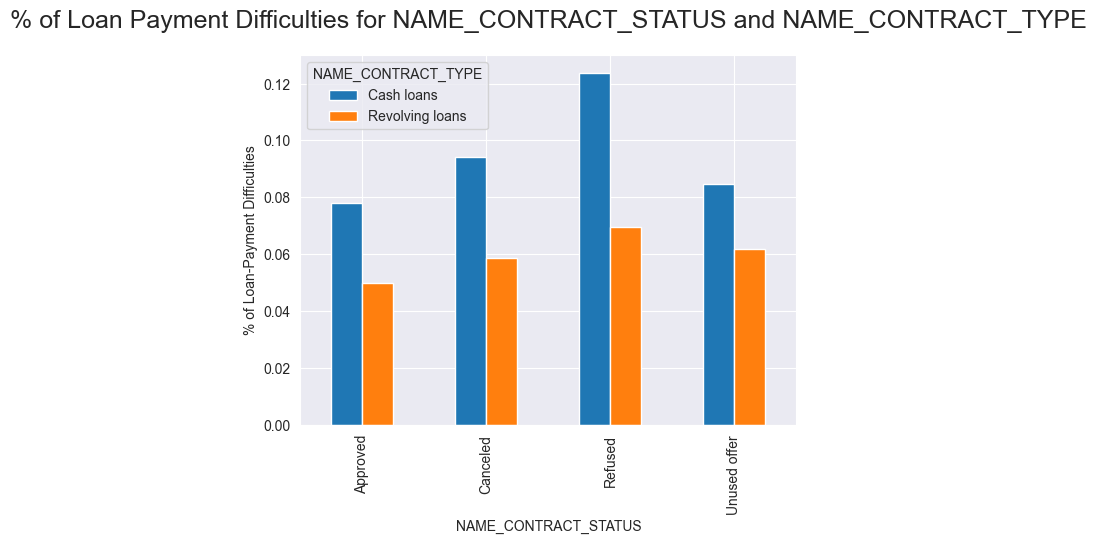

In [172]:
table.T.plot(kind='bar').set_ylabel('% of Loan-Payment Difficulties')

plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE', fontdict={'fontsize':18}, pad=20)

plt.show()

Inference -

Cash loans are more likely to get cancelled or refused with a bigger margin of that of revolving loans.

### Bivariate and multivatiate analysis

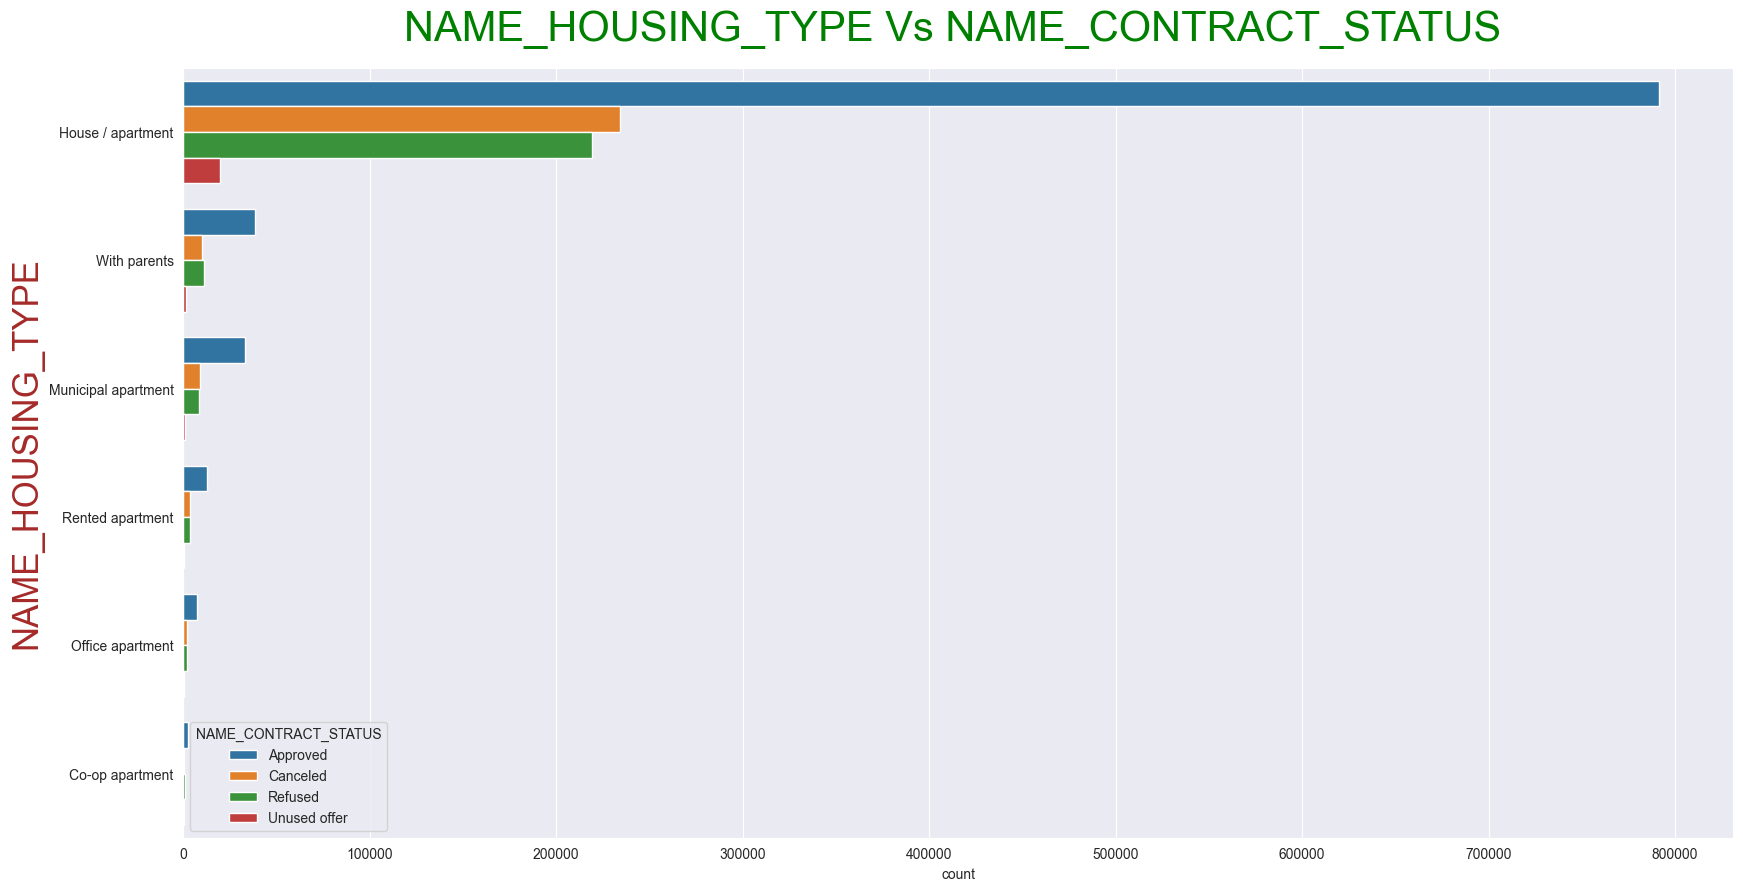

In [173]:
#NAME_HOUSING_TYPE Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'NAME_HOUSING_TYPE', order=new_df['NAME_HOUSING_TYPE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS').set_title("NAME_HOUSING_TYPE Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("NAME_HOUSING_TYPE", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

Clients living in house or appartments are more likely to get their loans approved.

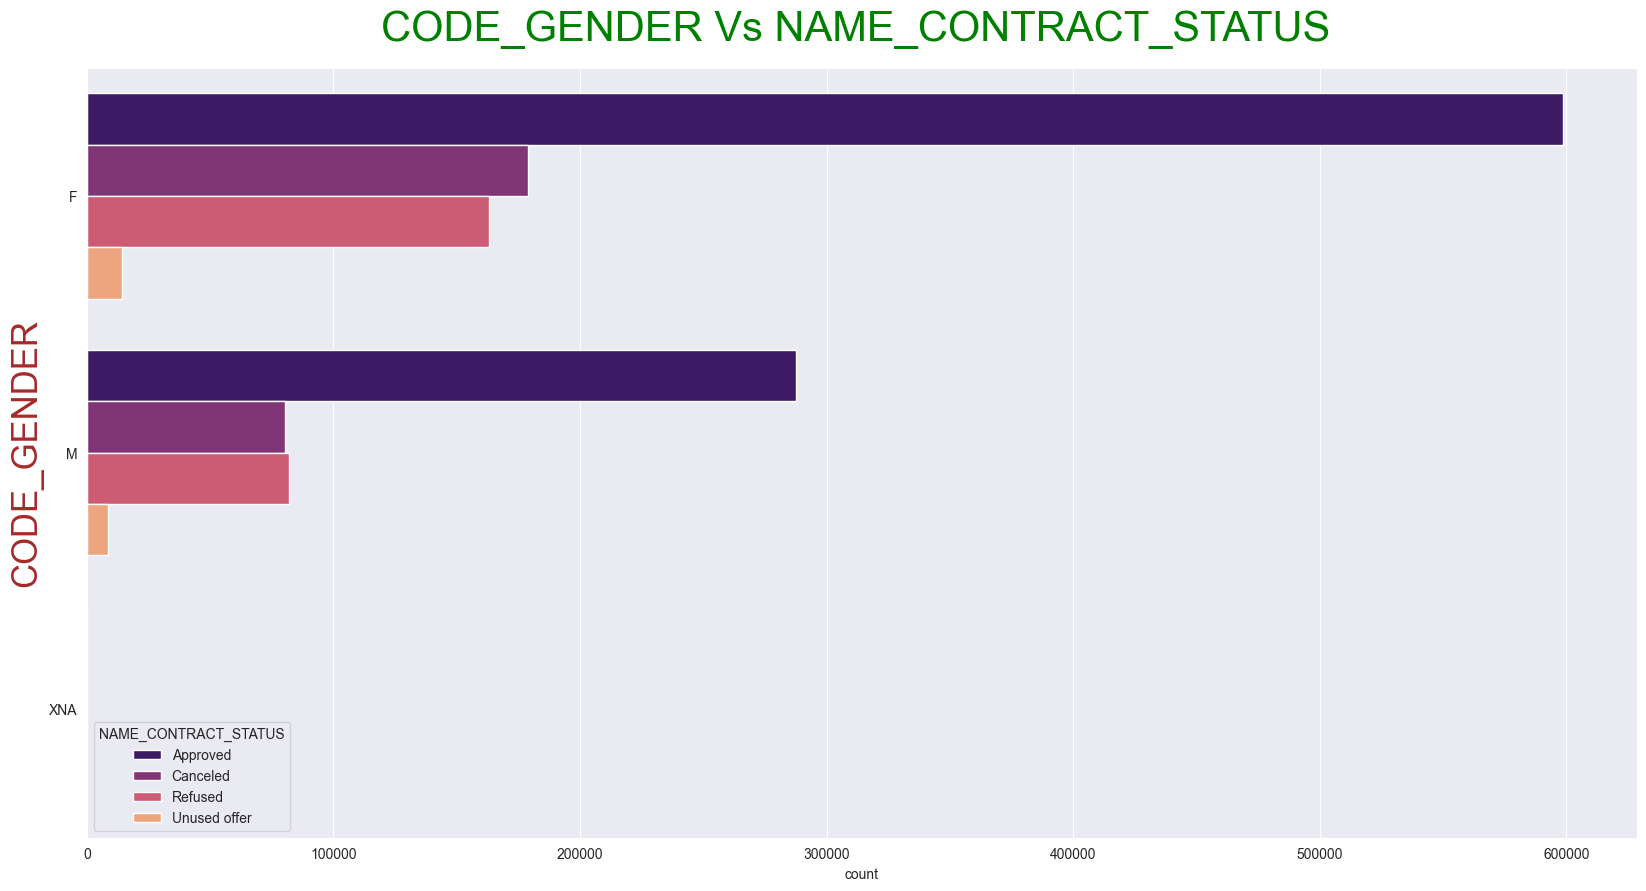

In [174]:
#CODE_GENDER Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'CODE_GENDER', order=new_df['CODE_GENDER'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='magma').set_title("CODE_GENDER Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("CODE_GENDER", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

New clients are more successful in getting their loan approved.
Repeater clients cancel or have their loan amount refused more than the new clients.

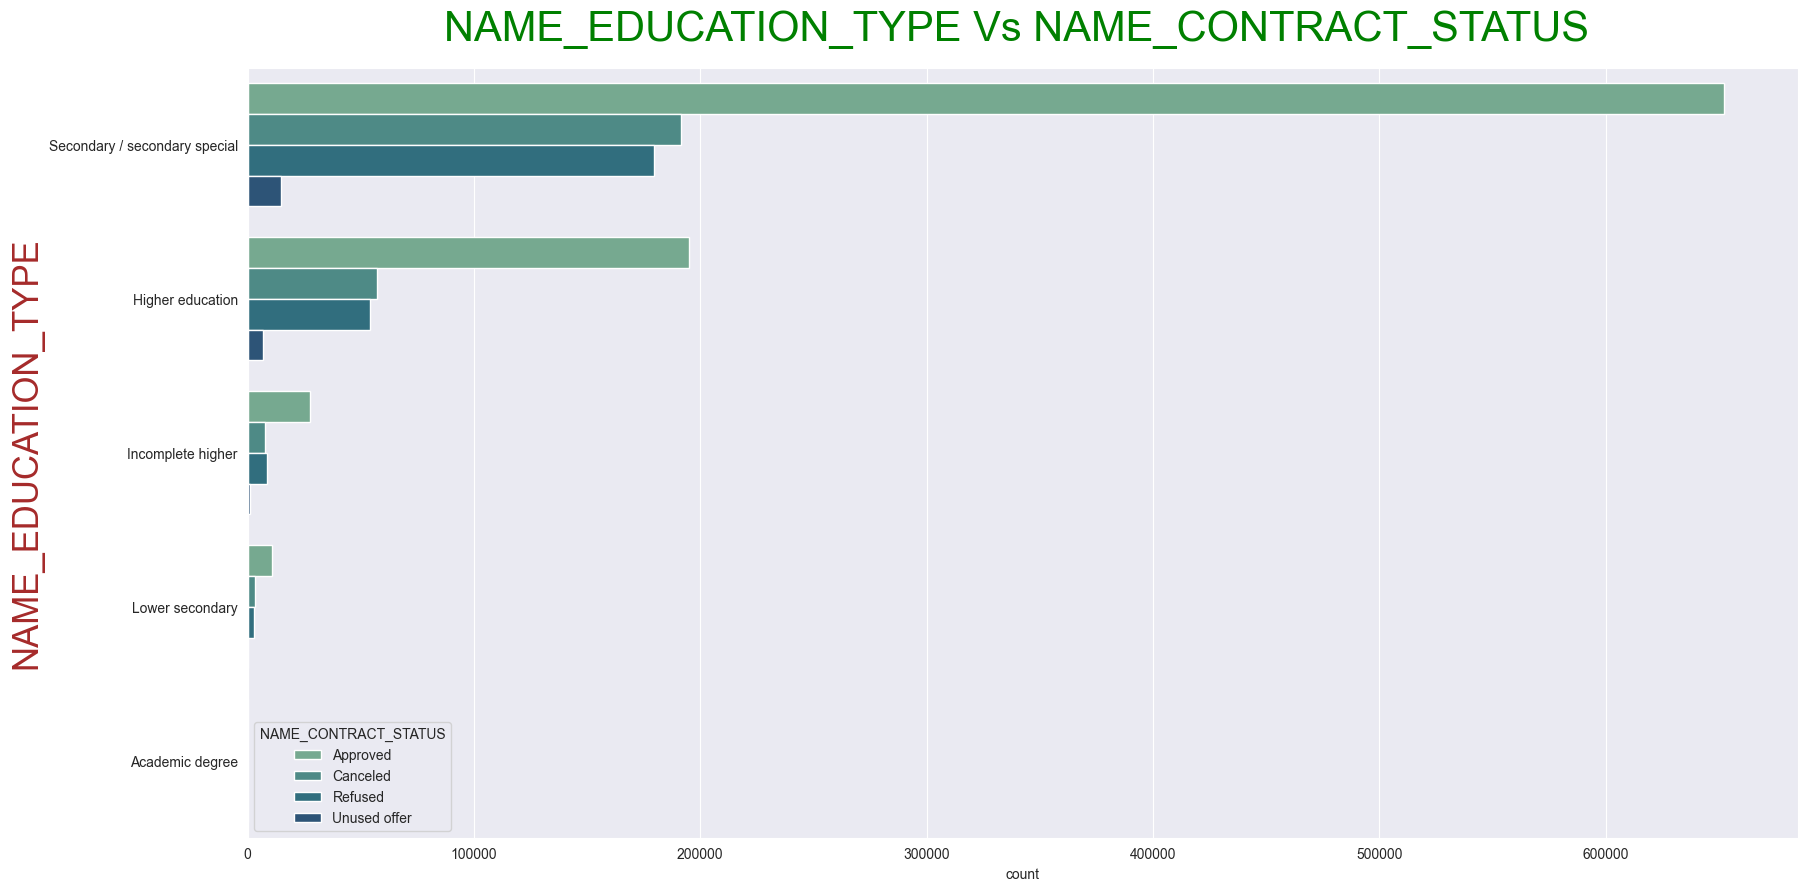

In [175]:
#NAME_EDUCATION_TYPE Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'NAME_EDUCATION_TYPE', order=new_df['NAME_EDUCATION_TYPE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='crest').set_title("NAME_EDUCATION_TYPE Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

Here we see usual trend in all the education type, so we cannot make any inferences here.

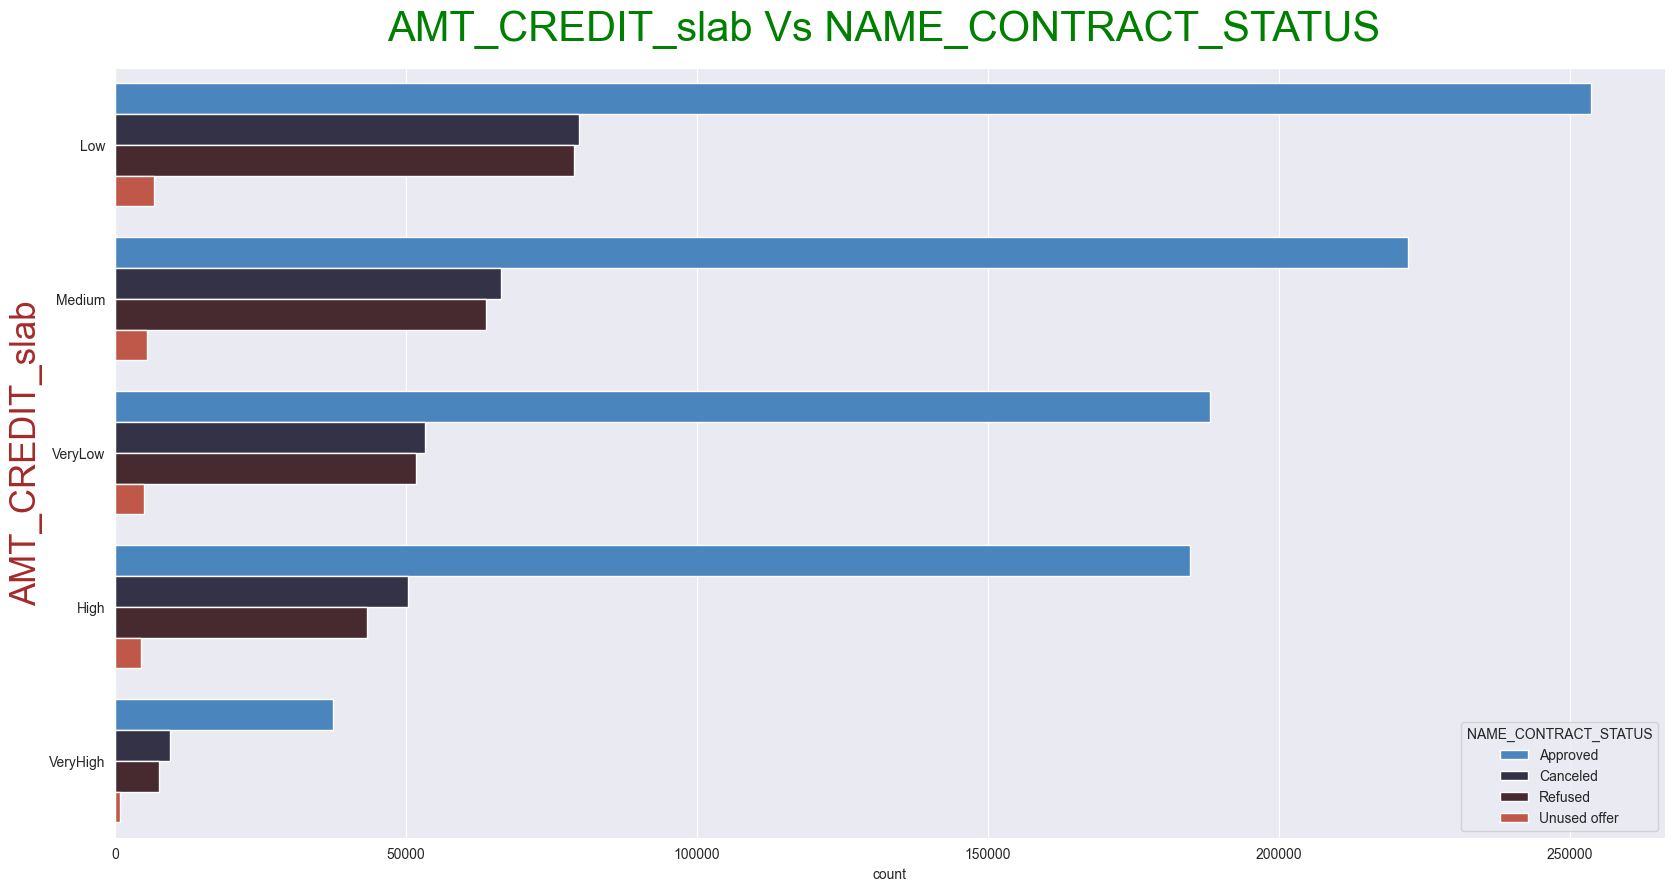

In [176]:
#AMT_CREDIT_slab Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'AMT_CREDIT_slab', order=new_df['AMT_CREDIT_slab'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='icefire').set_title("AMT_CREDIT_slab Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("AMT_CREDIT_slab", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

Here we do not see much trend in the loan amount and it getting accepted or rejected.

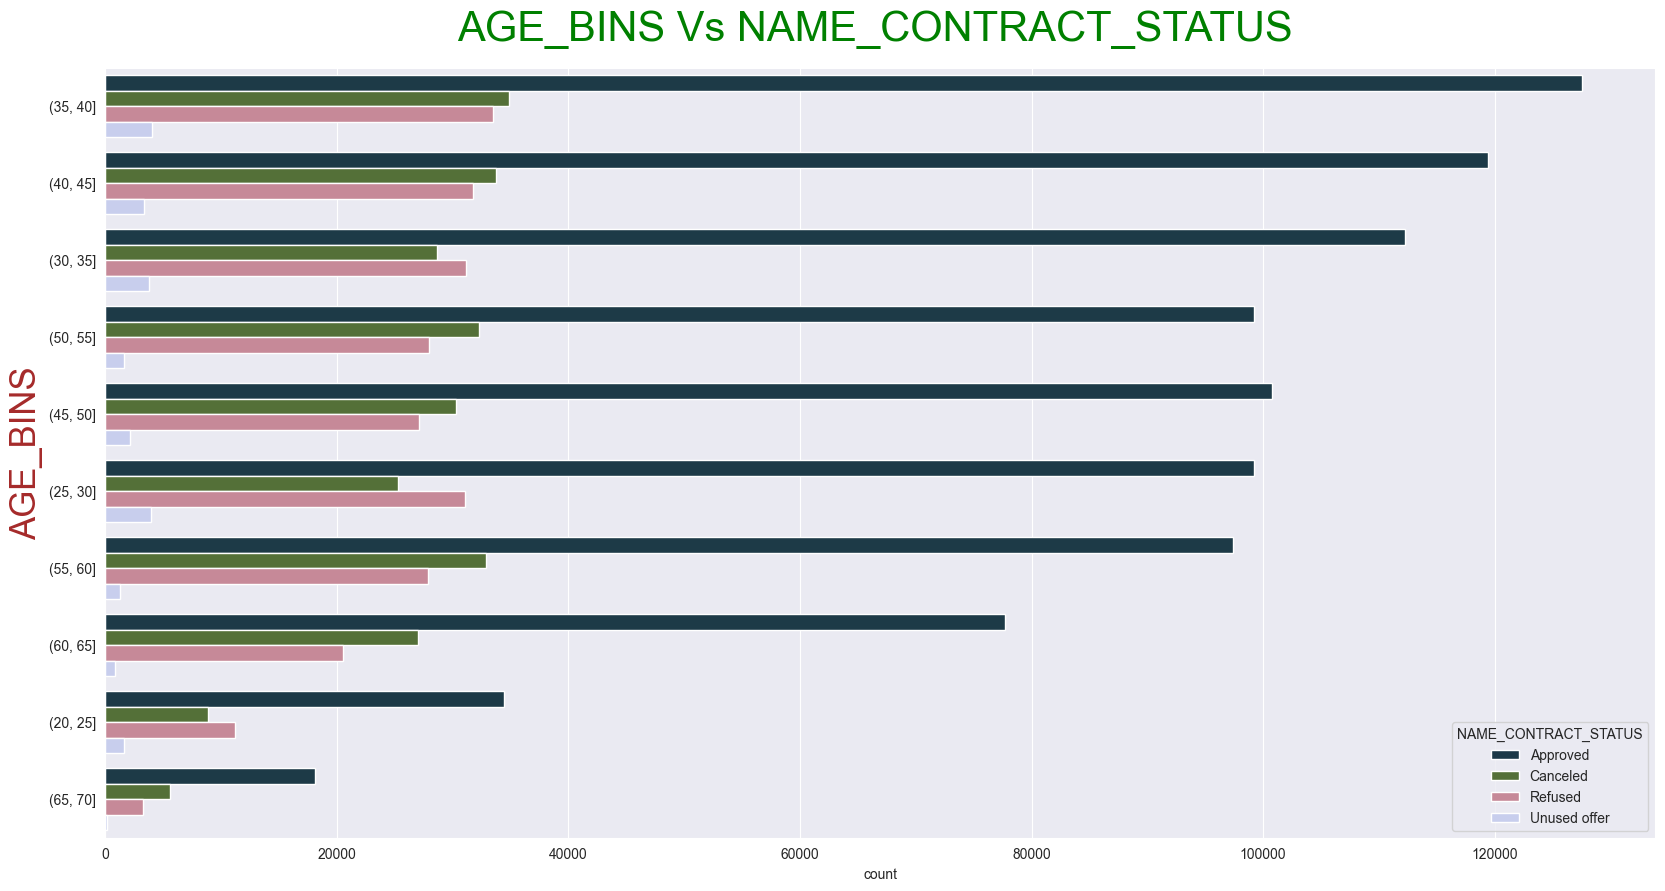

In [177]:
#AGE_BINS Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'AGE_BINS', order=new_df['AGE_BINS'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='cubehelix').set_title("AGE_BINS Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("AGE_BINS", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

In the age category of 20 to 35 years of age, we see a lot of rejection of loan. These group of people are also more likely to default as per our previous inferences and conclusions.
Age group of people above 40 are less likely to default and also they see less rejection and cancellation of loan amounts.

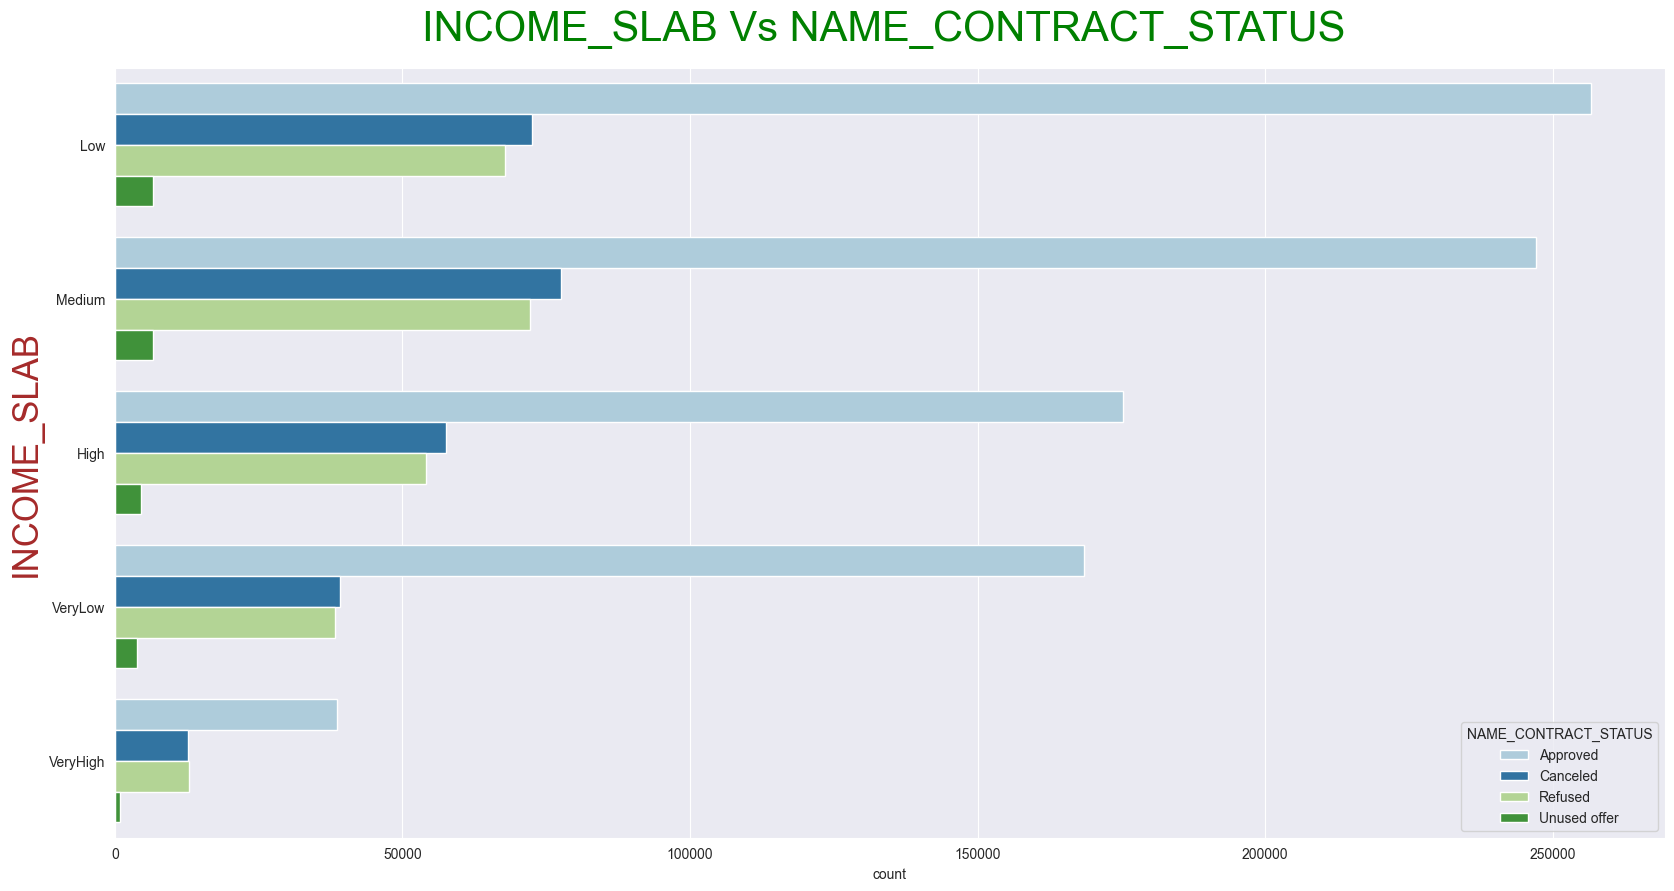

In [178]:
#INCOME_SLAB Vs NAME_CONTRACT_STATUS

plt.figure(figsize=[20,10])

sns.countplot(data = new_df, y= 'INCOME_SLAB', order=new_df['INCOME_SLAB'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='Paired').set_title("INCOME_SLAB Vs NAME_CONTRACT_STATUS " ,
                                                                      fontsize=30, color='Green', pad=20)


plt.ylabel("INCOME_SLAB", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

We can see that customers with very low income or very high income show more signs of getting their loan amount refused, by a very minor margin.

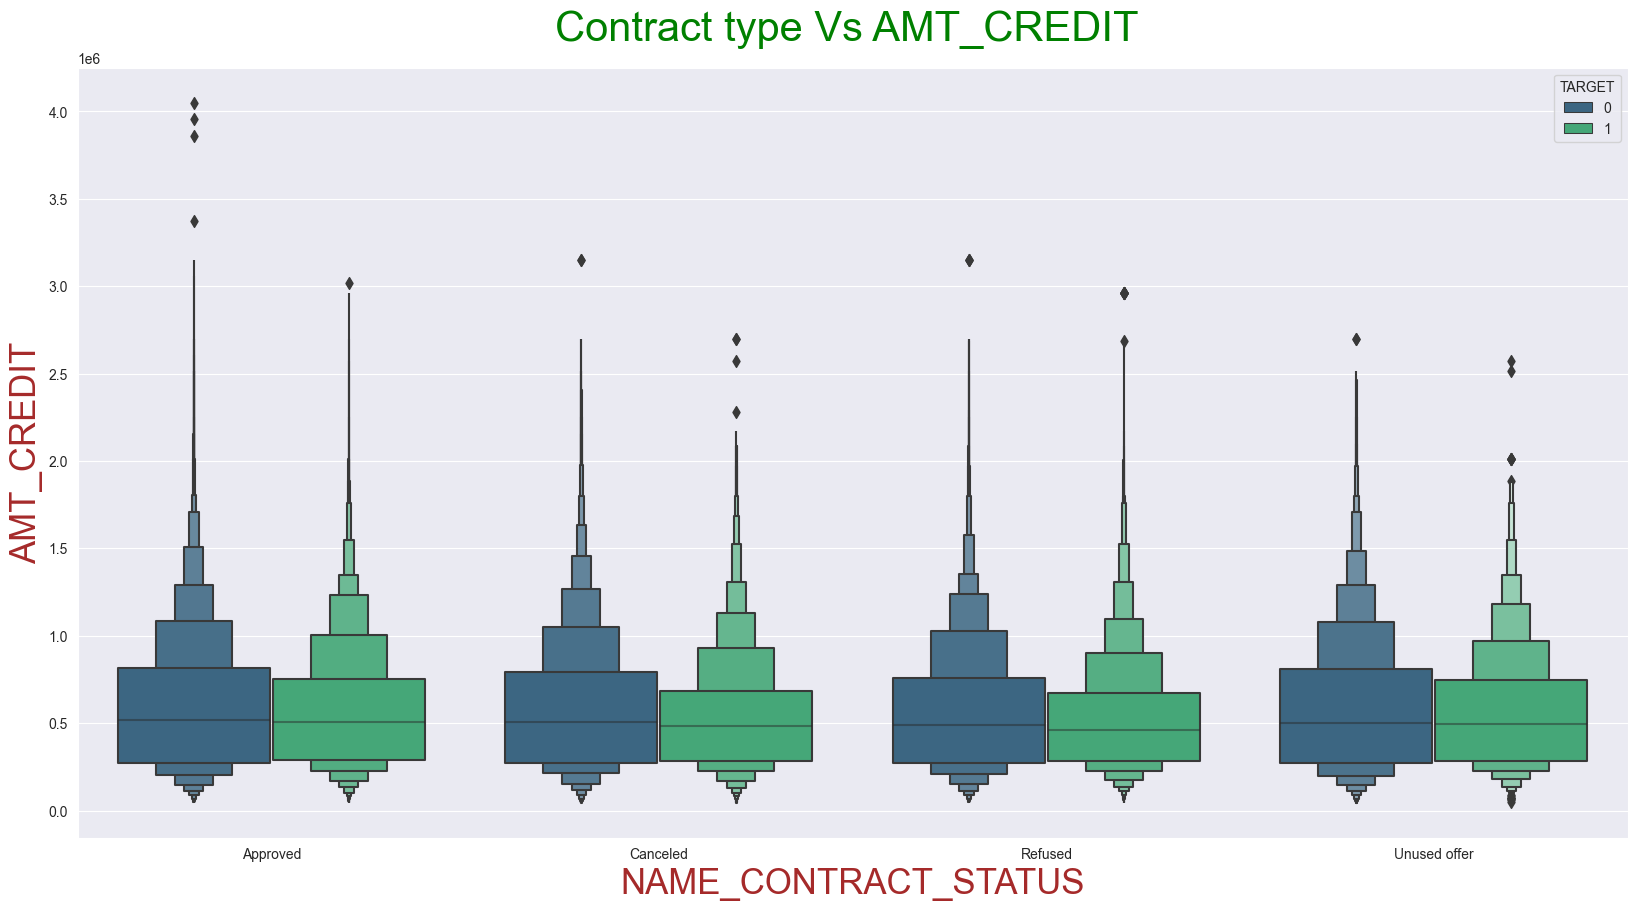

In [179]:
#Contract type Vs AMT_CREDIT

plt.figure(figsize=[20,10])

sns.boxenplot(x = new_df['NAME_CONTRACT_STATUS'] , y = new_df['AMT_CREDIT'] , hue = new_df['TARGET'] , 
           palette = 'viridis').set_title("Contract type Vs AMT_CREDIT " , fontsize=30, color='Green', pad=20)
plt.xlabel("NAME_CONTRACT_STATUS", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

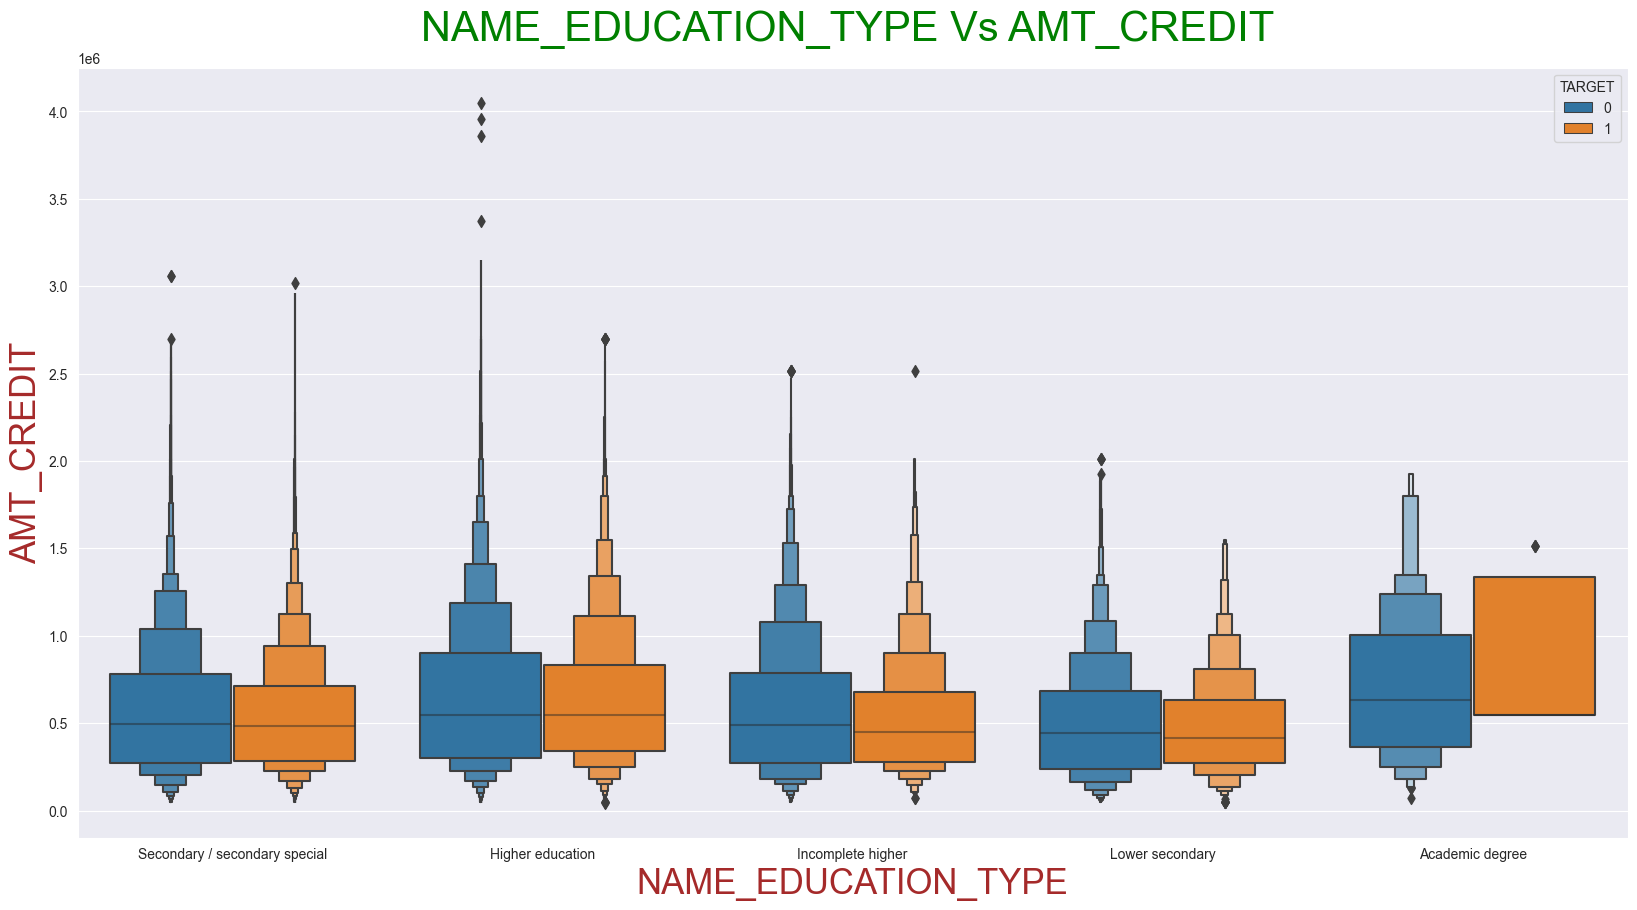

In [180]:
#Education Vs AMT_CREDIT

plt.figure(figsize=[20,10])

sns.boxenplot(x = new_df['NAME_EDUCATION_TYPE'] , y = new_df['AMT_CREDIT'] , 
            hue = new_df['TARGET']).set_title("NAME_EDUCATION_TYPE Vs AMT_CREDIT " , fontsize=30, color='Green', pad=20)
plt.xlabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

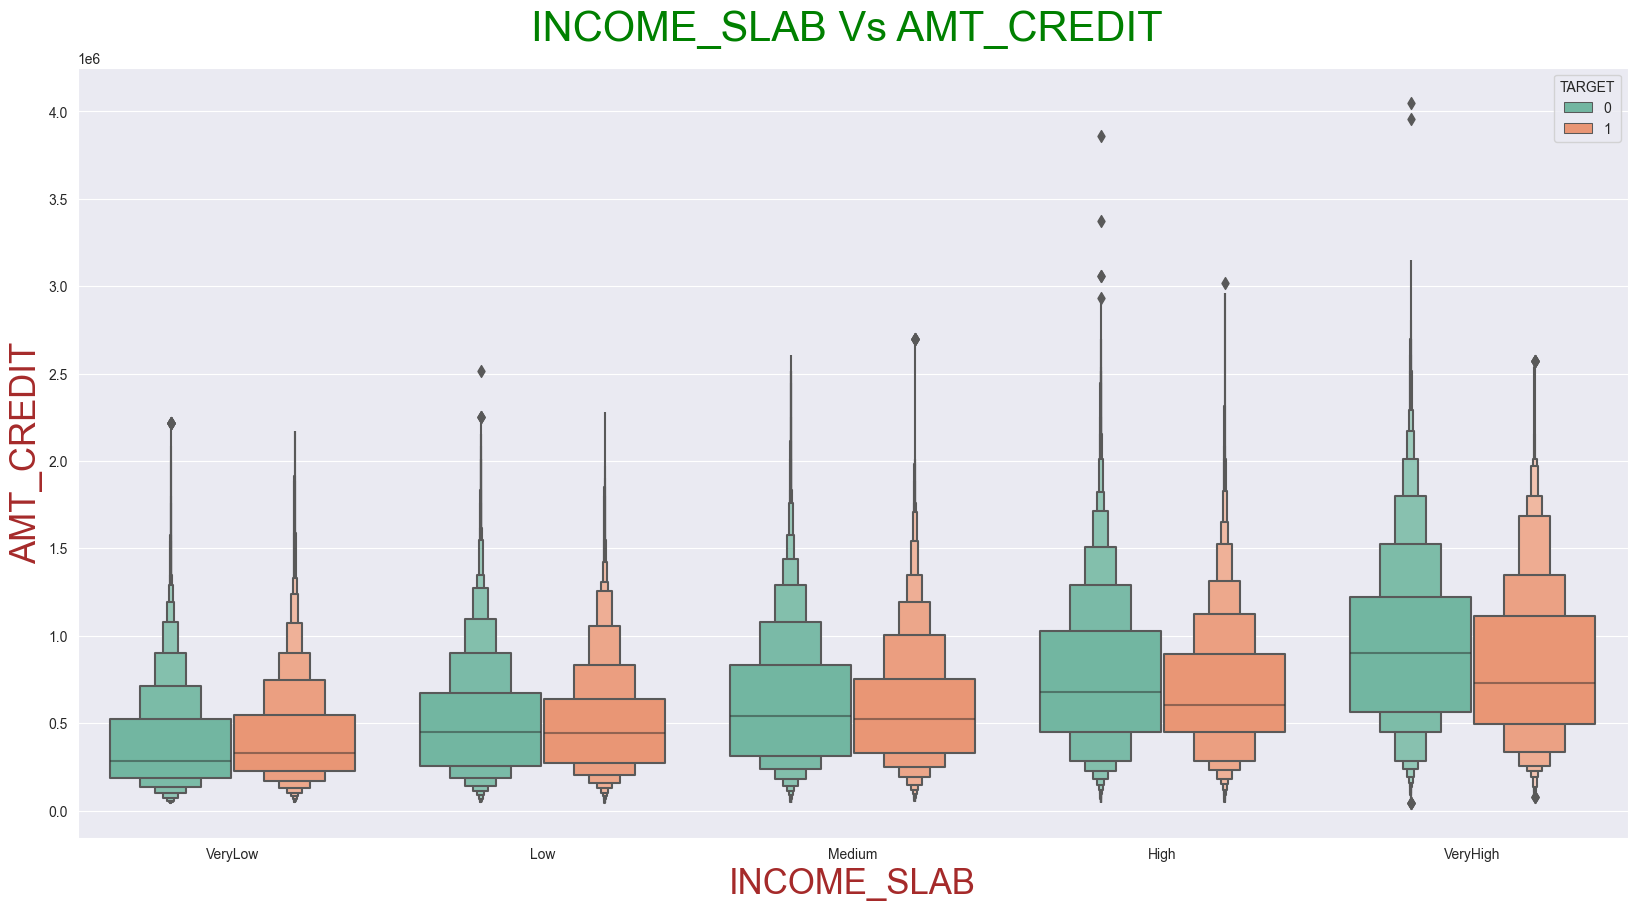

In [181]:
#INCOME_SLAB Vs AMT_CREDIT

plt.figure(figsize=[20,10])

sns.boxenplot(x = new_df['INCOME_SLAB'] , y = new_df['AMT_CREDIT'] , hue = new_df['TARGET'] , 
           palette = 'Set2').set_title("INCOME_SLAB Vs AMT_CREDIT " , fontsize=30, color='Green', pad=20)
plt.xlabel("INCOME_SLAB", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

We can see that as the income slab increases, the credit amount of the loan also increases.
We can also see that the people in the low and very low income slabs are likely to default more.

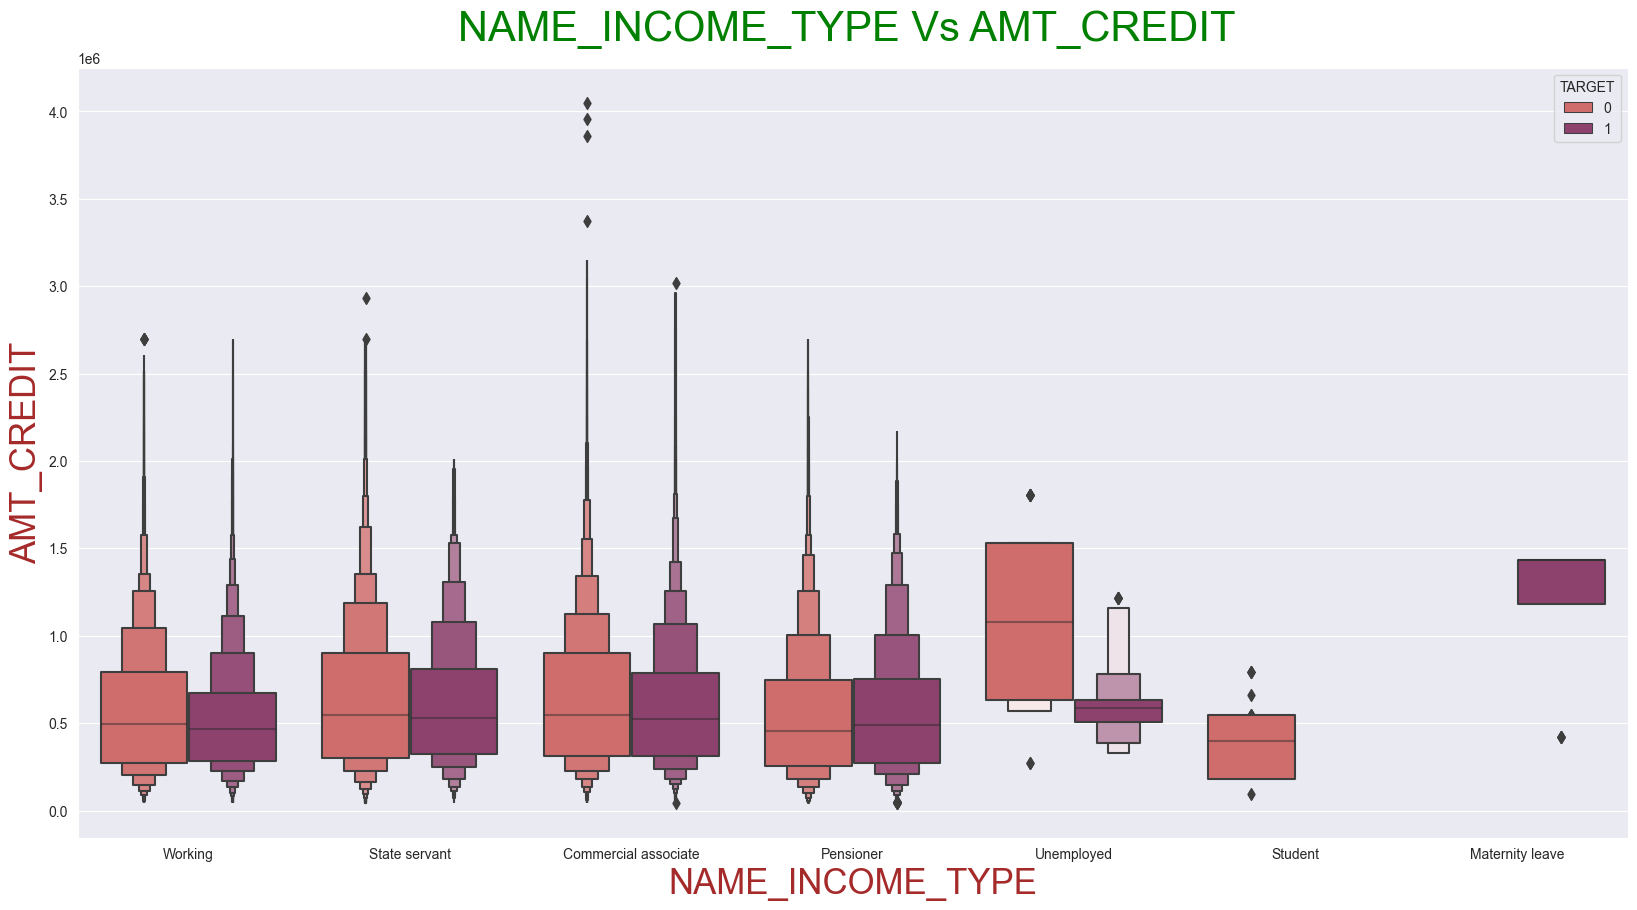

In [182]:
#NAME_INCOME_TYPE Vs AMT_CREDIT

plt.figure(figsize=[20,10])

sns.boxenplot(x = new_df['NAME_INCOME_TYPE'] , y = new_df['AMT_CREDIT'] , hue = new_df['TARGET'] , 
           palette = 'flare').set_title("NAME_INCOME_TYPE Vs AMT_CREDIT " , fontsize=30, color='Green', pad=20)
plt.xlabel("NAME_INCOME_TYPE", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

People involved in business and unemployed people ask for more loan and repay better.

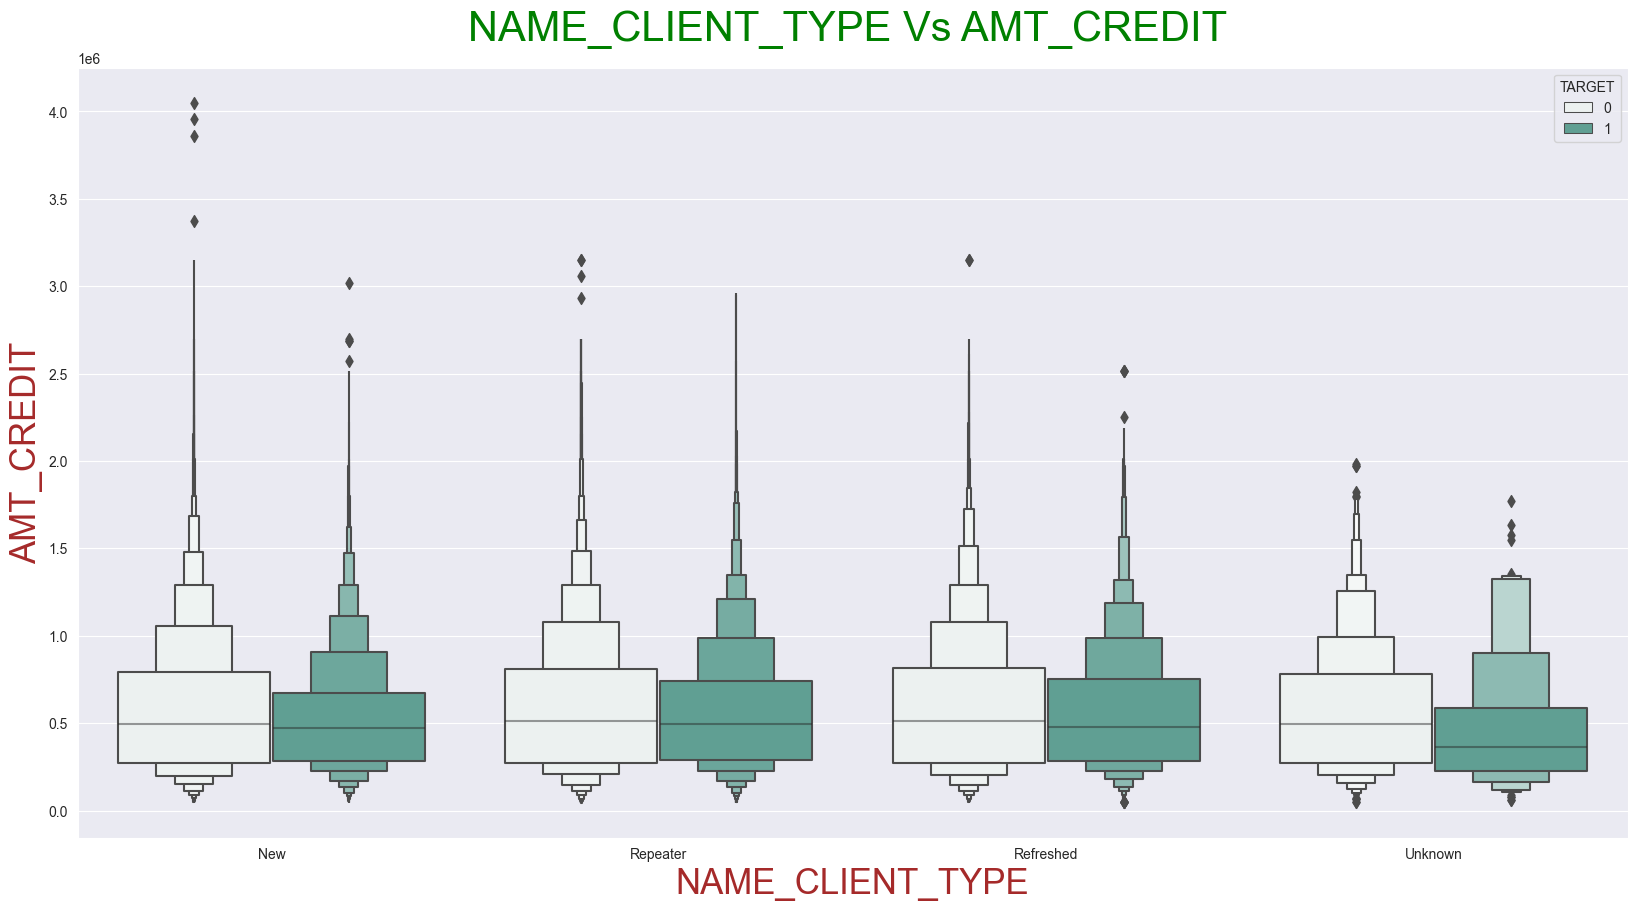

In [183]:
#NAME_CLIENT_TYPE Vs AMT_CREDIT

plt.figure(figsize=[20,10])

sns.boxenplot(x = new_df['NAME_CLIENT_TYPE'] , y = new_df['AMT_CREDIT'] , hue = new_df['TARGET'] , 
           palette = 'light:#5A9').set_title("NAME_CLIENT_TYPE Vs AMT_CREDIT " , fontsize=30, color='Green', pad=20)
plt.xlabel("NAME_CLIENT_TYPE", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

Inference -

Repeaters and Refreshed clients show an increase in the number of default.

Final Conclusion:

The application dataset and the previous_application dataset were analyzed, cleaned and inferences/correlations were drawn. We have thoroughly observed these datasets and here are our observations and comments about the same:
Banks can give away loans to Students, pensioners and people with higher education degrees, as they are very less likely to default loan payments.

We understood that, Labourers, Sales staff, drivers, cleaning staff, low-skill labours are more likely to default a payment of the loan.

The best clients to target in this case would be Managers, core staff, high skill tech staff.

People in the age group of 20 to 30 are more likely to default. People above the age group of 45 do not default on their payments as much.

It was also observed that, people belonging to low and very low income slabs were showing strong indicating signs of defaulting.

We also observed that people who live in a place which is not so populated, like village or small towns, have difficulty in repaying loan amount.

Clients who are more likely to default loans are more likely to change their registration, few days prior to applying for the loan.

Keeping these points in mind, if a customer can be evaluated based on the above parameters, the bank would see less default payments